In [1]:
// Empty comment just to initialize
// Javalin rendering plugin from SOS Notebook.

2023-09-06 17:22:21:997 +0100 [Thread-0] INFO  log - Logging initialized @777ms to org.eclipse.jetty.util.log.Slf4jLog
2023-09-06 17:22:22:019 +0100 [Thread-0] INFO  Javalin - Starting Javalin ...
2023-09-06 17:22:22:068 +0100 [Thread-0] INFO  Server - jetty-9.4.9.v20180320; built: 2018-03-20T12:21:10Z; git: 1f8159b1e4a42d3f79997021ea1609f2fbac6de5; jvm 1.8.0_121-b15
2023-09-06 17:22:22:089 +0100 [Thread-0] INFO  session - DefaultSessionIdManager workerName=node0
2023-09-06 17:22:22:089 +0100 [Thread-0] INFO  session - No SessionScavenger set, using defaults
2023-09-06 17:22:22:090 +0100 [Thread-0] INFO  session - Scavenging every 600000ms
2023-09-06 17:22:22:094 +0100 [Thread-0] INFO  ContextHandler - Started i.j.e.j.start$httpHandler$1@1dc6f396{/,null,AVAILABLE}
2023-09-06 17:22:22:110 +0100 [Thread-0] INFO  ContextHandler - Started o.e.j.s.ServletContextHandler@4aa208c{/,null,AVAILABLE}
2023-09-06 17:22:22:115 +0100 [Thread-0] INFO  AbstractConnector - Started ServerConnector@674d9e

null

In [2]:
// Import of the JAR file for the basic resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-jdk18on-173.jar

In [3]:
// Import of the JAR file for the extension resources of
// the Bouncy Castle Crypto library (version 1.73) for Java.
%classpath add jar ../../../etc/resources/jar/bcprov-ext-jdk18on-173.jar

In [4]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of the class of the cryptographic engine's parameters for
// the Public-Key (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
// (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class DilithiumEngineParams {
    
    // Definition of all the required constant values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_n = 256;
    
    // Definition of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q = 8380417;
    
    // Definition of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int param_q_inv = 58728449;
    
    // Definition of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int compression_asymmetric_keys_factor_d = 13;
    
    // Definition of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_pseudo_random_seed_rho_bytes = 32;
    
    // Definition of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_collision_resistant_hashing_bytes = 64;
    
    // Definition of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public final static int num_pseudo_random_key_k_bytes = 32;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_result_solution_tr_bytes = 64;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_0_bytes = 416;
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public final static int num_target_solution_t_1_bytes = 320;


    
    // Definition of all the required variable values,
    // regarding the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    
    // Definition of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int security_parameters_mode;
    
    
    // Definition of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_hint_h_polynomial_vector_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_potential_signature_z_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_w_1_bytes;
    
    // Definition of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int num_packed_polynomial_secret_key_range_eta_bytes;
    
    
    // Definition of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_k;
    
    // Definition of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_l;
    
    // Definition of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_eta;
    
    // Definition of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_tau;
    
    // Definition of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private final int param_beta;

    // Definition of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_1;

    // Definition of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    private final int param_gamma_2;

    // Definition of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private final int param_omega;
    

    // Definition of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_public_key_bytes;

    // Definition of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_secret_key_bytes;
    
    // Definition of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    private final int num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    
    // Constructors of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    
    // Constructor of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param security_parameters_mode: The security parameters mode
    //                                     used for the CRYSTALS-Dilithium
    //                                     Public-Key Digital Signature Scheme.
    public DilithiumEngineParams( int security_parameters_mode ) {
    
        // Setting of the security parameters mode
        // used for the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        this.security_parameters_mode = security_parameters_mode;
        
        // Setting a switch-case code block for all the possible values
        // for the security parameters mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        switch( this.security_parameters_mode ) {
            
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 2.
            case 2:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 4;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 4;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 39;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁷ or 1 << 17).
                this.param_gamma_1 = ( 1 << 17 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 88 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 88 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 80;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 576;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 192;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 3.
            case 3:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 6;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 5;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 4;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 49;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 55;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 128;
                
                // Breaking of the case code block.
                break;

            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is set as 5.
            case 5:
            
                // Setting of the 1st coordinate k of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_k = 8;
                
                // Setting of the 2nd coordinate l of
                // the number of polynomials (k,l) per vector
                // used in the matrix A representing the lattice
                // algebraic structure, representing as well,
                // the size factor for that same lattice algebraic structure,
                // and thus, being the main security parameter in terms of
                // scaling the security strength of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_l = 7;
                
                // Setting of the secret key range η of
                // the pseudo-random samples to be used as
                // the secret vectors/arrays s₁ and s₂ to
                // compute the initial polynomial target
                // vector/array t for the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_eta = 2;
                
                // Setting of the number τ of ± 1's
                // (bits set as 1) in the presented
                // sampled and transmitted challenge c
                // vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_tau = 60;
                
                // Setting of the maximum possible
                // polynomial coefficient β of the mathematical
                // product c⋅sᵢ vector/array, denoted as well
                // by the mathematical product denoted as τ⋅η from
                // the parameters used by the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.param_beta = ( this.param_eta * this.param_tau );
                
                // Setting of the coefficient range γ₁ of
                // the expanded masking vector/array y computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as 2¹⁹ or 1 << 19).
                this.param_gamma_1 = ( 1 << 19 );

                // Setting of the low-order rounding
                // range γ₂ of the high-order packed polynomial
                // coefficients w₁ vector/array computed
                // from the CRYSTALS-Dilithium Public-Key
                // Digital Signature Scheme (as [ (q - 1) / 32 ]).
                this.param_gamma_2 = ( ( this.param_q - 1 ) / 32 );
                
                // Setting of the maximum number ω of 1's in the hint h
                // given for the resolution of the challenge c vector/array of
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                this.param_omega = 75;
                
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial potential
                // signature z vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_potential_signature_z_bytes = 640;
                
                // Setting of the number of bytes to be used for
                // the computation of the high-order packed polynomial
                // coefficients w₁ vector/array of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_w_1_bytes = 128;
            
                // Setting of the number of bytes to be used for
                // the computation of the packed polynomial vector/array
                // considering the secret key range η of the CRYSTALS-Dilithium
                // Public-Key Digital Signature Scheme.
                this.num_packed_polynomial_secret_key_range_eta_bytes = 96;
                
                // Breaking of the case code block.
                break;
                        
            // If the security parameters mode used for the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, has an invalid value.
            default:
                
                // Throwing of an IllegalArgumentException, regarding
                // an invalid value for the security parameters mode used
                // for the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                throw new IllegalArgumentException("Error: Mode #" + this.security_parameters_mode + " " +
                                                   "is not supported for CRYSTALS-Dilithium (Asymmetric) " +
                                                   "Public-Key Digital Signature Scheme!");
        
        }
            
        // Setting of the number of bytes
        // to be used for the computation of
        // the packed hint for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.num_packed_hint_h_polynomial_vector_bytes = 
                ( this.param_omega + this.param_k );

        // Setting of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_public_key_bytes = 
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_k * this.num_target_solution_t_1_bytes ) );

        // Setting of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_secret_key_bytes =
                ( ( 3 * this.num_pseudo_random_seed_rho_bytes ) +
                  ( this.param_l * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_packed_polynomial_secret_key_range_eta_bytes ) +
                  ( this.param_k * this.num_target_solution_t_0_bytes ) );

        // Setting of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        this.num_euf_cma_cryptographic_signature_package_sigma_bytes =
                (   this.num_pseudo_random_seed_rho_bytes +
                  ( this.param_l * this.num_packed_polynomial_potential_signature_z_bytes ) +
                    this.num_packed_hint_h_polynomial_vector_bytes );
        
    }
    
    
    // Methods of the class of the cryptographic engine's
    // parameters for the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.

    // Method to obtain the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_n() {
    
        // Return of the maximum degree n of
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_n;
        
    }

    // Method to obtain the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q() {
    
        // Return of the numeric modulus q for
        // the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q;
    
    }

    // Method to obtain the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_q_inv() {
    
        // Return of the numeric inverse of modulus q
        // for the polynomials used in the matrix A
        // representing the lattice algebraic structure
        // to be adopted for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_q_inv;
    
    }

    // Method to obtain the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_compression_asymmetric_keys_factor_d() {
    
        // Return of the compression factor d to
        // reduce/compress the size (dropped bits) of
        // the asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.compression_asymmetric_keys_factor_d;
    
    }

    // Method to obtain the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bytes() {
    
        // Return of the number of bytes
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_pseudo_random_seed_rho_bytes;
    
    }

    // Method to obtain the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_pseudo_random_seed_rho_bits() {
    
        // Return of the number of bits
        // to be used as (pseudo) random seed
        // ρ (rho) of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_pseudo_random_seed_rho_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

    // Method to obtain the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_collision_resistant_hashing_bytes;
    
    }

    // Method to obtain the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_collision_resistant_hashing_bits() {
    
        // Return of the number of
        // bits to be used for the purpose of
        // the CRH (Colision-Resistant Hashing) of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_collision_resistant_hashing_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bytes() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.num_pseudo_random_key_k_bytes;
    
    }
    
    // Method to obtain the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_num_pseudo_random_key_k_bits() {
    
        // Return of the number of
        // bytes to be used for the purpose of 
        // the (pseudo) random cryptographic key K of
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return ( this.get_num_pseudo_random_key_k_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the final polynomial target result tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_result_solution_tr_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of the final
    // polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_result_solution_tr_bits() {
    
        // Return of the number of bits
        // to be used for the computation of the final
        // polynomial target result solution tr
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_result_solution_tr_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_0_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_0_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₀
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_0_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bytes() {
    
        // Return of the number of bytes
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_target_solution_t_1_bytes;
    
    }
    
    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_target_solution_t_1_bits() {
    
        // Return of the number of bits
        // to be used for the computation of
        // the packed polynomial target solution t₁
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_target_solution_t_1_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_security_parameters_mode() {
    
        // Return of the security parameters
        // mode used for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.security_parameters_mode;
        
    }

    // Method to obtain the number of bytes
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bytes() {
        
        // Return of the number of bytes
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_hint_h_polynomial_vector_bytes;

    }

    // Method to obtain the number of bits
    // to be used for the computation of
    // the packed hint h for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_hint_h_polynomial_vector_bits() {
        
        // Return of the number of bits
        // to be used for the computation of
        // the packed hint h for a polynomial
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_hint_h_polynomial_vector_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_potential_signature_z_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_potential_signature_z_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the packed polynomial potential
        // signature z vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_potential_signature_z_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bytes() {
        
        // Return of the number of bytes to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_w_1_bytes;
    
    }

    // Method to obtain the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_w_1_bits() {
        
        // Return of the number of bits to be used for
        // the computation of the high-order packed polynomial
        // coefficients w₁ vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_w_1_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }

    // Method to obtain the number of bytes to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bytes() {
        
        // Return of the number of bytes to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.num_packed_polynomial_secret_key_range_eta_bytes;
    
    }

    // Method to obtain the number of bits to be used
    // for the computation of the packed polynomial
    // vector/array considering the secret key range η of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_num_packed_polynomial_secret_key_range_eta_bits() {
        
        // Return of the number of bits to be used
        // for the computation of the packed polynomial
        // vector/array considering the secret key range η of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return ( this.get_num_packed_polynomial_secret_key_range_eta_bytes() *
                 BYTE_SIZE_IN_BITS );
        
    }
    
    // Method to obtain the 1st coordinate k
    // for the input number k of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_k() {
    
        // Return of the 1st coordinate k for
        // the input number k of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_k;
    
    }
    
    // Method to obtain the 2nd coordinate l
    // for the output number l of polynomials (k,l)
    // per vector used in the matrix A representing
    // the lattice algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_l() {
    
        // Return of the 2nd coordinate l for
        // the output number l of polynomials (k,l)
        // per vector used in the matrix A representing
        // the lattice algebraic structure, representing as well,
        // the size factor for that same lattice algebraic structure,
        // and thus, being the main security parameter in terms of
        // scaling the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_l;
    
    }
    
    // Method to obtain the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_eta() {
    
        // Return of the secret key range η of
        // the pseudo-random samples to be used as
        // the secret vectors/arrays s₁ and s₂ to
        // compute the initial polynomial target
        // vector/array t for the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_eta;
        
    }

    // Method to obtain the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_tau() {
    
        // Return of the number τ of ± 1's
        // (bits set as 1) in the presented
        // sampled and transmitted challenge c
        // vector/array of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_tau;
        
    }
    
    // Method to obtain the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_param_beta() {
    
        // Return of the maximum possible
        // polynomial coefficient β of the mathematical
        // product c⋅sᵢ vector/array, denoted as well
        // by the mathematical product denoted as τ⋅η from
        // the parameters used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.param_beta;
        
    }
    
    // Method to obtain the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_1() {
    
        // Return of the coefficient range γ₁ of
        // the expanded masking vector/array y computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_1;
        
    }
    
    // Method to obtain the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public int get_param_gamma_2() {
    
        // Return of the low-order rounding
        // range γ₂ of the high-order packed polynomial
        // coefficients w₁ vector/array computed
        // from the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.param_gamma_2;
        
    }
    
    // Method to obtain the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_param_omega() {
    
        // Return of the maximum number ω of 1's in the hint h
        // given for the resolution of the challenge c vector/array of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.param_omega;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_public_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_public_key_bits() {
    
        // Return of the size, in terms of bytes, of the asymmetric
        // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_public_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bytes() {
    
        // Return of the size, in terms of bytes, of the asymmetric private
        // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for EUF-CMA
        // (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_secret_key_bytes;
    
    }
    
    // Method to obtain the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_secret_key_bits() {
    
        // Return of the size, in terms of bits,
        // of the asymmetric private key Kₛ to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security
        // under CMA (Chosen Message Attack) property.
        return ( this.get_num_euf_cma_secret_key_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }
    
    // Method to obtain the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bytes() {
    
        // Return of the size, in terms of bytes,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return this.num_euf_cma_cryptographic_signature_package_sigma_bytes;
    
    }
    
    // Method to obtain the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    public int get_num_euf_cma_cryptographic_signature_package_sigma_bits() {
    
        // Return of the size, in terms of bits,
        // of the cryptographic digital signature
        // package vector/array σ (sigma), comprising
        // the (pseudo) random seed ρ (rho),
        // the polynomial potential signature z,
        // and the respective presented sampled
        // and transmitted challenge c vector/arrays,
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme with the strong security for
        // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
        return ( this.get_num_euf_cma_cryptographic_signature_package_sigma_bytes() *
                 BYTE_SIZE_IN_BITS );
    
    }

}


// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    // Setting of the array of the parameters modes
    // regarding the input number k of polynomials and
    // the output number l of polynomials per vector used in
    // the matrix A representing the lattice algebraic structure,
    // representing as well, the size factor (k,l) for that
    // same lattice algebraic structure, and thus, being the main
    // security parameter in terms of scaling the security strength of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public final int[] engine_mode_parameters = {
        
        // 1) Parameter Mode 2 to build the 'Dilithium2' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        2,
        
        // 2) Parameters Mode 3 to build the 'Dilithium3' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        3,
        
        // 3) Parameters Mode 5 to build the 'Dilithium5' Security Parameter Set
        //    as the parameter choice for the general parameters to be used by
        //    the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumEngineParams engine_parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a null object.
        this.engine_parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the parameter value regarding
    // the number of polynomials k per vector used in
    // the matrix A representing the lattice algebraic
    // structure, representing as well, the size factor
    // for that same lattice algebraic structure, and thus,
    // being the main security parameter in terms of scaling
    // the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_engine_mode_parameter() {
        
        // Return of the parameter value regarding
        // the number of polynomials k per vector used in
        // the matrix A representing the lattice algebraic
        // structure, representing as well, the size factor
        // for that same lattice algebraic structure, and thus,
        // being the main security parameter in terms of scaling
        // the security strength of the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return engine_mode_parameters[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to initialize the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_engine_parameters() {
        
        // Retrieval of the parameters required
        // to build the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's cryptographic engine.
        int dilithium_engine_mode_parameter = this.get_engine_mode_parameter();

        // Initialization of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.engine_parameters = 
            new DilithiumEngineParams( dilithium_engine_mode_parameter );
        
    }
        
    
    // Method to obtain the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumEngineParams get_engine_parameters() {
        
        // Return of the cryptographic engine's
        // parameters to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.engine_parameters;
        
    }
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_public_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_public_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the size, in terms of bytes,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_public_key_parameters().length;
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size, in terms of bits,
    // of the packed polynomial target solution t₁ vector/array encoded
    // (and compressed) in bytes (rounded from the initial target solution
    // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_public_key_parameters() {
    
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_from_public_key_parameters().length *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the packed polynomial target solution t₁ vector/array encoded
        // (and compressed) in bytes (rounded from the initial target solution
        // vector/array t₁ for the mathematical equation A x s + e = t₁, representing
        // a lattice-based problem in the form of a LWE (Learning With Errors),
        // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the packed polynomial target solution t₁ vector/array encoded
            // (and compressed) in bytes (rounded from the initial target solution
            // vector/array t₁ for the mathematical equation A x s + e = t₁), representing
            // a lattice-based problem in the form of a LWE (Learning With Errors),
            // of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // seed ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_public_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return this.get_pseudo_random_seed_rho_from_public_key_parameters().length;
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random seed
    // ρ (rho), from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_seed_rho_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_seed_rho_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return ( this.get_pseudo_random_seed_rho_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random seed ρ (rho) in bytes,
        // from which will be expanded the matrix A,
        // encoding the lattice algebraic structure,
        // as well as other cryptographic parameters,
        // representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random seed ρ (rho), from which will be expanded
            // the matrix A, encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing a lattice-based problem
            // in the form of a LWE (Learning With Errors), retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bytes_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_pseudo_random_key_k_from_private_key_parameters().length;
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_pseudo_random_key_k_size_bits_from_private_key_parameters() {
    
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_pseudo_random_key_k_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return ( this.get_pseudo_random_key_k_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of
        // the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the (pseudo) random cryptographic key K,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bytes_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_result_solution_tr_from_private_key_parameters().length;
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bytes,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the final polynomial target
    // result tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public int get_target_result_solution_tr_size_bits_from_private_key_parameters() {
    
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is not defined by a null object.
        if( this.get_target_result_solution_tr_from_private_key_parameters() != null ) {
            
            // Return of the size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_result_solution_tr_from_private_key_parameters().length * 
                     BYTE_SIZE_IN_BITS );
        
        }
        // If tthe final polynomial target result tr vector/array,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, is defined by a null object.
        else {
           
            // Return of an invalid size, in terms of bits,
            // of the final polynomial target result tr vector/array,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_1_from_private_key_parameters().length;

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_1_size_bits_from_private_key_parameters() {
        
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₁
        // (i.e. the 1st secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bytes_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_random_secret_s_2_from_private_key_parameters().length;

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_random_secret_s_2_size_bits_from_private_key_parameters() {
        
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_random_secret_s_2_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_random_secret_s_2_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the random secret s₂
        // (i.e. the 2nd secret vector in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_0_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_0_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_0_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_0_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₀
        // (i.e. the 1st target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bytes_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_target_solution_t_1_from_private_key_parameters().length;

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bytes, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public int get_target_solution_t_1_size_bits_from_private_key_parameters() {
        
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_target_solution_t_1_from_private_key_parameters() != null ) {
        
            // Return of the size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( this.get_target_solution_t_1_size_bytes_from_private_key_parameters() *
                     BYTE_SIZE_IN_BITS );

        }
        // If the packed polynomial target solution t₁
        // (i.e. the 2nd target vector/array in the lattice
        // algebraic structure), encoded in bytes, with the strong
        // security under CMA (Chosen Message Attack) property,
        // retrieved from the private key parameters of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
            
            // Return of an invalid size,
            // in terms of bits, of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPrivateKeyParameters get_private_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the private key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
    
        // Return of the payload of the private key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // private key of the digital signature scheme.
        return this.get_private_key_payload_from_parameters();
        
    }

}


// Setting of the number of parameter set mode choices for
// the generation of the asymmetric key pair to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
final short NUM_PARAMETERS_SET_MODE_CHOICES = 3;

// Setting of the number of trials for the generation of
// the asymmetric key pairs to be used internally by
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
// in order to estimate the average time spent in it.
final short NUM_TRIALS_ASYMMETRIC_KEY_GENERATION = 10;

// Setting of the number of size metrics to be
// analysed from the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme.
final short NUM_SIZE_METRICS = 3;


// Setting of matrix of the time estimated metrics for each trial,
// regarding the generation of the asymmetric key pairs to be analysed
// from all the configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
double[][] crystals_dilithium_digital_signature_schemes_key_generation_times = 
    new double[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_TRIALS_ASYMMETRIC_KEY_GENERATION];

// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    
// Setting of the array of the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium Public-Key
// Digital Signature Schemes, not considering possible outlier values.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the standard deviation of
// the time estimated metrics for all trials, regarding
// the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_std_times =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];
    

// Setting of the array of the upper bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];

// Setting of the array of the lower bounds to exclude
// outliers from the average time estimated metrics for all trials,
// regarding the generation of the asymmetric key pairs to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
double[] crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds =
    new double[NUM_PARAMETERS_SET_MODE_CHOICES];


// Setting of the size metrics (keys and ciphertexts) to be
// analysed from all the configured CRYSTALS-Dilithium
// Public-Key Digital Signature Schemes.
int[][][] crystals_dilithium_digital_signature_schemes_sizes_metrics = 
    new int[NUM_PARAMETERS_SET_MODE_CHOICES][NUM_SIZE_METRICS][2];


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (k = 2,3,4).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Creation of a CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // using a set of security parameters' modes pre-defined.
    CrystalsDilithiumDigitalSignatureScheme crystals_dilithium_digital_signature_scheme = 
        new CrystalsDilithiumDigitalSignatureScheme( param_set_mode_choice_idx );


    // Retrieval of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters' Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    String crystals_dilithium_security_parameters_mode_name_and_description = 
        crystals_dilithium_digital_signature_scheme.get_security_parameters_mode_name_and_description();


    // Retrieval of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Specifications.
    DilithiumParameterSpec crystals_dilithium_security_parameters_specification =
        crystals_dilithium_digital_signature_scheme.get_security_parameters_specifications();



    // Print of the relevant information for the use of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the header of the example of
    // a possible execution of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println(" ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM " + 
                                     "PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ ");


    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");


    // Print of the string with the name and description of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    System.out.println( "  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:\n\n   " +
                           crystals_dilithium_security_parameters_mode_name_and_description );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Initialization of the general parameters to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_parameters();
    
    
    // Initialization of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_engine_parameters();

    // Retrieval of the cryptographic engine's
    // parameters to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    DilithiumEngineParams crystals_dilithium_digital_signature_scheme_engine_parameters = 
        crystals_dilithium_digital_signature_scheme.get_engine_parameters();

    
    // Retrieval of the security parameters
    // mode used for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int security_parameters_mode = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_security_parameters_mode();
    
    // Retrieval of the 1st coordinate k of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_k = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_k();
    
    // Retrieval of the 2nd coordinate l of
    // the number of polynomials (k,l) per vector
    // used in the matrix A representing the lattice
    // algebraic structure, representing as well,
    // the size factor for that same lattice algebraic structure,
    // and thus, being the main security parameter in terms of
    // scaling the security strength of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_l = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_l();
    
    // Retrieval of the maximum degree n of
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_n = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_n();
    
    // Retrieval of the numeric modulus q for
    // the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q();
    
    // Retrieval of the numeric inverse of modulus q
    // for the polynomials used in the matrix A
    // representing the lattice algebraic structure
    // to be adopted for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_q_inv = crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_q_inv();
    
    // Retrieval of the compression factor d to
    // reduce/compress the size (dropped bits) of
    // the asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int compression_asymmetric_keys_factor_d = 
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_compression_asymmetric_keys_factor_d();
    
    // Retrieval of the secret key range η of
    // the pseudo-random samples to be used as
    // the secret vectors/arrays s₁ and s₂ to
    // compute the initial polynomial target
    // vector/array t for the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_eta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_eta();
    
    // Retrieval of the number τ of ± 1's
    // (bits set as 1) in the presented
    // sampled and transmitted challenge c
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_tau = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_tau();
    
    // Retrieval of the maximum possible
    // polynomial coefficient β of the mathematical
    // product c⋅sᵢ vector/array, denoted as well
    // by the mathematical product denoted as τ⋅η from
    // the parameters used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int param_beta = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_beta();
    

    // Retrieval of the coefficient range γ₁ of
    // the expanded masking vector/array y computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_1 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_1();

    // Retrieval of the low-order rounding
    // range γ₂ of the high-order packed polynomial
    // coefficients w₁ vector/array computed
    // from the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int param_gamma_2 = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_gamma_2();

    // Retrieval of the maximum number ω of 1's in the hint h
    // given for the resolution of the challenge c vector/array of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int param_omega = 
        crystals_dilithium_digital_signature_scheme_engine_parameters.get_param_omega();
    
    
    
    // Print of the string with the size of
    // the Security Parameter Set to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Security Parameter Set " + 
                        "(Mode = " + security_parameters_mode + ") to be adopted:\n" +
                        "       - " + "k = " + param_k + " | " + "l = " + param_l + " | "
                                    + "n = " + param_n + " | " + "d = " + compression_asymmetric_keys_factor_d + " | "
                                    + "q = " + param_q + " | " + "q⁻¹ = " + param_q_inv + "\n" +
                        "         " + "η = " + param_eta + " | " + "τ = " + param_tau + " | "
                                    + "β = " + param_beta + " | " + "ω = " + param_omega + " | "
                                    + "γ₁ = " + param_gamma_1 + " | " + "γ₂ = " + param_gamma_2 );


    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bytes();
    
    // Retrieval of the number of bits
    // to be used as (pseudo) random seed
    // ρ (rho) of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_pseudo_random_seed_rho_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_seed_rho_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of
    // the CRH (Colision-Resistant Hashing) of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_collision_resistant_hashing_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_collision_resistant_hashing_bits();
    
    // Retrieval of the number of
    // bytes to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bytes();
    
    // Retrieval of the number of
    // bits to be used for the purpose of 
    // the (pseudo) random cryptographic key K of
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    int num_pseudo_random_key_k_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_pseudo_random_key_k_bits();
    
    
    // Print of the string with the size of the (Pseudo) Random Seeds,
    // Collision-Resistant Hashes, and (Pseudo) Random Secrets/Keys,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and\n" +
                        "       (Pseudo) Random Secrets/Keys to be generated and used:\n" +
                        "       " + "- Size of a (Pseudo) Random Seed ρ: " 
                                  + num_pseudo_random_seed_rho_bytes  + " bytes | " + num_pseudo_random_seed_rho_bits + " bits\n" +
                        "       " + "- Size of a Collision-Resistant Hash ρ': " 
                                  + num_collision_resistant_hashing_bytes + " bytes | " + num_collision_resistant_hashing_bits + " bits\n" +
                        "       " + "- Size of a (Pseudo) Random Secret/Key K: " 
                                  + num_pseudo_random_key_k_bytes  + " bytes | " + num_pseudo_random_key_k_bits + " bits");

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₀
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_0_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_0_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed polynomial target solution t₁
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_solution_t_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_solution_t_1_bits();
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bytes();
    
    // Retrieval of the number of bits
    // to be used for the computation of
    // the final polynomial target result solution tr
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_target_result_solution_tr_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_target_result_solution_tr_bits();
    
    
    // Print of the string with the size of the target solutions vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    System.out.println( "     * Size of the Target Solutions Vectors/Arrays to be generated and used:\n" +
                        "       " + "- Size of a Target Solution t₀: " 
                                  + num_target_solution_t_0_bytes + " bytes | " + num_target_solution_t_0_bits + " bits\n" +
                        "       " + "- Size of a Target Solution t₁: " 
                                  + num_target_solution_t_1_bytes + " bytes | " + num_target_solution_t_1_bits + " bits\n" +
                        "       " + "- Size of a Target Result Solution tr: " 
                                  + num_target_result_solution_tr_bytes + " bytes | " + num_target_result_solution_tr_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial vector/array
    // considering the secret key range η of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_secret_key_range_eta_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_secret_key_range_eta_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the high-order packed polynomial
    // coefficients w₁ vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_w_1_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_w_1_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the generation of
    // the pair of asymmetric keys.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Key Generation:\n" +
                        "       " + "- Size of a Secret Key Range Packed Polynomial η: " 
                                  + num_packed_polynomial_secret_key_range_eta_bytes + " bytes | " + num_packed_polynomial_secret_key_range_eta_bits + " bits\n" +
                        "       " + "- Size of a High-Order Packed Polynomial Coefficients w₁: " 
                                  + num_packed_polynomial_w_1_bytes + " bytes | " + num_packed_polynomial_w_1_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the number of bytes
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bytes();

    // Retrieval of the number of bits
    // to be used for the computation of
    // the packed hint for a polynomial
    // vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_hint_h_polynomial_vector_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_hint_h_polynomial_vector_bits();
    
    // Retrieval of the number of bytes to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bytes();
    
    // Retrieval of the number of bits to be used for
    // the computation of the packed polynomial potential
    // signature z vector/array of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    int num_packed_polynomial_potential_signature_z_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_packed_polynomial_potential_signature_z_bits();
    
    
    // Print of the string with the size of the packed polynomial vectors/arrays,
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure.
    System.out.println( "     * Size of the Packed Polynomial Vectors/Arrays to be generated and used for Signing Mechanism:\n" +
                        "       " + "- Size of a Hint Packed Polynomial h: " 
                                  + num_packed_hint_h_polynomial_vector_bytes + " bytes | " + num_packed_hint_h_polynomial_vector_bits + " bits\n" +
                        "       " + "- Size of a Potential Signature Packed Polynomial z: " 
                                  + num_packed_polynomial_potential_signature_z_bytes + " bytes | " + num_packed_polynomial_potential_signature_z_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bytes();
    
    // Retrieval of the size, in terms of bits, of the asymmetric
    // public key Kₚ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_public_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_public_key_bits();

    // Retrieval of the size, in terms of bytes, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bytes();

    // Retrieval of the size, in terms of bits, of the asymmetric private
    // (secret) key Kₛ to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for EUF-CMA
    // (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_secret_key_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_secret_key_bits();
    
    // Retrieval of the size, in terms of bytes,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bytes =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bytes();
    
    // Retrieval of the size, in terms of bits,
    // of the cryptographic digital signature
    // package vector/array σ (sigma), comprising
    // the (pseudo) random seed ρ (rho),
    // the polynomial potential signature z,
    // and the respective presented sampled
    // and transmitted challenge c vector/arrays,
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme with the strong security for
    // EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    int num_euf_cma_cryptographic_signature_package_sigma_bits =
        crystals_dilithium_digital_signature_scheme_engine_parameters
            .get_num_euf_cma_cryptographic_signature_package_sigma_bits();
    
    
    // Print of the string with the size of EUF-CMA,
    // (Existential UnForgeability under Chosen Message Attack)
    // in terms of bytes and bits, to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, during the signing procedure,
    // as well as the resulting cryptographic signature produced.
    System.out.println( "     * Size of EUF-CMA (Existential UnForgeability under Chosen Message Attack)\n" +
                        "       Pair of Asymmetric Keys and Cryptographic Signature, to be used by\n" +
                        "       the internal Signing and Verifying procedures:\n" +
                        "       " + "- Size of an EUF-CMA Public Key Kₚ: " 
                                  + num_euf_cma_public_key_bytes + " bytes | " + num_euf_cma_public_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA (Secret) Private Key Kₛ: " 
                                  + num_euf_cma_secret_key_bytes + " bytes | " + num_euf_cma_secret_key_bits + " bits\n" +
                        "       " + "- Size of an EUF-CMA Cryptographic Signature Package σ: " 
                                  + num_euf_cma_cryptographic_signature_package_sigma_bytes + " bytes | " + num_euf_cma_cryptographic_signature_package_sigma_bits + " bits" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set choice mode (Mode = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {

        // Computation of the start time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long start_time_trial_asymmetric_key_generation = 
            System.nanoTime();

        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

        // Initialization of the generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();

        // Computation of the end time of the current trial for
        // the generation of the asymmetric key pairs to be used
        // internally by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, according to the associated
        // parameters set choice mode (Mode = 2,3,5),
        // measured in nanoseconds.
        long end_time_trial_asymmetric_key_generation = 
            System.nanoTime();
        
        // Computation and store of the elapsed time estimated,
        // regarding the generation of the asymmetric key pairs to be
        // analysed from the current configured CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, measured in nanoseconds.
        crystals_dilithium_digital_signature_schemes_key_generation_times
            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] +=
                ( (double) end_time_trial_asymmetric_key_generation - 
                  (double) start_time_trial_asymmetric_key_generation );
        
    }
    

    // Initialization of the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_key_generation_parameters();

    // Initialization of the generation of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_scheme.initialize_asymmetric_key_pair_generation();


    // Print of one bold line, as a separator.
    System.out.println( "     ===============================================" +
                             "===============================================\n" );
    
    
    // Print of a header for the parameters and
    // information about the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PUBLIC KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_public_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_public_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the public key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_public_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_public_key_parameters_byte :
            pseudo_random_seed_rho_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_public_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_public_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_public_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_public_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_public_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_public_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_public_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_public_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_public_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_public_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_public_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_public_key_parameters_byte :
            target_solution_t_1_from_public_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_public_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_public_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_public_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_public_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the public key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_public_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_public_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_public_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_public_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the public key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_public_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_public_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_public_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_public_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_public_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the public key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_public_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_public_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_public_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_public_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_public_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_public_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the public key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_public_key_parameters_values_string );


    // Print of one blank line, as a separator.
    System.out.println("");


    // Print of one bold line, as a separator.
    System.out.println( "     ================================================" +
                             "================================================\n" );


    // Print of a header for the parameters and
    // information about the asymmetric private key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:\n\n" );
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s + e = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] pseudo_random_seed_rho_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_seed_rho_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // seed ρ (rho) (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing a lattice
    // algebraic structure for the mathematical equation A x s₁ + s₂ = t), encoded in bytes,
    // representing a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_seed_rho_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_seed_rho_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure for
            // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure for
        // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from which
    // will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based problem
    // in the form of a MLWE (Module-Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string representation
    // in hexadecimal of the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A consisting of
    // polynomials representing a lattice algebraic structure for the mathematical
    // equation A x s₁ + s₂ = t), encoded in bytes, representing a lattice-based
    // problem in the form of a MLWE (Module-Learning With Errors), retrieved
    // from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int rho_i = 0; rho_i < pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars.length; rho_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( rho_i != 0 ) && ( rho_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained the uniformly-random
            // matrix A consisting of polynomials representing a lattice algebraic structure
            // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
            // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained the uniformly-random
        // matrix A consisting of polynomials representing a lattice algebraic structure
        // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
        // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
            " ρ" + "[" + rho_i + "]" + " = " + 
                    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_chars[rho_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_seed_rho_from_private_key_parameters_binary_string = "ρ = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained
    // the uniformly-random matrix A consisting of polynomials representing
    // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
    // encoded in bytes, representing a lattice-based problem in the form of
    // a MLWE (Module-Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random seed ρ (rho) (i.e. the random seed
    // from which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_seed_rho_from_private_key_parameters_byte :
            pseudo_random_seed_rho_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_seed_rho_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to the string
            // representatio in binary of the (pseudo) random seed ρ (rho)
            // (i.e. the random seed from which will be expanded and obtained
            // the uniformly-random matrix A consisting of polynomials representing
            // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
            // encoded in bytes, representing a lattice-based problem in the form of
            // a MLWE (Module-Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_seed_rho_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo) random seed ρ (rho)
    // (i.e. the random seed from which will be expanded and obtained the uniformly-random
    // matrix A consisting of polynomials representing a lattice algebraic structure for
    // the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ ρ (uniformly (pseudo) random seed) " + 
                               "[" + pseudo_random_seed_rho_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_seed_rho_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random seed ρ (rho) (i.e. the random seed from
    // which will be expanded and obtained the uniformly-random matrix A
    // consisting of polynomials representing a lattice algebraic structure
    // for the mathematical equation A x s₁ + s₂ = t), encoded in bytes, representing
    // a lattice-based problem in the form of a MLWE (Module-Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_seed_rho_from_private_key_parameters_binary_string );


    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_size_bits_from_private_key_parameters();


    // Retrieval of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] pseudo_random_key_k_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_pseudo_random_key_k_from_private_key_parameters();


    // Initialization of a String Buffer for the string
    // representation in hexadecimal of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int pseudo_random_key_k_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( pseudo_random_key_k_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx < 
            ( pseudo_random_key_k_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the (pseudo)
            // random cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the (pseudo) random
    // cryptographic key K, retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, from the upper-case values of
    // the respective String Buffer.
    String[] pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars = 
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string
            .split( ";", pseudo_random_key_k_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int k_i = 0; k_i < pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars.length; k_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( k_i != 0 ) && ( k_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the (pseudo) random cryptographic key K, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the (pseudo) random cryptographic key K,
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
            " K" + "[" + k_i + "]" + " = " + 
                    pseudo_random_key_k_from_private_key_parameters_hexadecimal_chars[k_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_key_k_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String pseudo_random_key_k_from_private_key_parameters_binary_string = "K = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    pseudo_random_seed_rho_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte pseudo_random_key_k_from_private_key_parameters_byte :
            pseudo_random_key_k_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        pseudo_random_key_k_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( pseudo_random_key_k_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the (pseudo) random
        // cryptographic key K, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( pseudo_random_key_k_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            pseudo_random_key_k_from_private_key_parameters_binary_string += 
                "\n                          ";

        }

        // Incrementation of the index for the (pseudo) random seed ρ (rho)
        // (i.e. the random seed from which will be expanded and obtained
        // the uniformly-random matrix A consisting of polynomials representing
        // a lattice algebraic structure for the mathematical equation A x s₁ + s₂ = t),
        // encoded in bytes, representing a lattice-based problem in the form of
        // a MLWE (Module-Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        pseudo_random_key_k_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the (pseudo)
    // random cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ K (uniformly (pseudo) random cryptographic key) " + 
                               "[" + pseudo_random_key_k_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     pseudo_random_key_k_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the (pseudo) random cryptographic key K, retrieved from
    // the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + pseudo_random_key_k_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    
    
    // Retrieval of the size, in terms of bytes, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bytes_from_private_key_parameters();
            
    // Retrieval of the size, in terms of bits, of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_size_bits_from_private_key_parameters();


    // Retrieval of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_result_solution_tr_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_result_solution_tr_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer = 
        new StringBuffer();


    // Initialization of the index for the final polynomial target
    // result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_result_solution_tr_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );


        // If the current index of the byte of the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is not the last one.
        if( target_result_solution_tr_from_private_key_parameters_curr_byte_idx < 
            ( target_result_solution_tr_from_private_key_parameters_bytes.length - 1 ) ) {

            // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
            // the string representation in hexadecimal of the final polynomial
            // target result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.append(";");

        }


        // Incrementation of the index for the final polynomial target
        // result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_result_solution_tr_from_private_key_parameters_hexadecimal_string = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the final polynomial target result
    // solution tr vector/array, retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_result_solution_tr_from_private_key_parameters_hexadecimal_chars = 
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string
            .split( ";", target_result_solution_tr_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "=====================================" +
                "=====================================" + 
                "\n          ";


    // For each index of the numerical values of the final polynomial
    // target result solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int tr_i = 0; tr_i < target_result_solution_tr_from_private_key_parameters_hexadecimal_chars.length; tr_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( tr_i != 0 ) && ( tr_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of
            // the final polynomial target result solution tr vector/array,
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the final polynomial
        // target result solution tr vector/array, retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
            " tr" + "[" + tr_i + "]" + " = " + 
                    target_result_solution_tr_from_private_key_parameters_hexadecimal_chars[tr_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the (pseudo) random cryptographic key K,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "=====================================" +
                "=====================================";


    // Initialization of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_result_solution_tr_from_private_key_parameters_binary_string = "tr = {0,1}²⁵⁶ = ";


    // Initialization of the index for the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_result_solution_tr_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( byte target_result_solution_tr_from_private_key_parameters_byte :
            target_result_solution_tr_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a binary character (i.e., a bit).
        target_result_solution_tr_from_private_key_parameters_binary_string += 
            Integer.toBinaryString( target_result_solution_tr_from_private_key_parameters_byte
                                    & 255 | 256 ).substring(1);

        // If the current index of the byte of the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // is a multiple of six.
        if( ( ( target_result_solution_tr_from_private_key_parameters_curr_byte_idx + 1 ) % 6 ) == 0 ) {

            // Concatenation of a 'blank line' and a 'blank space' to
            // the string representation in binary of the final polynomial
            // target result solution tr vector/array, retrieved from
            // the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_result_solution_tr_from_private_key_parameters_binary_string += 
                "\n                           ";

        }

        // Incrementation of the index for the final polynomial
        // target result solution tr vector/array, retrieved from
        // the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_result_solution_tr_from_private_key_parameters_curr_byte_idx++;

    }


    // Print of a header for the information about the final
    // polynomial target result solution tr vector/array, retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ tr ((Hashed) Target Result Solution Vector) " + 
                               "[" + target_result_solution_tr_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                     target_result_solution_tr_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_result_solution_tr_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in binary of
    // the final polynomial target result solution tr vector/array,
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Binary Values: \n   " +
                        "        " + target_result_solution_tr_from_private_key_parameters_binary_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_size_bits_from_private_key_parameters();


    // Retrieval of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_1_from_private_key_parameters_byte :
            random_secret_s_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_1_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random secret s₁
                // (i.e. the 1st secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_1_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_1_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_1_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_hexadecimal_chars.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator,
            // to the string representation in hexadecimal of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_hexadecimal_chars[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_1_from_private_key_parameters_values =
        new short[ ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_1_i = 0; s_1_i < random_secret_s_1_from_private_key_parameters_values.length; s_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_1_i != 0 ) && ( s_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random secret s₁
            // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random secret s₁
        // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_1_from_private_key_parameters_values_string += 
            " s₁" + "[" + s_1_i + "]" + " = " + 
                     random_secret_s_1_from_private_key_parameters_values[s_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₁ (Random Secret Vector #1)\n" + 
                        "        " + "     [" + random_secret_s_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random secret s₁
    // (i.e. the 1st secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random secret s₁ (i.e. the 1st secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_1_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");
    

    // Retrieval of the size, in terms of bytes, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_size_bits_from_private_key_parameters();


    // Retrieval of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    byte[] random_secret_s_2_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_random_secret_s_2_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    StringBuffer random_secret_s_2_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int random_secret_s_2_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key parameters of
    // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    for( byte random_secret_s_2_from_private_key_parameters_byte :
            random_secret_s_2_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( random_secret_s_2_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is a multiple of two.
        if( random_secret_s_2_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for
            // the string representation in hexadecimal of the random (error)
            // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, is not the last one.
            if( random_secret_s_2_from_private_key_parameters_curr_byte_idx < 
                ( random_secret_s_2_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the random (error)
                // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
                // with the strong security under CMA (Chosen Message Attack) property,
                // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
                // encoded (and compressed) in bytes, representing a lattice-based problem in
                // the form of a LWE (Learning With Errors), retrieved from the private key
                // parameters of the pair of asymmetric keys to be used by
                // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String random_secret_s_2_from_private_key_parameters_hexadecimal_string = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of
    // the several hexadecimal characters of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based
    // problem in the form of a LWE (Learning With Errors), retrieved from
    // the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] random_secret_s_2_from_private_key_parameters_hexadecimal_chars = 
        random_secret_s_2_from_private_key_parameters_hexadecimal_string
            .split( ";", random_secret_s_2_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in
    // hexadecimal of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_hexadecimal_chars.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure),
            // with the strong security under CMA (Chosen Message Attack) property,
            // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
            // encoded (and compressed) in bytes, representing a lattice-based problem in
            // the form of a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters,
        // to the string representation in hexadecimal of the random (error)
        // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
        // with the strong security under CMA (Chosen Message Attack) property,
        // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
        // encoded (and compressed) in bytes, representing a lattice-based problem in
        // the form of a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_hexadecimal_chars[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator,
    // to the string representation in hexadecimal of the random (error)
    // secret s₂ (i.e. the 2nd secret vector in the lattice algebraic structure),
    // with the strong security under CMA (Chosen Message Attack) property,
    // which is a secret vector for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of
    // the random (error) secret s₂ (i.e. the 2nd secret vector in
    // the lattice algebraic structure), with the strong security under
    // CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] random_secret_s_2_from_private_key_parameters_values =
        new short[ ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( random_secret_s_2_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( random_secret_s_2_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String random_secret_s_2_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int s_2_i = 0; s_2_i < random_secret_s_2_from_private_key_parameters_values.length; s_2_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( s_2_i != 0 ) && ( s_2_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the random (error) secret s₂
            // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
            // security under CMA (Chosen Message Attack) property, which is a secret vector for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the random (error) secret s₂
        // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
        // security under CMA (Chosen Message Attack) property, which is a secret vector for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        random_secret_s_2_from_private_key_parameters_values_string += 
            " s₂" + "[" + s_2_i + "]" + " = " + 
                     random_secret_s_2_from_private_key_parameters_values[s_2_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    random_secret_s_2_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ s₂ (Random (Error) Secret Vector #2)\n" + 
                        "        " + "     [" + random_secret_s_2_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( random_secret_s_2_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                random_secret_s_2_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the random (error) secret s₂
    // (i.e. the 2nd secret vector in the lattice algebraic structure), with the strong
    // security under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer
    // values of the random (error) secret s₂ (i.e. the 2nd secret
    // vector in the lattice algebraic structure), with the strong security
    // under CMA (Chosen Message Attack) property, which is a secret vector for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + random_secret_s_2_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_0_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_0_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_0_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_0_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_0_from_private_key_parameters_byte :
            target_solution_t_0_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_0_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_0_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_0_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_0_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_0_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_0_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_0_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_0_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_hexadecimal_chars.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₀
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₀
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_hexadecimal_chars[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_0_from_private_key_parameters_values =
        new short[ ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_0_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_0_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₀
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_0_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_0_i = 0; t_0_i < target_solution_t_0_from_private_key_parameters_values.length; t_0_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_0_i != 0 ) && ( t_0_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_0_from_private_key_parameters_values_string += 
            " t₀" + "[" + t_0_i + "]" + " = " + 
                     target_solution_t_0_from_private_key_parameters_values[t_0_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_0_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₀ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_0_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_0_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_0_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₀ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₀ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_0_from_private_key_parameters_values_string );
    
    
    // Print of one blank line, as a separator.
    System.out.println("");

    // Print of one bold line, as a separator.
    System.out.println( "       " + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^"
                                  + "^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^" );

    // Print of one blank line, as a separator.
    System.out.println("");


    // Retrieval of the size, in terms of bytes, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bytes_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bytes_from_private_key_parameters();

    // Retrieval of the size, in terms of bits, of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_size_bits_from_private_key_parameters =
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_size_bits_from_private_key_parameters();


    // Retrieval of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    byte[] target_solution_t_1_from_private_key_parameters_bytes = 
        crystals_dilithium_digital_signature_scheme
            .get_target_solution_t_1_from_private_key_parameters();


    // Initialization of a String Buffer for the string representation
    // in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    StringBuffer target_solution_t_1_from_private_key_parameters_hexadecimal_buffer = new StringBuffer();


    // Initialization of the index for the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    int target_solution_t_1_from_private_key_parameters_curr_byte_idx = 0;

    // For each byte of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.  
    for( byte target_solution_t_1_from_private_key_parameters_byte :
            target_solution_t_1_from_private_key_parameters_bytes ) {

        // Conversion of the current byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // to a hexadecimal character.
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer
            .append( Integer.toString( ( target_solution_t_1_from_private_key_parameters_byte & 0xff ) +
                                       0x100, NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR ).substring(1) );

        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is a multiple of two.
        if( target_solution_t_1_from_private_key_parameters_curr_byte_idx % 2 == 0 ) {

            // Concatenation of a 'blank space' to the String Buffer for the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(" ");

        }
        // If the current index of the byte of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not a multiple of two.
        else {

            // If the current index of the byte of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme, is not the last one.
            if( target_solution_t_1_from_private_key_parameters_curr_byte_idx < 
                ( target_solution_t_1_from_private_key_parameters_bytes.length - 1 ) ) {

                // Concatenation of a 'delimeter' ( ; ) to the String Buffer for
                // the string representation in hexadecimal of the rounded/compressed
                // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
                // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
                // representing a lattice-based problem in the form of a LWE (Learning With Errors),
                // retrieved from the private key parameters of the pair of asymmetric keys to be
                // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
                target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.append(";");

            }

        }

        // Incrementation of the index for the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_curr_byte_idx++;

    }


    // Initialization of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String target_solution_t_1_from_private_key_parameters_hexadecimal_string = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_buffer.toString().toUpperCase();

    // Initialization of the string array representation of the several
    // hexadecimal characters of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from the upper-case values of the respective String Buffer.
    String[] target_solution_t_1_from_private_key_parameters_hexadecimal_chars = 
        target_solution_t_1_from_private_key_parameters_hexadecimal_string
            .split( ";", target_solution_t_1_from_private_key_parameters_hexadecimal_string.length() );

    // Re-Initialization of the string representation in hexadecimal of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for the mathematical
    // equation A x s₁ + s₂ = t), encoded (and compressed) in bytes, representing
    // a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution
    // vector t for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_hexadecimal_chars.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in hexadecimal of the rounded/compressed target/solution t₁
            // (i.e., the rounding/compression of the target/solution vector t for
            // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
            // in bytes, representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current hexadecimal characters, to the string
        // representation in hexadecimal of the rounded/compressed target/solution t₁
        // (i.e., the rounding/compression of the target/solution vector t for
        // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
        // in bytes, representing a lattice-based problem in the form of
        // a LWE (Learning With Errors), retrieved from the private key
        // parameters of the pair of asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_hexadecimal_chars[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in hexadecimal of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t for
    // the mathematical equation A x s₁ + s₂ = t), encoded (and compressed)
    // in bytes, representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_hexadecimal_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Initialization of a (short) integer values array of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    short[] target_solution_t_1_from_private_key_parameters_values =
        new short[ ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) ];

    // Conversion of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from a byte array to a (short) integer array.
    ByteBuffer.wrap( target_solution_t_1_from_private_key_parameters_bytes )
        .order( ByteOrder.LITTLE_ENDIAN ).asShortBuffer()
        .get( target_solution_t_1_from_private_key_parameters_values );


    // Initialization of the string representation in (short)
    // integer values of the rounded/compressed target/solution t₁
    // (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    String target_solution_t_1_from_private_key_parameters_values_string = "";

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "========================================" +
                "========================================" + 
                "\n          ";


    // For each index of the numerical values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    for( int t_1_i = 0; t_1_i < target_solution_t_1_from_private_key_parameters_values.length; t_1_i++ ) {

        // If the current index of the numerical value is not
        // the first one, and it is not a multiple of four.
        if( ( t_1_i != 0 ) && ( t_1_i % 4 == 0 ) ) {

            // Concatenation of one bold line, as a separator, to the string
            // representation in (short) integer values of the rounded/compressed
            // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
            // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
            // representing a lattice-based problem in the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================" + 
                "\n          ";

        }

        // Concatenation of the current numerical value, to the string
        // representation in (short) integer values of the rounded/compressed
        // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
        // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
        // representing a lattice-based problem in the form of a LWE (Learning With Errors),
        // retrieved from the private key parameters of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        target_solution_t_1_from_private_key_parameters_values_string += 
            " t₁" + "[" + t_1_i + "]" + " = " + 
                     target_solution_t_1_from_private_key_parameters_values[t_1_i] + "; ";

    }

    // Concatenation of one bold line, as a separator, to the string
    // representation in (short) integer values of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    target_solution_t_1_from_private_key_parameters_values_string += 
                "\n          " +
                "========================================" +
                "========================================";


    // Print of a header for the information about the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "+ t₁ ((Rounded/Compressed) Target/Solution Vector #1)\n" + 
                        "        " + "     [" + target_solution_t_1_size_bytes_from_private_key_parameters + " bytes" + " | " + 
                                              ( target_solution_t_1_size_bytes_from_private_key_parameters / 2 ) + " short integers" + " | " + 
                                                target_solution_t_1_size_bits_from_private_key_parameters + " bits" + "]:" );

    // Print of one blank line, as a separator.
    System.out.println("\n");

    // Print of the string representation in hexadecimal of the rounded/compressed
    // target/solution t₁ (i.e., the rounding/compression of the target/solution vector t
    // for the mathematical equation A x s₁ + s₂ = t), encoded (and compressed) in bytes,
    // representing a lattice-based problem in the form of a LWE (Learning With Errors),
    // retrieved from the private key parameters of the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  Hexadecimal Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_hexadecimal_string );

    // Print of two blank lines, as separators.
    System.out.println("");
    System.out.println("");

    // Print of the string representation in (short) integer values of
    // the rounded/compressed target/solution t₁ (i.e., the rounding/compression of
    // the target/solution vector t for the mathematical equation A x s₁ + s₂ = t),
    // encoded (and compressed) in bytes, representing a lattice-based problem in
    // the form of a LWE (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    System.out.println( "        " + "  (Short) Integer Values: \n  " +
                        "        " + target_solution_t_1_from_private_key_parameters_values_string );
    
    
    // Saving of the size metrics of the asymmetric public key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] = num_euf_cma_public_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] = num_euf_cma_public_key_bits;

    // Saving of the size metrics of the asymmetric private (secret) key to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] = num_euf_cma_secret_key_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] = num_euf_cma_secret_key_bits;
    
    // Saving of the size metrics of the cryptographic
    // digital signature package vector/array σ (sigma) to be 
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme with
    // the EUF-CMA (Existential UnForgery under Chosen Message Attack) property.
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] = num_euf_cma_cryptographic_signature_package_sigma_bytes;
    crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] = num_euf_cma_cryptographic_signature_package_sigma_bits;

}











// Setting of the string array with the names of
// the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
// Security Parameters Mode for the key pair generation
// (consisting on private and public keys), as well as
// the respective Digital Signature procedure.
String[] security_parameters_names = {

    // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
    //    the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 85 bits.
    "Dilithium2",

    // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 96 bits.
    "Dilithium3",

    // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
    //    for the size of the lattice algebraic structure, which provides
    //    a (post-quantum) security strength of 128 bits.
    "Dilithium5"

};


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {
    
    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Schemes, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative average time of
        // the elapsed time estimated for all trials, regarding the generation of
        // the asymmetric key pairs to be analysed from the current configured
        // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
        // considering possible outlier values.
        crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] += 
                crystals_dilithium_digital_signature_schemes_key_generation_times
                        [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
    
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] /= 
        (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION;
    
    
    // Initialization of the array of the standard deviation of
    // the time estimated metrics for all trials, regarding the generation of
    // the asymmetric key pairs to be analysed from the current configured
    // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times
        [param_set_mode_choice_idx] = (double) 0.0;
    
    
    // For each trial for the generation of the asymmetric key pairs
    // to be used internally by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, according to the associated
    // parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
    
        // Computation and update of the cumulative variance of
        // the elapsed time estimated for all trials, regarding
        // the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] += 
                Math.pow( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] -
                            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers
                            [param_set_mode_choice_idx] ), 2 );
    
    }

    
    // Computation and setting of the standard deviation of
    // the elapsed time estimated for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] = 
        Math.sqrt( ( crystals_dilithium_digital_signature_schemes_key_generation_std_times
                     [param_set_mode_choice_idx] / (double) NUM_TRIALS_ASYMMETRIC_KEY_GENERATION ) );
    
    
    // Computation and setting of the upper bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] +
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );
    
    // Computation and setting of the lower bounds to exclude
    // all possible outliers from the average time estimated for all trials,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] =
        ( crystals_dilithium_digital_signature_schemes_key_generation_avg_times_with_outliers[param_set_mode_choice_idx] -
          crystals_dilithium_digital_signature_schemes_key_generation_std_times[param_set_mode_choice_idx] );


    // Initialization of the array of the average time estimated metrics
    // for all trials, regarding the generation of the asymmetric key
    // pairs to be analysed from the current configured CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] = (double) 0.0;
    
    // Initialization of the counter for the non-outlier
    // average time estimated metrics for all trials, regarding
    // the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
    int num_avg_times_non_outliers = 0;

    // For each trial for the generation of the asymmetric key pairs to be used
    // internally by the CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
    // according to the associated parameters set mode choice (M = 2,3,5).
    for( short curr_trial_asymmetric_key_generation = 0;
         curr_trial_asymmetric_key_generation < NUM_TRIALS_ASYMMETRIC_KEY_GENERATION; 
         curr_trial_asymmetric_key_generation++ ) {
        
        // If the current average time estimated metrics for all trials,
        // regarding the generation of the asymmetric key pairs to be analysed from
        // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes,
        // is not considered an outlier value and will be included to
        // compute the final average time estimated metrics.
        if( ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] <=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_upper_bounds[param_set_mode_choice_idx] ) &&
            ( crystals_dilithium_digital_signature_schemes_key_generation_times
                  [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation] >=
              crystals_dilithium_digital_signature_schemes_key_generation_avg_times_lower_bounds[param_set_mode_choice_idx] ) ) {
                  
            // Computation and update of the cumulative average time of
            // the elapsed time estimated for all trials, regarding the generation of
            // the asymmetric key pairs to be analysed from the current configured
            // CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // without considering possible outlier values.
            crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] +=
                    crystals_dilithium_digital_signature_schemes_key_generation_times
                            [param_set_mode_choice_idx][curr_trial_asymmetric_key_generation];
            
            // Incrementation of the counter for the non-outlier
            // average time estimated metrics for all trials, regarding
            // the generation of the asymmetric key pairs to be analysed from
            // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
            num_avg_times_non_outliers += 1;
                  
        }
        
    }
    
    
    // Computation and setting of the average time estimated,
    // regarding the generation of the asymmetric key pairs to
    // be analysed from the current configured CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, without considering possible outlier values.
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) num_avg_times_non_outliers;
            
    // Conversion and update of the elapsed average time estimated,
    // regarding the generation of the asymmetric key pairs to be analysed from
    // the current configured CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // from nanoseconds (ns) to microseconds (μs).
    crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers
            [param_set_mode_choice_idx] /= (double) 1000;

}


// Print of the relevant information for the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.

// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of the header of the parameters and
// information about the sizes and performance metrics of
// the asymmetric keys, ciphertexts, key generation procedure resulting from
// the use of the CRYSTALS-Dilithium Public-Key Digital Signature Schemes.
System.out.println( " ------------------------------ " +
                    "SIZE AND PERFORMANCE METRICS" +
                    " ------------------------------ ");


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// For each configuration of the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme, according to
// the associated parameters set mode choice (M = 2,3,5).
for( short param_set_mode_choice_idx = 0;
     param_set_mode_choice_idx < NUM_PARAMETERS_SET_MODE_CHOICES; 
     param_set_mode_choice_idx++ ) {

    // Print of the size metrics for keys and digital signatures produced for
    // each configuration of the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // according to the associated parameters set mode choice (M = 2,3,5).
    System.out.println
        ( "    " + security_parameters_names[param_set_mode_choice_idx] + ": " + 
               "[ " + "#Kₚ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][0][1] + " bits"
                    + ";\n                  " +
                      "#Kₛ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][1][1] + " bits"
                    + ";\n                  " +
                      "#σ = " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][0] + " bytes"
                    + " | " + crystals_dilithium_digital_signature_schemes_sizes_metrics[param_set_mode_choice_idx][2][1] + " bits"
           + " ]\n" + "                "
           + "[ " + "Avg. Time for Key Gen.: "
                  + String.format( "%.3f", crystals_dilithium_digital_signature_schemes_key_generation_avg_times_without_outliers[param_set_mode_choice_idx] )
                  + " microseconds (μs)"
           + " ]\n" );

}


// Print of two blank lines, as separators.
System.out.println("");
System.out.println("");


// Print of a bold line, as a final separator.
System.out.println( " ----------------------------------------" +
                    "-------------------------------------------------- ");






 ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)
                  for the size of the lattice algebraic structure, which provides
                  a (post-quantum) security strength of 85 bits.

                  NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)
                        Post-Quantum Security Level of 2 (≈ collision search on SHA-256).

     * Security Parameter Set (Mode = 2) to be adopted:
       - k = 4 | l = 4 | n = 256 | d = 13 | q = 8380417 | q⁻¹ = 58728449
         η = 2 | τ = 39 | β = 78 | ω = 80 | γ₁ = 131072 | γ₂ = 95232

     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and
       (Pseudo) Random Secrets/Keys to be generated and used:
       - Size of a (Pseudo) Random Seed ρ: 32 bytes | 256 bits

           t₁[180] = 21 CA;  t₁[181] = 5D F6;  t₁[182] = A8 A8;  t₁[183] = 86 1A; 
           t₁[184] = DC 6F;  t₁[185] = 29 B0;  t₁[186] = C0 B6;  t₁[187] = EB B3; 
           t₁[188] = 63 05;  t₁[189] = 01 99;  t₁[190] = 21 F8;  t₁[191] = 35 52; 
           t₁[192] = B3 A2;  t₁[193] = CF 75;  t₁[194] = 9C C5;  t₁[195] = B4 9D; 
           t₁[196] = 55 F3;  t₁[197] = 82 E3;  t₁[198] = 1B 65;  t₁[199] = A2 58; 
           t₁[200] = D1 74;  t₁[201] = 40 28;  t₁[202] = 76 13;  t₁[203] = 8A 65; 
           t₁[204] = EA BB;  t₁[205] = 98 1E;  t₁[206] = B2 56;  t₁[207] = 69 0B; 
           t₁[208] = 4F 86;  t₁[209] = 97 1A;  t₁[210] = 0B D3;  t₁[211] = DD 59; 
           t₁[212] = 65 3D;  t₁[213] = 64 FB;  t₁[214] = EA 37;  t₁[215] = 20 20; 
           t₁[216] = 0A 97;  t₁[217] = E1 D2;  t₁[218] = EA 50;  t₁[219] = 1D 72; 
           t₁[220] = FB BA;  t₁[221] = 8F 29;  t₁[222] = 9E 2F;  t₁[223] = 63 6D; 
           t₁[224] = F3 EE;  t₁[225] = 45 42;  t₁[226] = 57 C0;  t₁[227] = 63 B5; 
    

           t₁[540] = CB 9C;  t₁[541] = E3 13;  t₁[542] = B7 D8;  t₁[543] = 9D A0; 
           t₁[544] = D9 62;  t₁[545] = 06 9F;  t₁[546] = D3 FA;  t₁[547] = E1 ED; 
           t₁[548] = EB E1;  t₁[549] = 04 74;  t₁[550] = 36 DB;  t₁[551] = 91 46; 
           t₁[552] = 89 CD;  t₁[553] = 57 8A;  t₁[554] = 3D 47;  t₁[555] = CB 6C; 
           t₁[556] = B6 04;  t₁[557] = C6 3F;  t₁[558] = 13 B5;  t₁[559] = 21 49; 
           t₁[560] = 03 A3;  t₁[561] = A7 27;  t₁[562] = 24 97;  t₁[563] = 33 B9; 
           t₁[564] = C4 04;  t₁[565] = BB F4;  t₁[566] = 9E 1D;  t₁[567] = EB 2F; 
           t₁[568] = 56 08;  t₁[569] = 7E EC;  t₁[570] = EA 6C;  t₁[571] = 1A 91; 
           t₁[572] = 6F C8;  t₁[573] = 89 52;  t₁[574] = EF D5;  t₁[575] = 74 31; 
           t₁[576] = D6 D1;  t₁[577] = CD 88;  t₁[578] = 72 FA;  t₁[579] = A5 24; 
           t₁[580] = 9C 55;  t₁[581] = E1 E4;  t₁[582] = BF F5;  t₁[583] = 5C E6; 
           t₁[584] = CD 3B;  t₁[585] = 4C 5B;  t₁[586] = 31 64;  t₁[587] = 95 0F; 
    

           t₁[180] = -13791;  t₁[181] = -2467;  t₁[182] = -22360;  t₁[183] = 6790; 
           t₁[184] = 28636;  t₁[185] = -20439;  t₁[186] = -18752;  t₁[187] = -19477; 
           t₁[188] = 1379;  t₁[189] = -26367;  t₁[190] = -2015;  t₁[191] = 21045; 
           t₁[192] = -23885;  t₁[193] = 30159;  t₁[194] = -14948;  t₁[195] = -25164; 
           t₁[196] = -3243;  t₁[197] = -7294;  t₁[198] = 25883;  t₁[199] = 22690; 
           t₁[200] = 29905;  t₁[201] = 10304;  t₁[202] = 4982;  t₁[203] = 25994; 
           t₁[204] = -17430;  t₁[205] = 7832;  t₁[206] = 22194;  t₁[207] = 2921; 
           t₁[208] = -31153;  t₁[209] = 6807;  t₁[210] = -11509;  t₁[211] = 23005; 
           t₁[212] = 15717;  t₁[213] = -1180;  t₁[214] = 14314;  t₁[215] = 8224; 
           t₁[216] = -26870;  t₁[217] = -11551;  t₁[218] = 20714;  t₁[219] = 29213; 
           t₁[220] = -17669;  t₁[221] = 10639;  t₁[222] = 12190;  t₁[223] = 28003; 
           t₁[224] = -4365;  t₁[225] = 16965;  t₁[226] = -16297;  t₁[227] = -19

           t₁[536] = 30289;  t₁[537] = 25928;  t₁[538] = -21480;  t₁[539] = -12062; 
           t₁[540] = -25397;  t₁[541] = 5091;  t₁[542] = -10057;  t₁[543] = -24419; 
           t₁[544] = 25305;  t₁[545] = -24826;  t₁[546] = -1325;  t₁[547] = -4639; 
           t₁[548] = -7701;  t₁[549] = 29700;  t₁[550] = -9418;  t₁[551] = 18065; 
           t₁[552] = -12919;  t₁[553] = -30121;  t₁[554] = 18237;  t₁[555] = 27851; 
           t₁[556] = 1206;  t₁[557] = 16326;  t₁[558] = -19181;  t₁[559] = 18721; 
           t₁[560] = -23805;  t₁[561] = 10151;  t₁[562] = -26844;  t₁[563] = -18125; 
           t₁[564] = 1220;  t₁[565] = -2885;  t₁[566] = 7582;  t₁[567] = 12267; 
           t₁[568] = 2134;  t₁[569] = -4994;  t₁[570] = 27882;  t₁[571] = -28390; 
           t₁[572] = -14225;  t₁[573] = 21129;  t₁[574] = -10769;  t₁[575] = 12660; 
           t₁[576] = -11818;  t₁[577] = -30515;  t₁[578] = -1422;  t₁[579] = 9381; 
           t₁[580] = 21916;  t₁[581] = -6943;  t₁[582] = -2625;  t₁[583] = -

                          10110000110111111110100001100001

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + tr ((Hashed) Target Result Solution Vector) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           tr[0] = A6;  tr[1] = 98;  tr[2] = 14;  tr[3] = 53; 
           tr[4] = 95;  tr[5] = DB;  tr[6] = 0D;  tr[7] = AD; 
           tr[8] = 5B;  tr[9] = 7F;  tr[10] = 59;  tr[11] = 72; 
           tr[12] = A5;  tr[13] = E2;  tr[14] = A2;  tr[15] = A9; 
           tr[16] = C6;  tr[17] = 7E;  tr[18] = 6C;  tr[19] = A0; 
           tr[20] = 1E;  tr[21] = CB;  tr[22] = 65;  tr[23] = AB; 
           tr[24] = 6D;  tr[25] = 48;  tr[26] = E6;  tr[27] = E9; 
           tr[28] = 12;  tr[29] = 22;  tr[30] = 5F;  tr[31] = 64; 


          Binary Values: 
           tr = {0,1}²⁵⁶ = 101001101001100000010100010100111001010111011011
                           000011011010110101011011011111110101100101110010
                           10

           s₁[180] = 8B 40;  s₁[181] = 09 84;  s₁[182] = 24 81;  s₁[183] = A3 26; 
           s₁[184] = 02 09;  s₁[185] = 33 4A;  s₁[186] = 90 26;  s₁[187] = 21 60; 
           s₁[188] = 04 92;  s₁[189] = 62 44;  s₁[190] = 42 9B;  s₁[191] = 34 62; 


          (Short) Integer Values: 
           s₁[0] = 13088;  s₁[1] = -10163;  s₁[2] = 9398;  s₁[3] = 16595; 
           s₁[4] = 17549;  s₁[5] = 12690;  s₁[6] = -16103;  s₁[7] = -11263; 
           s₁[8] = 1190;  s₁[9] = 18131;  s₁[10] = 4400;  s₁[11] = 17666; 
           s₁[12] = 9826;  s₁[13] = 6920;  s₁[14] = 307;  s₁[15] = 13505; 
           s₁[16] = 17258;  s₁[17] = 19488;  s₁[18] = 643;  s₁[19] = -26010; 
           s₁[20] = -31178;  s₁[21] = -27432;  s₁[22] = 4357;  s₁[23] = -29291; 
           s₁[24] = -19437;  s₁[25] = -23548;  s₁[26] = 9736;  s₁[27] = -20191; 
           s₁[28] = 6400;  s₁[29] = 537;  s₁[30] = 10497;  s₁[31] = -10192; 
           s₁[32] = -29376;  s₁[33] = 14409;  s₁[34] = -14004;  s₁[35] = 8624; 
           s₁[3

           s₁[180] = 16523;  s₁[181] = -31735;  s₁[182] = -32476;  s₁[183] = 9891; 
           s₁[184] = 2306;  s₁[185] = 18995;  s₁[186] = 9872;  s₁[187] = 24609; 
           s₁[188] = -28156;  s₁[189] = 17506;  s₁[190] = -25790;  s₁[191] = 25140; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₂ (Random (Error) Secret Vector #2)
             [384 bytes | 192 short integers | 3072 bits]:


          Hexadecimal Values: 
           s₂[0] = 4A C8;  s₂[1] = 25 49;  s₂[2] = 32 32;  s₂[3] = 03 A6; 
           s₂[4] = 48 E0;  s₂[5] = 24 44;  s₂[6] = 0C B3;  s₂[7] = 64 D0; 
           s₂[8] = 46 6C;  s₂[9] = C8 00;  s₂[10] = 21 14;  s₂[11] = 80 84; 
           s₂[12] = 63 22;  s₂[13] = 69 1A;  s₂[14] = 01 80;  s₂[15] = 64 C2; 
           s₂[16] = 2D 83;  s₂[17] = 82 25;  s₂[18] = 03 00;  s₂[19] = 26 1C; 
           s₂[20] = 46 66;  s₂[21] = 59 92;  s₂[22] = 70 5B;  s₂[23] = 40 45; 
           s₂[24] = 9C 42;  s₂[25] = 0A 53;  s₂[26]

           s₂[180] = 44 12;  s₂[181] = 2A 5C;  s₂[182] = A0 01;  s₂[183] = A2 A0; 
           s₂[184] = 90 10;  s₂[185] = C1 4D;  s₂[186] = 9C 24;  s₂[187] = 11 49; 
           s₂[188] = 38 85;  s₂[189] = 1A 02;  s₂[190] = 25 12;  s₂[191] = A1 4D; 


          (Short) Integer Values: 
           s₂[0] = -14262;  s₂[1] = 18725;  s₂[2] = 12850;  s₂[3] = -23037; 
           s₂[4] = -8120;  s₂[5] = 17444;  s₂[6] = -19700;  s₂[7] = -12188; 
           s₂[8] = 27718;  s₂[9] = 200;  s₂[10] = 5153;  s₂[11] = -31616; 
           s₂[12] = 8803;  s₂[13] = 6761;  s₂[14] = -32767;  s₂[15] = -15772; 
           s₂[16] = -31955;  s₂[17] = 9602;  s₂[18] = 3;  s₂[19] = 7206; 
           s₂[20] = 26182;  s₂[21] = -28071;  s₂[22] = 23408;  s₂[23] = 17728; 
           s₂[24] = 17052;  s₂[25] = 21258;  s₂[26] = 2600;  s₂[27] = 6288; 
           s₂[28] = 25136;  s₂[29] = 25872;  s₂[30] = -24029;  s₂[31] = 7056; 
           s₂[32] = 24851;  s₂[33] = -32549;  s₂[34] = 8809;  s₂[35] = 2305; 
           s₂[36] 

           s₂[180] = 4676;  s₂[181] = 23594;  s₂[182] = 416;  s₂[183] = -24414; 
           s₂[184] = 4240;  s₂[185] = 19905;  s₂[186] = 9372;  s₂[187] = 18705; 
           s₂[188] = -31432;  s₂[189] = 538;  s₂[190] = 4645;  s₂[191] = 19873; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [1664 bytes | 832 short integers | 13312 bits]:


          Hexadecimal Values: 
           t₀[0] = 54 86;  t₀[1] = F7 EA;  t₀[2] = C0 D4;  t₀[3] = 89 A6; 
           t₀[4] = 81 70;  t₀[5] = B4 2A;  t₀[6] = FF 19;  t₀[7] = FC E4; 
           t₀[8] = 7F 2A;  t₀[9] = 95 CC;  t₀[10] = 42 06;  t₀[11] = 5B 16; 
           t₀[12] = 60 BC;  t₀[13] = 25 DE;  t₀[14] = 79 7D;  t₀[15] = A3 70; 
           t₀[16] = D4 FF;  t₀[17] = 6B DF;  t₀[18] = 56 07;  t₀[19] = BE B1; 
           t₀[20] = 35 21;  t₀[21] = 4C 73;  t₀[22] = F7 13;  t₀[23] = 82 91; 
           t₀[24] = D5 3C;  t₀[25] = EE 5

           t₀[180] = 82 96;  t₀[181] = 2D 18;  t₀[182] = 6D B4;  t₀[183] = 9A 66; 
           t₀[184] = 78 AB;  t₀[185] = 0E 22;  t₀[186] = B0 BB;  t₀[187] = 9D EE; 
           t₀[188] = 64 86;  t₀[189] = F5 81;  t₀[190] = 02 1D;  t₀[191] = B7 F8; 
           t₀[192] = 68 AC;  t₀[193] = 3F 70;  t₀[194] = D7 0B;  t₀[195] = 4F 51; 
           t₀[196] = 5D 73;  t₀[197] = D9 C0;  t₀[198] = 28 04;  t₀[199] = 6E 51; 
           t₀[200] = 48 6B;  t₀[201] = EE 88;  t₀[202] = 57 E4;  t₀[203] = 76 B3; 
           t₀[204] = FC CC;  t₀[205] = 06 18;  t₀[206] = 95 F5;  t₀[207] = 00 63; 
           t₀[208] = AA C7;  t₀[209] = EE 63;  t₀[210] = 1B DD;  t₀[211] = E6 6E; 
           t₀[212] = A4 A1;  t₀[213] = 86 3E;  t₀[214] = 62 8C;  t₀[215] = CA 98; 
           t₀[216] = 5B 94;  t₀[217] = 36 4A;  t₀[218] = 42 60;  t₀[219] = 69 20; 
           t₀[220] = 2B 6A;  t₀[221] = 19 4E;  t₀[222] = 04 93;  t₀[223] = 45 FB; 
           t₀[224] = E1 22;  t₀[225] = 6C EA;  t₀[226] = 67 C0;  t₀[227] = 1A A4; 
    

           t₀[540] = C2 DD;  t₀[541] = F8 88;  t₀[542] = AB 04;  t₀[543] = 14 06; 
           t₀[544] = 62 22;  t₀[545] = 4E 1E;  t₀[546] = 58 49;  t₀[547] = 8A 39; 
           t₀[548] = F6 22;  t₀[549] = DF AD;  t₀[550] = F6 4D;  t₀[551] = 64 7B; 
           t₀[552] = 42 2F;  t₀[553] = F2 ED;  t₀[554] = 13 23;  t₀[555] = 4B 10; 
           t₀[556] = 39 B7;  t₀[557] = C6 DA;  t₀[558] = 07 F5;  t₀[559] = 2C 89; 
           t₀[560] = 1A 5E;  t₀[561] = CA 2E;  t₀[562] = 45 37;  t₀[563] = 46 54; 
           t₀[564] = 2A 9F;  t₀[565] = 7E 60;  t₀[566] = 08 30;  t₀[567] = 3A ED; 
           t₀[568] = 05 4B;  t₀[569] = D2 2C;  t₀[570] = 56 DC;  t₀[571] = 26 48; 
           t₀[572] = 22 27;  t₀[573] = 42 64;  t₀[574] = 48 84;  t₀[575] = 9D EA; 
           t₀[576] = D6 D0;  t₀[577] = 3D 03;  t₀[578] = 41 44;  t₀[579] = 0A 2B; 
           t₀[580] = 1D BF;  t₀[581] = FC A3;  t₀[582] = 55 3E;  t₀[583] = 73 EC; 
           t₀[584] = 3A 81;  t₀[585] = 0C 32;  t₀[586] = 21 94;  t₀[587] = 03 B4; 
    



          (Short) Integer Values: 
           t₀[0] = -31148;  t₀[1] = -5385;  t₀[2] = -11072;  t₀[3] = -22903; 
           t₀[4] = 28801;  t₀[5] = 10932;  t₀[6] = 6655;  t₀[7] = -6916; 
           t₀[8] = 10879;  t₀[9] = -13163;  t₀[10] = 1602;  t₀[11] = 5723; 
           t₀[12] = -17312;  t₀[13] = -8667;  t₀[14] = 32121;  t₀[15] = 28835; 
           t₀[16] = -44;  t₀[17] = -8341;  t₀[18] = 1878;  t₀[19] = -20034; 
           t₀[20] = 8501;  t₀[21] = 29516;  t₀[22] = 5111;  t₀[23] = -28286; 
           t₀[24] = 15573;  t₀[25] = 21486;  t₀[26] = 2570;  t₀[27] = 20783; 
           t₀[28] = -23961;  t₀[29] = -25965;  t₀[30] = -21772;  t₀[31] = 8562; 
           t₀[32] = 14070;  t₀[33] = -1628;  t₀[34] = -21338;  t₀[35] = -3502; 
           t₀[36] = -13086;  t₀[37] = -31389;  t₀[38] = -11174;  t₀[39] = -22107; 
           t₀[40] = -17816;  t₀[41] = -4108;  t₀[42] = -29485;  t₀[43] = -24710; 
           t₀[44] = 27231;  t₀[45] = 12095;  t₀[46] = -2353;  t₀[47] = -8762; 
           t₀[48]

           t₀[360] = -17707;  t₀[361] = -28860;  t₀[362] = 18325;  t₀[363] = -18182; 
           t₀[364] = -10523;  t₀[365] = 24090;  t₀[366] = 351;  t₀[367] = 22379; 
           t₀[368] = 4517;  t₀[369] = -16664;  t₀[370] = 26441;  t₀[371] = 32555; 
           t₀[372] = 32047;  t₀[373] = -187;  t₀[374] = -29013;  t₀[375] = 8180; 
           t₀[376] = -20997;  t₀[377] = -21002;  t₀[378] = 8405;  t₀[379] = 25453; 
           t₀[380] = 7779;  t₀[381] = 31359;  t₀[382] = 498;  t₀[383] = -28933; 
           t₀[384] = 25272;  t₀[385] = -30648;  t₀[386] = -21927;  t₀[387] = 21979; 
           t₀[388] = 30671;  t₀[389] = 20127;  t₀[390] = -17998;  t₀[391] = -3624; 
           t₀[392] = 21607;  t₀[393] = 22209;  t₀[394] = 31620;  t₀[395] = -5777; 
           t₀[396] = -10382;  t₀[397] = -2844;  t₀[398] = 16666;  t₀[399] = -21807; 
           t₀[400] = 31990;  t₀[401] = 1137;  t₀[402] = -26776;  t₀[403] = -696; 
           t₀[404] = -24057;  t₀[405] = -12643;  t₀[406] = 22346;  t₀[407] = -29488

           t₀[716] = -682;  t₀[717] = -28992;  t₀[718] = 27415;  t₀[719] = -21755; 
           t₀[720] = 1056;  t₀[721] = -28331;  t₀[722] = -23101;  t₀[723] = -10298; 
           t₀[724] = -12291;  t₀[725] = -14015;  t₀[726] = 31454;  t₀[727] = -4613; 
           t₀[728] = -29325;  t₀[729] = -4862;  t₀[730] = -2183;  t₀[731] = -26994; 
           t₀[732] = -7;  t₀[733] = 13650;  t₀[734] = 28618;  t₀[735] = -30175; 
           t₀[736] = 28975;  t₀[737] = 1498;  t₀[738] = -29435;  t₀[739] = -3775; 
           t₀[740] = -13950;  t₀[741] = -31533;  t₀[742] = -22910;  t₀[743] = 3488; 
           t₀[744] = 27300;  t₀[745] = -11102;  t₀[746] = 22098;  t₀[747] = -7611; 
           t₀[748] = -18515;  t₀[749] = -8979;  t₀[750] = 4592;  t₀[751] = 27210; 
           t₀[752] = 11080;  t₀[753] = 21498;  t₀[754] = -31119;  t₀[755] = 23579; 
           t₀[756] = -17847;  t₀[757] = 17281;  t₀[758] = 31216;  t₀[759] = 27879; 
           t₀[760] = -8912;  t₀[761] = 7707;  t₀[762] = -13584;  t₀[763] = -8

           t₁[180] = 21 CA;  t₁[181] = 5D F6;  t₁[182] = A8 A8;  t₁[183] = 86 1A; 
           t₁[184] = DC 6F;  t₁[185] = 29 B0;  t₁[186] = C0 B6;  t₁[187] = EB B3; 
           t₁[188] = 63 05;  t₁[189] = 01 99;  t₁[190] = 21 F8;  t₁[191] = 35 52; 
           t₁[192] = B3 A2;  t₁[193] = CF 75;  t₁[194] = 9C C5;  t₁[195] = B4 9D; 
           t₁[196] = 55 F3;  t₁[197] = 82 E3;  t₁[198] = 1B 65;  t₁[199] = A2 58; 
           t₁[200] = D1 74;  t₁[201] = 40 28;  t₁[202] = 76 13;  t₁[203] = 8A 65; 
           t₁[204] = EA BB;  t₁[205] = 98 1E;  t₁[206] = B2 56;  t₁[207] = 69 0B; 
           t₁[208] = 4F 86;  t₁[209] = 97 1A;  t₁[210] = 0B D3;  t₁[211] = DD 59; 
           t₁[212] = 65 3D;  t₁[213] = 64 FB;  t₁[214] = EA 37;  t₁[215] = 20 20; 
           t₁[216] = 0A 97;  t₁[217] = E1 D2;  t₁[218] = EA 50;  t₁[219] = 1D 72; 
           t₁[220] = FB BA;  t₁[221] = 8F 29;  t₁[222] = 9E 2F;  t₁[223] = 63 6D; 
           t₁[224] = F3 EE;  t₁[225] = 45 42;  t₁[226] = 57 C0;  t₁[227] = 63 B5; 
    

           t₁[540] = CB 9C;  t₁[541] = E3 13;  t₁[542] = B7 D8;  t₁[543] = 9D A0; 
           t₁[544] = D9 62;  t₁[545] = 06 9F;  t₁[546] = D3 FA;  t₁[547] = E1 ED; 
           t₁[548] = EB E1;  t₁[549] = 04 74;  t₁[550] = 36 DB;  t₁[551] = 91 46; 
           t₁[552] = 89 CD;  t₁[553] = 57 8A;  t₁[554] = 3D 47;  t₁[555] = CB 6C; 
           t₁[556] = B6 04;  t₁[557] = C6 3F;  t₁[558] = 13 B5;  t₁[559] = 21 49; 
           t₁[560] = 03 A3;  t₁[561] = A7 27;  t₁[562] = 24 97;  t₁[563] = 33 B9; 
           t₁[564] = C4 04;  t₁[565] = BB F4;  t₁[566] = 9E 1D;  t₁[567] = EB 2F; 
           t₁[568] = 56 08;  t₁[569] = 7E EC;  t₁[570] = EA 6C;  t₁[571] = 1A 91; 
           t₁[572] = 6F C8;  t₁[573] = 89 52;  t₁[574] = EF D5;  t₁[575] = 74 31; 
           t₁[576] = D6 D1;  t₁[577] = CD 88;  t₁[578] = 72 FA;  t₁[579] = A5 24; 
           t₁[580] = 9C 55;  t₁[581] = E1 E4;  t₁[582] = BF F5;  t₁[583] = 5C E6; 
           t₁[584] = CD 3B;  t₁[585] = 4C 5B;  t₁[586] = 31 64;  t₁[587] = 95 0F; 
    

           t₁[180] = -13791;  t₁[181] = -2467;  t₁[182] = -22360;  t₁[183] = 6790; 
           t₁[184] = 28636;  t₁[185] = -20439;  t₁[186] = -18752;  t₁[187] = -19477; 
           t₁[188] = 1379;  t₁[189] = -26367;  t₁[190] = -2015;  t₁[191] = 21045; 
           t₁[192] = -23885;  t₁[193] = 30159;  t₁[194] = -14948;  t₁[195] = -25164; 
           t₁[196] = -3243;  t₁[197] = -7294;  t₁[198] = 25883;  t₁[199] = 22690; 
           t₁[200] = 29905;  t₁[201] = 10304;  t₁[202] = 4982;  t₁[203] = 25994; 
           t₁[204] = -17430;  t₁[205] = 7832;  t₁[206] = 22194;  t₁[207] = 2921; 
           t₁[208] = -31153;  t₁[209] = 6807;  t₁[210] = -11509;  t₁[211] = 23005; 
           t₁[212] = 15717;  t₁[213] = -1180;  t₁[214] = 14314;  t₁[215] = 8224; 
           t₁[216] = -26870;  t₁[217] = -11551;  t₁[218] = 20714;  t₁[219] = 29213; 
           t₁[220] = -17669;  t₁[221] = 10639;  t₁[222] = 12190;  t₁[223] = 28003; 
           t₁[224] = -4365;  t₁[225] = 16965;  t₁[226] = -16297;  t₁[227] = -19

           t₁[536] = 30289;  t₁[537] = 25928;  t₁[538] = -21480;  t₁[539] = -12062; 
           t₁[540] = -25397;  t₁[541] = 5091;  t₁[542] = -10057;  t₁[543] = -24419; 
           t₁[544] = 25305;  t₁[545] = -24826;  t₁[546] = -1325;  t₁[547] = -4639; 
           t₁[548] = -7701;  t₁[549] = 29700;  t₁[550] = -9418;  t₁[551] = 18065; 
           t₁[552] = -12919;  t₁[553] = -30121;  t₁[554] = 18237;  t₁[555] = 27851; 
           t₁[556] = 1206;  t₁[557] = 16326;  t₁[558] = -19181;  t₁[559] = 18721; 
           t₁[560] = -23805;  t₁[561] = 10151;  t₁[562] = -26844;  t₁[563] = -18125; 
           t₁[564] = 1220;  t₁[565] = -2885;  t₁[566] = 7582;  t₁[567] = 12267; 
           t₁[568] = 2134;  t₁[569] = -4994;  t₁[570] = 27882;  t₁[571] = -28390; 
           t₁[572] = -14225;  t₁[573] = 21129;  t₁[574] = -10769;  t₁[575] = 12660; 
           t₁[576] = -11818;  t₁[577] = -30515;  t₁[578] = -1422;  t₁[579] = 9381; 
           t₁[580] = 21916;  t₁[581] = -6943;  t₁[582] = -2625;  t₁[583] = -



          Binary Values: 
           ρ = {0,1}²⁵⁶ = 111111100111010111110010110001001111011111101000
                          011100000110100001011100000011110011101000101001
                          010100100100000110110110000010000001011100001001
                          010110001000010101001101011111110011011010110001
                          101101111100010011011111001001001000101001000001
                          0101010011110001

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₁ ((Rounded/Compressed) Target/Solution Vector #1)
             [1920 bytes | 960 short integers | 15360 bits]:


          Hexadecimal Values: 
           t₁[0] = 3C 8C;  t₁[1] = 4C 2F;  t₁[2] = 36 5F;  t₁[3] = CC C0; 
           t₁[4] = 03 FA;  t₁[5] = 31 F6;  t₁[6] = 86 1B;  t₁[7] = 0C 12; 
           t₁[8] = 41 24;  t₁[9] = B4 B2;  t₁[10] = A5 42;  t₁[11] = 56 52; 
           t₁[12] = FE 97;  t₁[13] = 15 8A;  t₁[14] = 10 D3;  t₁[15] = 13 C

           t₁[180] = 47 5E;  t₁[181] = 31 67;  t₁[182] = B4 1F;  t₁[183] = 29 0C; 
           t₁[184] = 8E C5;  t₁[185] = AC 3F;  t₁[186] = C9 2F;  t₁[187] = FA 50; 
           t₁[188] = AA 23;  t₁[189] = 2D EE;  t₁[190] = E3 5B;  t₁[191] = B9 43; 
           t₁[192] = 97 73;  t₁[193] = A1 AB;  t₁[194] = CA B4;  t₁[195] = EE 49; 
           t₁[196] = D5 F4;  t₁[197] = 58 7A;  t₁[198] = 62 4D;  t₁[199] = C0 36; 
           t₁[200] = 2D 68;  t₁[201] = 19 7D;  t₁[202] = 95 02;  t₁[203] = 91 BE; 
           t₁[204] = 7E CA;  t₁[205] = B7 15;  t₁[206] = 89 B8;  t₁[207] = 9B 17; 
           t₁[208] = 50 7C;  t₁[209] = 2C 15;  t₁[210] = A3 C4;  t₁[211] = 8B 63; 
           t₁[212] = 95 D7;  t₁[213] = CE D4;  t₁[214] = 9E 9D;  t₁[215] = B7 41; 
           t₁[216] = A6 34;  t₁[217] = 6A ED;  t₁[218] = 87 81;  t₁[219] = 31 03; 
           t₁[220] = 15 38;  t₁[221] = BA DC;  t₁[222] = 4C 62;  t₁[223] = 79 26; 
           t₁[224] = D3 35;  t₁[225] = 7B 5D;  t₁[226] = 04 F0;  t₁[227] = 24 24; 
    

           t₁[540] = 7D 2A;  t₁[541] = B8 64;  t₁[542] = 5A A0;  t₁[543] = 54 A2; 
           t₁[544] = 25 48;  t₁[545] = 88 F8;  t₁[546] = 27 DF;  t₁[547] = 78 69; 
           t₁[548] = B7 40;  t₁[549] = 3E EC;  t₁[550] = 7B BE;  t₁[551] = 12 76; 
           t₁[552] = 2B 0F;  t₁[553] = 87 74;  t₁[554] = DE 88;  t₁[555] = 9E FA; 
           t₁[556] = 51 63;  t₁[557] = 96 07;  t₁[558] = 5E DF;  t₁[559] = 16 84; 
           t₁[560] = 6F 14;  t₁[561] = 5C 15;  t₁[562] = 07 D8;  t₁[563] = CD E2; 
           t₁[564] = E7 55;  t₁[565] = 17 F7;  t₁[566] = D0 F3;  t₁[567] = 8E 28; 
           t₁[568] = AE CC;  t₁[569] = 24 C3;  t₁[570] = BD 86;  t₁[571] = AB 61; 
           t₁[572] = 50 05;  t₁[573] = CF C5;  t₁[574] = 4B 4F;  t₁[575] = E8 29; 
           t₁[576] = F6 0C;  t₁[577] = B3 AF;  t₁[578] = 62 8B;  t₁[579] = 45 D7; 
           t₁[580] = 35 68;  t₁[581] = 25 86;  t₁[582] = D3 8D;  t₁[583] = B6 74; 
           t₁[584] = 2D 29;  t₁[585] = BC D7;  t₁[586] = 39 CB;  t₁[587] = 4C B6; 
    

           t₁[900] = DE 16;  t₁[901] = C3 66;  t₁[902] = 83 E4;  t₁[903] = BE A9; 
           t₁[904] = 86 62;  t₁[905] = 17 2C;  t₁[906] = C0 4A;  t₁[907] = 5B 44; 
           t₁[908] = 5A DB;  t₁[909] = BC 11;  t₁[910] = EE 03;  t₁[911] = E7 63; 
           t₁[912] = 0C 91;  t₁[913] = AC BD;  t₁[914] = F2 B5;  t₁[915] = E7 29; 
           t₁[916] = C2 FD;  t₁[917] = 9C CC;  t₁[918] = 06 5F;  t₁[919] = 35 89; 
           t₁[920] = D4 D7;  t₁[921] = 54 13;  t₁[922] = AA 65;  t₁[923] = 9C 4D; 
           t₁[924] = 58 36;  t₁[925] = 48 68;  t₁[926] = C3 9D;  t₁[927] = FD 12; 
           t₁[928] = 17 21;  t₁[929] = 3D 65;  t₁[930] = 9F 4E;  t₁[931] = 62 7D; 
           t₁[932] = 4D D7;  t₁[933] = D1 4D;  t₁[934] = 9E C5;  t₁[935] = F1 15; 
           t₁[936] = 1F 27;  t₁[937] = 4C 7F;  t₁[938] = 77 52;  t₁[939] = 1F 4B; 
           t₁[940] = 94 CC;  t₁[941] = D7 53;  t₁[942] = 61 6C;  t₁[943] = 08 86; 
           t₁[944] = 6C 5C;  t₁[945] = D7 62;  t₁[946] = B0 BB;  t₁[947] = DC FF; 
    

           t₁[180] = 24135;  t₁[181] = 26417;  t₁[182] = 8116;  t₁[183] = 3113; 
           t₁[184] = -14962;  t₁[185] = 16300;  t₁[186] = 12233;  t₁[187] = 20730; 
           t₁[188] = 9130;  t₁[189] = -4563;  t₁[190] = 23523;  t₁[191] = 17337; 
           t₁[192] = 29591;  t₁[193] = -21599;  t₁[194] = -19254;  t₁[195] = 18926; 
           t₁[196] = -2859;  t₁[197] = 31320;  t₁[198] = 19810;  t₁[199] = 14016; 
           t₁[200] = 26669;  t₁[201] = 32025;  t₁[202] = 661;  t₁[203] = -16751; 
           t₁[204] = -13698;  t₁[205] = 5559;  t₁[206] = -18295;  t₁[207] = 6043; 
           t₁[208] = 31824;  t₁[209] = 5420;  t₁[210] = -15197;  t₁[211] = 25483; 
           t₁[212] = -10347;  t₁[213] = -11058;  t₁[214] = -25186;  t₁[215] = 16823; 
           t₁[216] = 13478;  t₁[217] = -4758;  t₁[218] = -32377;  t₁[219] = 817; 
           t₁[220] = 14357;  t₁[221] = -9030;  t₁[222] = 25164;  t₁[223] = 9849; 
           t₁[224] = 13779;  t₁[225] = 23931;  t₁[226] = -4092;  t₁[227] = 9252; 
     

           t₁[536] = 20010;  t₁[537] = 18869;  t₁[538] = -32653;  t₁[539] = 26046; 
           t₁[540] = 10877;  t₁[541] = 25784;  t₁[542] = -24486;  t₁[543] = -23980; 
           t₁[544] = 18469;  t₁[545] = -1912;  t₁[546] = -8409;  t₁[547] = 27000; 
           t₁[548] = 16567;  t₁[549] = -5058;  t₁[550] = -16773;  t₁[551] = 30226; 
           t₁[552] = 3883;  t₁[553] = 29831;  t₁[554] = -30498;  t₁[555] = -1378; 
           t₁[556] = 25425;  t₁[557] = 1942;  t₁[558] = -8354;  t₁[559] = -31722; 
           t₁[560] = 5231;  t₁[561] = 5468;  t₁[562] = -10233;  t₁[563] = -7475; 
           t₁[564] = 21991;  t₁[565] = -2281;  t₁[566] = -3120;  t₁[567] = 10382; 
           t₁[568] = -13138;  t₁[569] = -15580;  t₁[570] = -31043;  t₁[571] = 25003; 
           t₁[572] = 1360;  t₁[573] = -14897;  t₁[574] = 20299;  t₁[575] = 10728; 
           t₁[576] = 3318;  t₁[577] = -20557;  t₁[578] = -29854;  t₁[579] = -10427; 
           t₁[580] = 26677;  t₁[581] = -31195;  t₁[582] = -29229;  t₁[583] = 29

           t₁[896] = -11553;  t₁[897] = -15821;  t₁[898] = -23657;  t₁[899] = -13911; 
           t₁[900] = 5854;  t₁[901] = 26307;  t₁[902] = -7037;  t₁[903] = -22082; 
           t₁[904] = 25222;  t₁[905] = 11287;  t₁[906] = 19136;  t₁[907] = 17499; 
           t₁[908] = -9382;  t₁[909] = 4540;  t₁[910] = 1006;  t₁[911] = 25575; 
           t₁[912] = -28404;  t₁[913] = -16980;  t₁[914] = -18958;  t₁[915] = 10727; 
           t₁[916] = -574;  t₁[917] = -13156;  t₁[918] = 24326;  t₁[919] = -30411; 
           t₁[920] = -10284;  t₁[921] = 4948;  t₁[922] = 26026;  t₁[923] = 19868; 
           t₁[924] = 13912;  t₁[925] = 26696;  t₁[926] = -25149;  t₁[927] = 4861; 
           t₁[928] = 8471;  t₁[929] = 25917;  t₁[930] = 20127;  t₁[931] = 32098; 
           t₁[932] = -10419;  t₁[933] = 19921;  t₁[934] = -14946;  t₁[935] = 5617; 
           t₁[936] = 10015;  t₁[937] = 32588;  t₁[938] = 21111;  t₁[939] = 19231; 
           t₁[940] = -13164;  t₁[941] = 21463;  t₁[942] = 27745;  t₁[943] = -3122

                           1111101010001100

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₁ (Random Secret Vector #1)
             [640 bytes | 320 short integers | 5120 bits]:


          Hexadecimal Values: 
           s₁[0] = 64 70;  s₁[1] = 80 46;  s₁[2] = 63 48;  s₁[3] = 43 70; 
           s₁[4] = 21 86;  s₁[5] = 00 66;  s₁[6] = 58 40;  s₁[7] = 42 81; 
           s₁[8] = 82 44;  s₁[9] = 66 24;  s₁[10] = 44 78;  s₁[11] = 86 66; 
           s₁[12] = 03 52;  s₁[13] = 56 62;  s₁[14] = 30 57;  s₁[15] = 75 76; 
           s₁[16] = 37 66;  s₁[17] = 70 05;  s₁[18] = 86 03;  s₁[19] = 37 25; 
           s₁[20] = 34 02;  s₁[21] = 70 17;  s₁[22] = 40 02;  s₁[23] = 72 53; 
           s₁[24] = 80 37;  s₁[25] = 77 24;  s₁[26] = 76 44;  s₁[27] = 73 38; 
           s₁[28] = 04 82;  s₁[29] = 88 85;  s₁[30] = 22 67;  s₁[31] = 57 05; 
           s₁[32] = 01 85;  s₁[33] = 31 34;  s₁[34] = 75 62;  s₁[35] = 34 13; 
           s₁[36] = 31 15;  



          (Short) Integer Values: 
           s₁[0] = 28772;  s₁[1] = 18048;  s₁[2] = 18531;  s₁[3] = 28739; 
           s₁[4] = -31199;  s₁[5] = 26112;  s₁[6] = 16472;  s₁[7] = -32446; 
           s₁[8] = 17538;  s₁[9] = 9318;  s₁[10] = 30788;  s₁[11] = 26246; 
           s₁[12] = 20995;  s₁[13] = 25174;  s₁[14] = 22320;  s₁[15] = 30325; 
           s₁[16] = 26167;  s₁[17] = 1392;  s₁[18] = 902;  s₁[19] = 9527; 
           s₁[20] = 564;  s₁[21] = 6000;  s₁[22] = 576;  s₁[23] = 21362; 
           s₁[24] = 14208;  s₁[25] = 9335;  s₁[26] = 17526;  s₁[27] = 14451; 
           s₁[28] = -32252;  s₁[29] = -31352;  s₁[30] = 26402;  s₁[31] = 1367; 
           s₁[32] = -31487;  s₁[33] = 13361;  s₁[34] = 25205;  s₁[35] = 4916; 
           s₁[36] = 5425;  s₁[37] = 4867;  s₁[38] = -30655;  s₁[39] = 387; 
           s₁[40] = 1384;  s₁[41] = 30328;  s₁[42] = 14152;  s₁[43] = -30716; 
           s₁[44] = 25378;  s₁[45] = 565;  s₁[46] = 9536;  s₁[47] = 12834; 
           s₁[48] = 1331;  s₁[49] = 174


       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + s₂ (Random (Error) Secret Vector #2)
             [768 bytes | 384 short integers | 6144 bits]:


          Hexadecimal Values: 
           s₂[0] = 36 46;  s₂[1] = 53 54;  s₂[2] = 45 14;  s₂[3] = 06 87; 
           s₂[4] = 85 54;  s₂[5] = 77 86;  s₂[6] = 37 33;  s₂[7] = 34 44; 
           s₂[8] = 54 26;  s₂[9] = 42 58;  s₂[10] = 58 13;  s₂[11] = 10 26; 
           s₂[12] = 12 74;  s₂[13] = 21 52;  s₂[14] = 32 25;  s₂[15] = 46 52; 
           s₂[16] = 00 76;  s₂[17] = 18 41;  s₂[18] = 42 81;  s₂[19] = 37 87; 
           s₂[20] = 74 61;  s₂[21] = 78 71;  s₂[22] = 54 50;  s₂[23] = 42 50; 
           s₂[24] = 56 26;  s₂[25] = 76 60;  s₂[26] = 48 35;  s₂[27] = 38 78; 
           s₂[28] = 33 71;  s₂[29] = 75 40;  s₂[30] = 31 34;  s₂[31] = 10 44; 
           s₂[32] = 12 55;  s₂[33] = 80 38;  s₂[34] = 82 74;  s₂[35] = 53 40; 
           s₂[36] = 74 77;  s₂[37] = 03 04;  s₂[38] = 30 28;  s₂

           s₂[360] = 66 37;  s₂[361] = 32 67;  s₂[362] = 74 70;  s₂[363] = 11 31; 
           s₂[364] = 10 11;  s₂[365] = 44 21;  s₂[366] = 68 80;  s₂[367] = 76 68; 
           s₂[368] = 02 53;  s₂[369] = 58 34;  s₂[370] = 48 05;  s₂[371] = 51 61; 
           s₂[372] = 23 52;  s₂[373] = 68 32;  s₂[374] = 43 48;  s₂[375] = 74 81; 
           s₂[376] = 71 17;  s₂[377] = 22 25;  s₂[378] = 16 41;  s₂[379] = 30 81; 
           s₂[380] = 42 40;  s₂[381] = 62 71;  s₂[382] = 17 74;  s₂[383] = 16 58; 


          (Short) Integer Values: 
           s₂[0] = 17974;  s₂[1] = 21587;  s₂[2] = 5189;  s₂[3] = -30970; 
           s₂[4] = 21637;  s₂[5] = -31113;  s₂[6] = 13111;  s₂[7] = 17460; 
           s₂[8] = 9812;  s₂[9] = 22594;  s₂[10] = 4952;  s₂[11] = 9744; 
           s₂[12] = 29714;  s₂[13] = 21025;  s₂[14] = 9522;  s₂[15] = 21062; 
           s₂[16] = 30208;  s₂[17] = 16664;  s₂[18] = -32446;  s₂[19] = -30921; 
           s₂[20] = 24948;  s₂[21] = 29048;  s₂[22] = 20564;  s₂[23] = 20546; 
  

           s₂[180] = 14373;  s₂[181] = 20866;  s₂[182] = 1927;  s₂[183] = 16724; 
           s₂[184] = 5248;  s₂[185] = 20770;  s₂[186] = 68;  s₂[187] = 9559; 
           s₂[188] = 2051;  s₂[189] = 5973;  s₂[190] = -31408;  s₂[191] = -31936; 
           s₂[192] = -31692;  s₂[193] = 4225;  s₂[194] = 98;  s₂[195] = 21062; 
           s₂[196] = 16774;  s₂[197] = 22369;  s₂[198] = 5136;  s₂[199] = 20544; 
           s₂[200] = 12320;  s₂[201] = 4627;  s₂[202] = 21042;  s₂[203] = 21825; 
           s₂[204] = 1607;  s₂[205] = 5474;  s₂[206] = 24836;  s₂[207] = 13142; 
           s₂[208] = 20612;  s₂[209] = 5456;  s₂[210] = 10099;  s₂[211] = 10372; 
           s₂[212] = 13848;  s₂[213] = 4375;  s₂[214] = 2049;  s₂[215] = 5206; 
           s₂[216] = 18033;  s₂[217] = 21249;  s₂[218] = 4632;  s₂[219] = 10116; 
           s₂[220] = 9539;  s₂[221] = 21555;  s₂[222] = 1058;  s₂[223] = 9320; 
           s₂[224] = 29238;  s₂[225] = 20483;  s₂[226] = 1027;  s₂[227] = 25652; 
           s₂[228] = 14401


       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [2496 bytes | 1248 short integers | 19968 bits]:


          Hexadecimal Values: 
           t₀[0] = 0E 0C;  t₀[1] = F6 1D;  t₀[2] = EE 72;  t₀[3] = FF 2B; 
           t₀[4] = CA 58;  t₀[5] = 8B 96;  t₀[6] = 50 04;  t₀[7] = 78 A5; 
           t₀[8] = 89 BD;  t₀[9] = 32 65;  t₀[10] = 38 B8;  t₀[11] = 75 DD; 
           t₀[12] = 82 FE;  t₀[13] = B1 19;  t₀[14] = 45 77;  t₀[15] = 12 B6; 
           t₀[16] = 5F 6C;  t₀[17] = EC F8;  t₀[18] = FF 43;  t₀[19] = 33 C0; 
           t₀[20] = CD 6A;  t₀[21] = 4D 0A;  t₀[22] = 6D 6D;  t₀[23] = 00 2E; 
           t₀[24] = 0A 6F;  t₀[25] = 7A AA;  t₀[26] = 57 A1;  t₀[27] = E4 0C; 
           t₀[28] = BB 56;  t₀[29] = 86 86;  t₀[30] = FD 42;  t₀[31] = 1E F7; 
           t₀[32] = 1B 38;  t₀[33] = 55 09;  t₀[34] = 70 44;  t₀[35] = E0 64; 
           t₀[36] = EC 7E;  t₀[37] = 07 00;  t

           t₀[360] = 6E 95;  t₀[361] = CF 84;  t₀[362] = 39 95;  t₀[363] = EA 68; 
           t₀[364] = B9 FC;  t₀[365] = 4B 71;  t₀[366] = 55 A3;  t₀[367] = AE 64; 
           t₀[368] = B3 BE;  t₀[369] = B1 CC;  t₀[370] = 6D 1E;  t₀[371] = F6 F9; 
           t₀[372] = 8A 10;  t₀[373] = 50 92;  t₀[374] = FE 5B;  t₀[375] = 5C 54; 
           t₀[376] = A8 E1;  t₀[377] = 88 46;  t₀[378] = 16 1A;  t₀[379] = 88 BA; 
           t₀[380] = 7A 0B;  t₀[381] = 41 BA;  t₀[382] = 91 74;  t₀[383] = 9C 06; 
           t₀[384] = 6C 28;  t₀[385] = 68 D6;  t₀[386] = 14 9C;  t₀[387] = 66 9D; 
           t₀[388] = 8E 06;  t₀[389] = 62 6A;  t₀[390] = 9F 79;  t₀[391] = FF 3C; 
           t₀[392] = EC 83;  t₀[393] = E5 C8;  t₀[394] = 80 44;  t₀[395] = 50 23; 
           t₀[396] = 18 C4;  t₀[397] = EB 2C;  t₀[398] = 6B 79;  t₀[399] = C0 9A; 
           t₀[400] = EB FE;  t₀[401] = 88 AB;  t₀[402] = 23 DA;  t₀[403] = 34 DE; 
           t₀[404] = 37 5D;  t₀[405] = 00 55;  t₀[406] = 67 06;  t₀[407] = 6E 70; 
    

           t₀[720] = 84 E1;  t₀[721] = F8 94;  t₀[722] = E8 26;  t₀[723] = B7 25; 
           t₀[724] = 90 90;  t₀[725] = 1E D1;  t₀[726] = 1E 67;  t₀[727] = E4 39; 
           t₀[728] = B1 96;  t₀[729] = 9F B8;  t₀[730] = EC 56;  t₀[731] = BA 5E; 
           t₀[732] = D9 25;  t₀[733] = 1A 55;  t₀[734] = 15 B3;  t₀[735] = A7 01; 
           t₀[736] = A5 86;  t₀[737] = 64 50;  t₀[738] = CB D0;  t₀[739] = 04 AC; 
           t₀[740] = 86 AE;  t₀[741] = 89 F1;  t₀[742] = AF 1D;  t₀[743] = DC 5D; 
           t₀[744] = F6 C9;  t₀[745] = 7A 62;  t₀[746] = 7B A9;  t₀[747] = 25 3F; 
           t₀[748] = F5 5E;  t₀[749] = 25 4F;  t₀[750] = A2 3E;  t₀[751] = A8 2E; 
           t₀[752] = D8 46;  t₀[753] = 40 C0;  t₀[754] = 7C 02;  t₀[755] = EF E4; 
           t₀[756] = 96 9F;  t₀[757] = 37 F4;  t₀[758] = 27 CC;  t₀[759] = 53 7B; 
           t₀[760] = 45 5E;  t₀[761] = DA 69;  t₀[762] = 0B AB;  t₀[763] = F8 D2; 
           t₀[764] = 87 DB;  t₀[765] = 0F 65;  t₀[766] = 78 C0;  t₀[767] = DD 1B; 
    

           t₀[1080] = CE 49;  t₀[1081] = 38 93;  t₀[1082] = B4 78;  t₀[1083] = 03 C0; 
           t₀[1084] = 0E F3;  t₀[1085] = 6E 6C;  t₀[1086] = A7 FB;  t₀[1087] = 76 F2; 
           t₀[1088] = 6D 82;  t₀[1089] = BF 59;  t₀[1090] = 2C AE;  t₀[1091] = 80 60; 
           t₀[1092] = E8 DB;  t₀[1093] = 0F A9;  t₀[1094] = 77 92;  t₀[1095] = B1 D1; 
           t₀[1096] = 8A E6;  t₀[1097] = 35 93;  t₀[1098] = 4C 54;  t₀[1099] = B1 67; 
           t₀[1100] = 34 D4;  t₀[1101] = 07 97;  t₀[1102] = 1C F7;  t₀[1103] = 55 50; 
           t₀[1104] = EC B8;  t₀[1105] = AB D4;  t₀[1106] = F5 14;  t₀[1107] = 28 42; 
           t₀[1108] = 86 84;  t₀[1109] = F5 B4;  t₀[1110] = 4A E1;  t₀[1111] = 64 A6; 
           t₀[1112] = 96 B4;  t₀[1113] = 5B CA;  t₀[1114] = 98 EA;  t₀[1115] = C3 CA; 
           t₀[1116] = 57 29;  t₀[1117] = 8F 1D;  t₀[1118] = B1 51;  t₀[1119] = C4 AA; 
           t₀[1120] = 8B 64;  t₀[1121] = 95 A1;  t₀[1122] = 78 A3;  t₀[1123] = 5A F5; 
           t₀[1124] = FB DC;  t₀[1125] = 7E

           t₀[180] = -4509;  t₀[181] = -23859;  t₀[182] = 9473;  t₀[183] = -16199; 
           t₀[184] = -6063;  t₀[185] = -5607;  t₀[186] = 1744;  t₀[187] = 9958; 
           t₀[188] = 21940;  t₀[189] = 13163;  t₀[190] = 5742;  t₀[191] = 15848; 
           t₀[192] = -7114;  t₀[193] = 4302;  t₀[194] = -1980;  t₀[195] = -26659; 
           t₀[196] = -29623;  t₀[197] = 21730;  t₀[198] = -18136;  t₀[199] = 17908; 
           t₀[200] = -14640;  t₀[201] = 23767;  t₀[202] = 446;  t₀[203] = -31378; 
           t₀[204] = 10934;  t₀[205] = -29686;  t₀[206] = -17573;  t₀[207] = -13212; 
           t₀[208] = -17111;  t₀[209] = -26065;  t₀[210] = -22297;  t₀[211] = 16256; 
           t₀[212] = -14523;  t₀[213] = -8669;  t₀[214] = -27038;  t₀[215] = 16034; 
           t₀[216] = -3345;  t₀[217] = 1730;  t₀[218] = -12913;  t₀[219] = -10997; 
           t₀[220] = 21078;  t₀[221] = 13461;  t₀[222] = 31638;  t₀[223] = 22147; 
           t₀[224] = -9658;  t₀[225] = 3116;  t₀[226] = 30154;  t₀[227] = 2415

           t₀[536] = -16752;  t₀[537] = -3450;  t₀[538] = -27977;  t₀[539] = -8558; 
           t₀[540] = 7847;  t₀[541] = 25009;  t₀[542] = -11620;  t₀[543] = -14621; 
           t₀[544] = 32111;  t₀[545] = 17243;  t₀[546] = -5432;  t₀[547] = -5246; 
           t₀[548] = -6518;  t₀[549] = 14900;  t₀[550] = -374;  t₀[551] = 23592; 
           t₀[552] = -3815;  t₀[553] = 19949;  t₀[554] = 18794;  t₀[555] = -11439; 
           t₀[556] = 2081;  t₀[557] = 14666;  t₀[558] = 28744;  t₀[559] = -23706; 
           t₀[560] = 16095;  t₀[561] = -6013;  t₀[562] = 22601;  t₀[563] = 27220; 
           t₀[564] = 4433;  t₀[565] = -12522;  t₀[566] = -24853;  t₀[567] = -9650; 
           t₀[568] = -5521;  t₀[569] = -1520;  t₀[570] = 2385;  t₀[571] = -26044; 
           t₀[572] = 49;  t₀[573] = -24553;  t₀[574] = 18978;  t₀[575] = 6097; 
           t₀[576] = -23961;  t₀[577] = 26710;  t₀[578] = 30299;  t₀[579] = 29141; 
           t₀[580] = -13913;  t₀[581] = 8337;  t₀[582] = 31100;  t₀[583] = 2650; 
   

           t₀[896] = 684;  t₀[897] = 29810;  t₀[898] = 10250;  t₀[899] = -15846; 
           t₀[900] = -24068;  t₀[901] = -25807;  t₀[902] = -20169;  t₀[903] = 13026; 
           t₀[904] = -9578;  t₀[905] = -20807;  t₀[906] = -3163;  t₀[907] = 10010; 
           t₀[908] = 20188;  t₀[909] = -4190;  t₀[910] = 23095;  t₀[911] = 14741; 
           t₀[912] = -4548;  t₀[913] = 23148;  t₀[914] = -13695;  t₀[915] = 1933; 
           t₀[916] = -16655;  t₀[917] = 6435;  t₀[918] = 9721;  t₀[919] = -16540; 
           t₀[920] = -24107;  t₀[921] = -20614;  t₀[922] = -18004;  t₀[923] = 13329; 
           t₀[924] = 7593;  t₀[925] = 1451;  t₀[926] = 10784;  t₀[927] = -7124; 
           t₀[928] = -14224;  t₀[929] = 1861;  t₀[930] = 23593;  t₀[931] = -17064; 
           t₀[932] = -19871;  t₀[933] = 9062;  t₀[934] = 25163;  t₀[935] = 23769; 
           t₀[936] = -28912;  t₀[937] = 13472;  t₀[938] = -3524;  t₀[939] = -28664; 
           t₀[940] = 7909;  t₀[941] = 16270;  t₀[942] = 13800;  t₀[943] = -16972


       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₁ ((Rounded/Compressed) Target/Solution Vector #1)
             [1920 bytes | 960 short integers | 15360 bits]:


          Hexadecimal Values: 
           t₁[0] = 3C 8C;  t₁[1] = 4C 2F;  t₁[2] = 36 5F;  t₁[3] = CC C0; 
           t₁[4] = 03 FA;  t₁[5] = 31 F6;  t₁[6] = 86 1B;  t₁[7] = 0C 12; 
           t₁[8] = 41 24;  t₁[9] = B4 B2;  t₁[10] = A5 42;  t₁[11] = 56 52; 
           t₁[12] = FE 97;  t₁[13] = 15 8A;  t₁[14] = 10 D3;  t₁[15] = 13 C3; 
           t₁[16] = 8D AD;  t₁[17] = 41 9E;  t₁[18] = EF E5;  t₁[19] = 1B 72; 
           t₁[20] = 23 BB;  t₁[21] = 98 B9;  t₁[22] = 4B C3;  t₁[23] = C1 DA; 
           t₁[24] = 56 05;  t₁[25] = ED DA;  t₁[26] = A2 93;  t₁[27] = 13 A9; 
           t₁[28] = 07 E9;  t₁[29] = BC 68;  t₁[30] = 7A DC;  t₁[31] = 7F FC; 
           t₁[32] = AF 76;  t₁[33] = 8D 6C;  t₁[34] = 98 1F;  t₁[35] = 93 B3; 
           t₁[36] = E3 54;  t₁[37] = A9 43;  t₁

           t₁[360] = 1B 4B;  t₁[361] = 4F 56;  t₁[362] = 13 95;  t₁[363] = 22 47; 
           t₁[364] = B5 AC;  t₁[365] = 43 20;  t₁[366] = E5 79;  t₁[367] = 88 40; 
           t₁[368] = 95 BF;  t₁[369] = 58 94;  t₁[370] = D0 98;  t₁[371] = DB A0; 
           t₁[372] = F6 CE;  t₁[373] = 7C FD;  t₁[374] = 23 05;  t₁[375] = 51 DD; 
           t₁[376] = ED 86;  t₁[377] = 82 8C;  t₁[378] = 45 CE;  t₁[379] = ED DE; 
           t₁[380] = B5 F9;  t₁[381] = FA BC;  t₁[382] = 83 CD;  t₁[383] = 4A 19; 
           t₁[384] = 69 F7;  t₁[385] = B1 45;  t₁[386] = B0 A1;  t₁[387] = 09 ED; 
           t₁[388] = 57 0E;  t₁[389] = A5 93;  t₁[390] = A7 C1;  t₁[391] = FD 2F; 
           t₁[392] = 68 94;  t₁[393] = 67 06;  t₁[394] = 5D F8;  t₁[395] = D4 99; 
           t₁[396] = E9 A9;  t₁[397] = 7F D3;  t₁[398] = 03 5A;  t₁[399] = 1E A7; 
           t₁[400] = 5B E8;  t₁[401] = E1 62;  t₁[402] = 5E 02;  t₁[403] = 5C E6; 
           t₁[404] = 72 C7;  t₁[405] = 18 EC;  t₁[406] = 21 60;  t₁[407] = 95 21; 
    

           t₁[720] = E0 24;  t₁[721] = 37 73;  t₁[722] = 1E 06;  t₁[723] = 69 BA; 
           t₁[724] = D6 FC;  t₁[725] = B7 76;  t₁[726] = 82 78;  t₁[727] = D1 71; 
           t₁[728] = 53 32;  t₁[729] = D0 19;  t₁[730] = 45 C2;  t₁[731] = C0 A1; 
           t₁[732] = D5 5D;  t₁[733] = F2 D2;  t₁[734] = D6 DF;  t₁[735] = D8 63; 
           t₁[736] = 20 97;  t₁[737] = C7 FE;  t₁[738] = E1 45;  t₁[739] = 1B 70; 
           t₁[740] = DC 9A;  t₁[741] = CC EF;  t₁[742] = 1A 94;  t₁[743] = 9C 94; 
           t₁[744] = 0D D6;  t₁[745] = 9B 7F;  t₁[746] = B4 BA;  t₁[747] = 7F 07; 
           t₁[748] = CD 58;  t₁[749] = 67 DB;  t₁[750] = A1 D2;  t₁[751] = 65 D0; 
           t₁[752] = 08 40;  t₁[753] = 75 85;  t₁[754] = 0C D3;  t₁[755] = 3E 62; 
           t₁[756] = 9D F9;  t₁[757] = 38 E4;  t₁[758] = DC 34;  t₁[759] = 02 3B; 
           t₁[760] = A6 80;  t₁[761] = 4B 15;  t₁[762] = F8 94;  t₁[763] = 5A 37; 
           t₁[764] = 3F 43;  t₁[765] = 6D 06;  t₁[766] = F9 F4;  t₁[767] = 86 97; 
    



          (Short) Integer Values: 
           t₁[0] = -29636;  t₁[1] = 12108;  t₁[2] = 24374;  t₁[3] = -16180; 
           t₁[4] = -1533;  t₁[5] = -2511;  t₁[6] = 7046;  t₁[7] = 4620; 
           t₁[8] = 9281;  t₁[9] = -19788;  t₁[10] = 17061;  t₁[11] = 21078; 
           t₁[12] = -26626;  t₁[13] = -30187;  t₁[14] = -11504;  t₁[15] = -15597; 
           t₁[16] = -21107;  t₁[17] = -25023;  t₁[18] = -6673;  t₁[19] = 29211; 
           t₁[20] = -17629;  t₁[21] = -18024;  t₁[22] = -15541;  t₁[23] = -9535; 
           t₁[24] = 1366;  t₁[25] = -9491;  t₁[26] = -27742;  t₁[27] = -22253; 
           t₁[28] = -5881;  t₁[29] = 26812;  t₁[30] = -9094;  t₁[31] = -897; 
           t₁[32] = 30383;  t₁[33] = 27789;  t₁[34] = 8088;  t₁[35] = -19565; 
           t₁[36] = 21731;  t₁[37] = 17321;  t₁[38] = -27005;  t₁[39] = 4220; 
           t₁[40] = 29434;  t₁[41] = -11853;  t₁[42] = -5811;  t₁[43] = 15203; 
           t₁[44] = -26893;  t₁[45] = 6011;  t₁[46] = 8148;  t₁[47] = 18517; 
           t₁[48

           t₁[360] = 19227;  t₁[361] = 22095;  t₁[362] = -27373;  t₁[363] = 18210; 
           t₁[364] = -21323;  t₁[365] = 8259;  t₁[366] = 31205;  t₁[367] = 16520; 
           t₁[368] = -16491;  t₁[369] = -27560;  t₁[370] = -26416;  t₁[371] = -24357; 
           t₁[372] = -12554;  t₁[373] = -644;  t₁[374] = 1315;  t₁[375] = -8879; 
           t₁[376] = -30995;  t₁[377] = -29566;  t₁[378] = -12731;  t₁[379] = -8467; 
           t₁[380] = -1611;  t₁[381] = -17158;  t₁[382] = -12925;  t₁[383] = 6474; 
           t₁[384] = -2199;  t₁[385] = 17841;  t₁[386] = -24144;  t₁[387] = -4855; 
           t₁[388] = 3671;  t₁[389] = -27739;  t₁[390] = -15961;  t₁[391] = 12285; 
           t₁[392] = -27544;  t₁[393] = 1639;  t₁[394] = -1955;  t₁[395] = -26156; 
           t₁[396] = -22039;  t₁[397] = -11393;  t₁[398] = 23043;  t₁[399] = -22754; 
           t₁[400] = -6053;  t₁[401] = 25313;  t₁[402] = 606;  t₁[403] = -6564; 
           t₁[404] = -14478;  t₁[405] = -5096;  t₁[406] = 24609;  t₁[407] =

           t₁[716] = 4338;  t₁[717] = -25164;  t₁[718] = -11391;  t₁[719] = 6555; 
           t₁[720] = 9440;  t₁[721] = 29495;  t₁[722] = 1566;  t₁[723] = -17815; 
           t₁[724] = -810;  t₁[725] = 30391;  t₁[726] = 30850;  t₁[727] = 29137; 
           t₁[728] = 12883;  t₁[729] = 6608;  t₁[730] = -15803;  t₁[731] = -24128; 
           t₁[732] = 24021;  t₁[733] = -11534;  t₁[734] = -8234;  t₁[735] = 25560; 
           t₁[736] = -26848;  t₁[737] = -313;  t₁[738] = 17889;  t₁[739] = 28699; 
           t₁[740] = -25892;  t₁[741] = -4148;  t₁[742] = -27622;  t₁[743] = -27492; 
           t₁[744] = -10739;  t₁[745] = 32667;  t₁[746] = -17740;  t₁[747] = 1919; 
           t₁[748] = 22733;  t₁[749] = -9369;  t₁[750] = -11615;  t₁[751] = -12187; 
           t₁[752] = 16392;  t₁[753] = -31371;  t₁[754] = -11508;  t₁[755] = 25150; 
           t₁[756] = -1635;  t₁[757] = -7112;  t₁[758] = 13532;  t₁[759] = 15106; 
           t₁[760] = -32602;  t₁[761] = 5451;  t₁[762] = -27400;  t₁[763] = 141



 ------------ EXAMPLE OF AN EXECUTION OF THE CRYSTALS-DILITHIUM PUBLIC-KEY DIGITAL SIGNATURE SCHEME ------------ 


  NAME, DESCRIPTION, AND EXTRACTION OF THE EXECUTION AND SECURITY PARAMETERS ADOPTED:

   => Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
                  for the size of the lattice algebraic structure, which provides
                  a (post-quantum) security strength of 128 bits.

                  NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)
                        Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256).

     * Security Parameter Set (Mode = 5) to be adopted:
       - k = 8 | l = 7 | n = 256 | d = 13 | q = 8380417 | q⁻¹ = 58728449
         η = 2 | τ = 60 | β = 120 | ω = 75 | γ₁ = 524288 | γ₂ = 261888

     * Size of the (Pseudo) Random Seeds, Collision-Resistant Hashes and
       (Pseudo) Random Secrets/Keys to be generated and used:
       - Size of a (Pseudo) Random Seed ρ: 32 bytes

           t₁[180] = 29 A4;  t₁[181] = 2D BF;  t₁[182] = 96 A1;  t₁[183] = 76 76; 
           t₁[184] = C1 BE;  t₁[185] = FA 34;  t₁[186] = 01 77;  t₁[187] = F3 83; 
           t₁[188] = C0 B3;  t₁[189] = 27 45;  t₁[190] = 95 39;  t₁[191] = 5B E2; 
           t₁[192] = 80 F7;  t₁[193] = 2B 72;  t₁[194] = 4C CF;  t₁[195] = 40 99; 
           t₁[196] = C9 3B;  t₁[197] = C1 17;  t₁[198] = 60 F0;  t₁[199] = 09 8E; 
           t₁[200] = 51 21;  t₁[201] = FB AB;  t₁[202] = EB C4;  t₁[203] = D7 82; 
           t₁[204] = 59 1A;  t₁[205] = CE 7B;  t₁[206] = D4 A9;  t₁[207] = 38 B3; 
           t₁[208] = 20 40;  t₁[209] = 77 3B;  t₁[210] = 39 87;  t₁[211] = 0F 3E; 
           t₁[212] = 58 8F;  t₁[213] = 7F A9;  t₁[214] = C9 38;  t₁[215] = 6E ED; 
           t₁[216] = 8C 26;  t₁[217] = 09 11;  t₁[218] = E8 A8;  t₁[219] = 16 54; 
           t₁[220] = 1F 66;  t₁[221] = 79 9A;  t₁[222] = D0 E2;  t₁[223] = 5A 28; 
           t₁[224] = A9 36;  t₁[225] = 6F 8F;  t₁[226] = B4 7F;  t₁[227] = 66 F3; 
    

           t₁[540] = 50 3E;  t₁[541] = 56 79;  t₁[542] = 9E 4A;  t₁[543] = A3 6A; 
           t₁[544] = E0 01;  t₁[545] = E5 46;  t₁[546] = C1 8B;  t₁[547] = D4 53; 
           t₁[548] = 1F 5E;  t₁[549] = A3 A8;  t₁[550] = D8 25;  t₁[551] = 6A 95; 
           t₁[552] = 5A 97;  t₁[553] = 21 B8;  t₁[554] = BB 01;  t₁[555] = 68 C8; 
           t₁[556] = A8 C2;  t₁[557] = 77 32;  t₁[558] = 19 AE;  t₁[559] = 71 93; 
           t₁[560] = 3F BF;  t₁[561] = 93 ED;  t₁[562] = 70 C2;  t₁[563] = 39 9D; 
           t₁[564] = 91 09;  t₁[565] = 05 84;  t₁[566] = 64 B2;  t₁[567] = 54 AF; 
           t₁[568] = 83 30;  t₁[569] = 8F D3;  t₁[570] = 20 54;  t₁[571] = B7 09; 
           t₁[572] = 0A 5E;  t₁[573] = 77 E3;  t₁[574] = 8D 10;  t₁[575] = 80 68; 
           t₁[576] = 62 FA;  t₁[577] = 9D 07;  t₁[578] = F9 46;  t₁[579] = DA D9; 
           t₁[580] = 3A A7;  t₁[581] = A8 E0;  t₁[582] = F8 7D;  t₁[583] = DC 09; 
           t₁[584] = 19 B0;  t₁[585] = 3E 78;  t₁[586] = B7 55;  t₁[587] = 25 EA; 
    

           t₁[900] = DE 3E;  t₁[901] = AF 85;  t₁[902] = 59 95;  t₁[903] = 79 45; 
           t₁[904] = 9F E5;  t₁[905] = B7 AD;  t₁[906] = 1C 35;  t₁[907] = 57 1A; 
           t₁[908] = F5 8C;  t₁[909] = FA A3;  t₁[910] = D5 8C;  t₁[911] = 28 70; 
           t₁[912] = F1 F8;  t₁[913] = 6B E5;  t₁[914] = CF 0C;  t₁[915] = 4F CE; 
           t₁[916] = 78 70;  t₁[917] = F2 2A;  t₁[918] = 8A 9D;  t₁[919] = DB 53; 
           t₁[920] = C9 ED;  t₁[921] = 0E 6A;  t₁[922] = 9F A1;  t₁[923] = 32 7E; 
           t₁[924] = C6 F8;  t₁[925] = 40 D5;  t₁[926] = E6 38;  t₁[927] = C8 EB; 
           t₁[928] = 15 0F;  t₁[929] = F5 2D;  t₁[930] = 21 7F;  t₁[931] = 22 27; 
           t₁[932] = F5 23;  t₁[933] = 2C 86;  t₁[934] = 9E 46;  t₁[935] = D5 72; 
           t₁[936] = 4B 2A;  t₁[937] = 21 C7;  t₁[938] = 11 3B;  t₁[939] = D6 63; 
           t₁[940] = 5D 87;  t₁[941] = 4F 06;  t₁[942] = E7 07;  t₁[943] = E9 8E; 
           t₁[944] = 96 B5;  t₁[945] = 37 B2;  t₁[946] = CE C4;  t₁[947] = 53 8D; 
    

           t₁[1256] = D7 D5;  t₁[1257] = 12 DD;  t₁[1258] = D9 D7;  t₁[1259] = 6D 37; 
           t₁[1260] = 36 3B;  t₁[1261] = BE C5;  t₁[1262] = 32 E3;  t₁[1263] = 11 ED; 
           t₁[1264] = 45 9F;  t₁[1265] = 6E DE;  t₁[1266] = AA 22;  t₁[1267] = 3D 56; 
           t₁[1268] = E7 8E;  t₁[1269] = AB 71;  t₁[1270] = 8F CD;  t₁[1271] = E1 9C; 
           t₁[1272] = 48 CF;  t₁[1273] = BF 40;  t₁[1274] = CF CF;  t₁[1275] = BD A2; 
           t₁[1276] = 98 48;  t₁[1277] = 11 0E;  t₁[1278] = CC C7;  t₁[1279] = 26 D4; 


          (Short) Integer Values: 
           t₁[0] = 28403;  t₁[1] = 24236;  t₁[2] = 17986;  t₁[3] = -1024; 
           t₁[4] = 22195;  t₁[5] = -26856;  t₁[6] = -21610;  t₁[7] = -16314; 
           t₁[8] = 16958;  t₁[9] = -10717;  t₁[10] = 19231;  t₁[11] = 2337; 
           t₁[12] = 5462;  t₁[13] = -15175;  t₁[14] = -18426;  t₁[15] = 3092; 
           t₁[16] = 11437;  t₁[17] = 26873;  t₁[18] = 1307;  t₁[19] = -2402; 
           t₁[20] = 30832;  t₁[21] = -9112;  t₁[22] = 

           t₁[180] = -23511;  t₁[181] = -16595;  t₁[182] = -24170;  t₁[183] = 30326; 
           t₁[184] = -16703;  t₁[185] = 13562;  t₁[186] = 30465;  t₁[187] = -31757; 
           t₁[188] = -19520;  t₁[189] = 17703;  t₁[190] = 14741;  t₁[191] = -7589; 
           t₁[192] = -2176;  t₁[193] = 29227;  t₁[194] = -12468;  t₁[195] = -26304; 
           t₁[196] = 15305;  t₁[197] = 6081;  t₁[198] = -4000;  t₁[199] = -29175; 
           t₁[200] = 8529;  t₁[201] = -21509;  t₁[202] = -15125;  t₁[203] = -32041; 
           t₁[204] = 6745;  t₁[205] = 31694;  t₁[206] = -22060;  t₁[207] = -19656; 
           t₁[208] = 16416;  t₁[209] = 15223;  t₁[210] = -30919;  t₁[211] = 15887; 
           t₁[212] = -28840;  t₁[213] = -22145;  t₁[214] = 14537;  t₁[215] = -4754; 
           t₁[216] = 9868;  t₁[217] = 4361;  t₁[218] = -22296;  t₁[219] = 21526; 
           t₁[220] = 26143;  t₁[221] = -25991;  t₁[222] = -7472;  t₁[223] = 10330; 
           t₁[224] = 13993;  t₁[225] = -28817;  t₁[226] = 32692;  t₁[227]

           t₁[536] = 18216;  t₁[537] = -24933;  t₁[538] = -21574;  t₁[539] = 15039; 
           t₁[540] = 15952;  t₁[541] = 31062;  t₁[542] = 19102;  t₁[543] = 27299; 
           t₁[544] = 480;  t₁[545] = 18149;  t₁[546] = -29759;  t₁[547] = 21460; 
           t₁[548] = 24095;  t₁[549] = -22365;  t₁[550] = 9688;  t₁[551] = -27286; 
           t₁[552] = -26790;  t₁[553] = -18399;  t₁[554] = 443;  t₁[555] = -14232; 
           t₁[556] = -15704;  t₁[557] = 12919;  t₁[558] = -20967;  t₁[559] = -27791; 
           t₁[560] = -16577;  t₁[561] = -4717;  t₁[562] = -15760;  t₁[563] = -25287; 
           t₁[564] = 2449;  t₁[565] = -31739;  t₁[566] = -19868;  t₁[567] = -20652; 
           t₁[568] = 12419;  t₁[569] = -11377;  t₁[570] = 21536;  t₁[571] = 2487; 
           t₁[572] = 24074;  t₁[573] = -7305;  t₁[574] = 4237;  t₁[575] = 26752; 
           t₁[576] = -1438;  t₁[577] = 1949;  t₁[578] = 18169;  t₁[579] = -9766; 
           t₁[580] = -22726;  t₁[581] = -8024;  t₁[582] = 32248;  t₁[583] = 25

           t₁[896] = 9424;  t₁[897] = 29397;  t₁[898] = -1114;  t₁[899] = 10822; 
           t₁[900] = 16094;  t₁[901] = -31313;  t₁[902] = -27303;  t₁[903] = 17785; 
           t₁[904] = -6753;  t₁[905] = -21065;  t₁[906] = 13596;  t₁[907] = 6743; 
           t₁[908] = -29451;  t₁[909] = -23558;  t₁[910] = -29483;  t₁[911] = 28712; 
           t₁[912] = -1807;  t₁[913] = -6805;  t₁[914] = 3279;  t₁[915] = -12721; 
           t₁[916] = 28792;  t₁[917] = 10994;  t₁[918] = -25206;  t₁[919] = 21467; 
           t₁[920] = -4663;  t₁[921] = 27150;  t₁[922] = -24161;  t₁[923] = 32306; 
           t₁[924] = -1850;  t₁[925] = -10944;  t₁[926] = 14566;  t₁[927] = -5176; 
           t₁[928] = 3861;  t₁[929] = 11765;  t₁[930] = 32545;  t₁[931] = 10018; 
           t₁[932] = 9205;  t₁[933] = -31188;  t₁[934] = 18078;  t₁[935] = 29397; 
           t₁[936] = 10827;  t₁[937] = -14559;  t₁[938] = 15121;  t₁[939] = 25558; 
           t₁[940] = -30883;  t₁[941] = 1615;  t₁[942] = 2023;  t₁[943] = -28951

           t₁[1248] = 22295;  t₁[1249] = 13112;  t₁[1250] = 29485;  t₁[1251] = 22696; 
           t₁[1252] = 22550;  t₁[1253] = 9767;  t₁[1254] = -7233;  t₁[1255] = 5660; 
           t₁[1256] = -10793;  t₁[1257] = -8942;  t₁[1258] = -10279;  t₁[1259] = 14189; 
           t₁[1260] = 15158;  t₁[1261] = -14914;  t₁[1262] = -7374;  t₁[1263] = -4847; 
           t₁[1264] = -24763;  t₁[1265] = -8594;  t₁[1266] = 8874;  t₁[1267] = 22077; 
           t₁[1268] = -28953;  t₁[1269] = 29099;  t₁[1270] = -12913;  t₁[1271] = -25375; 
           t₁[1272] = -12472;  t₁[1273] = 16575;  t₁[1274] = -12337;  t₁[1275] = -23875; 
           t₁[1276] = 18584;  t₁[1277] = 3601;  t₁[1278] = -14388;  t₁[1279] = -11226; 


       PARAMETERS AND INFORMATION ABOUT THE ASYMMETRIC PRIVATE KEY:


        + ρ (uniformly (pseudo) random seed) [32 bytes | 256 bits]:


          Hexadecimal Values: 
           ρ[0] = 26;  ρ[1] = 95;  ρ[2] = C4;  ρ[3] = 3A; 
           ρ[4] = D5;  ρ[5] = 64;  ρ[6] = 92;  ρ[7] = 55; 
     

           s₁[180] = 14 22;  s₁[181] = 85 00;  s₁[182] = 93 2C;  s₁[183] = E1 04; 
           s₁[184] = 42 4A;  s₁[185] = 34 08;  s₁[186] = 14 99;  s₁[187] = 65 03; 
           s₁[188] = 39 62;  s₁[189] = 93 82;  s₁[190] = 89 1A;  s₁[191] = 90 2D; 
           s₁[192] = E2 16;  s₁[193] = 92 9A;  s₁[194] = A4 60;  s₁[195] = 13 97; 
           s₁[196] = 84 14;  s₁[197] = 03 30;  s₁[198] = 10 37;  s₁[199] = 24 E2; 
           s₁[200] = A2 04;  s₁[201] = 22 11;  s₁[202] = 89 1A;  s₁[203] = 06 60; 
           s₁[204] = CC 48;  s₁[205] = 22 03;  s₁[206] = A0 41;  s₁[207] = 4C A2; 
           s₁[208] = 90 13;  s₁[209] = 38 86;  s₁[210] = 42 34;  s₁[211] = 25 00; 
           s₁[212] = C6 60;  s₁[213] = 90 18;  s₁[214] = 04 20;  s₁[215] = 83 8D; 
           s₁[216] = 88 02;  s₁[217] = 21 9C;  s₁[218] = 42 11;  s₁[219] = 18 26; 
           s₁[220] = 29 52;  s₁[221] = 16 70;  s₁[222] = 8A A0;  s₁[223] = 8C 20; 
           s₁[224] = 02 45;  s₁[225] = E1 24;  s₁[226] = 02 1A;  s₁[227] = B6 2C; 
    

           s₁[180] = 8724;  s₁[181] = 133;  s₁[182] = 11411;  s₁[183] = 1249; 
           s₁[184] = 19010;  s₁[185] = 2100;  s₁[186] = -26348;  s₁[187] = 869; 
           s₁[188] = 25145;  s₁[189] = -32109;  s₁[190] = 6793;  s₁[191] = 11664; 
           s₁[192] = 5858;  s₁[193] = -25966;  s₁[194] = 24740;  s₁[195] = -26861; 
           s₁[196] = 5252;  s₁[197] = 12291;  s₁[198] = 14096;  s₁[199] = -7644; 
           s₁[200] = 1186;  s₁[201] = 4386;  s₁[202] = 6793;  s₁[203] = 24582; 
           s₁[204] = 18636;  s₁[205] = 802;  s₁[206] = 16800;  s₁[207] = -23988; 
           s₁[208] = 5008;  s₁[209] = -31176;  s₁[210] = 13378;  s₁[211] = 37; 
           s₁[212] = 24774;  s₁[213] = 6288;  s₁[214] = 8196;  s₁[215] = -29309; 
           s₁[216] = 648;  s₁[217] = -25567;  s₁[218] = 4418;  s₁[219] = 9752; 
           s₁[220] = 21033;  s₁[221] = 28694;  s₁[222] = -24438;  s₁[223] = 8332; 
           s₁[224] = 17666;  s₁[225] = 9441;  s₁[226] = 6658;  s₁[227] = 11446; 
           s₁[228] = 16

           s₂[180] = D4 10;  s₂[181] = 20 E2;  s₂[182] = 16 05;  s₂[183] = 0B 38; 
           s₂[184] = 21 22;  s₂[185] = C9 6D;  s₂[186] = 89 18;  s₂[187] = 89 D2; 
           s₂[188] = 42 01;  s₂[189] = E4 16;  s₂[190] = 31 18;  s₂[191] = 03 8A; 
           s₂[192] = D3 B4;  s₂[193] = 24 08;  s₂[194] = 30 60;  s₂[195] = DC 42; 
           s₂[196] = 65 C8;  s₂[197] = 26 61;  s₂[198] = 19 82;  s₂[199] = 88 0B; 
           s₂[200] = 12 6D;  s₂[201] = 49 B8;  s₂[202] = 01 48;  s₂[203] = 28 0D; 
           s₂[204] = 03 C1;  s₂[205] = 44 84;  s₂[206] = 48 90;  s₂[207] = 84 16; 
           s₂[208] = 29 99;  s₂[209] = 22 51;  s₂[210] = 10 85;  s₂[211] = 65 52; 
           s₂[212] = 12 0D;  s₂[213] = 5A 84;  s₂[214] = 90 C9;  s₂[215] = 28 21; 
           s₂[216] = 04 88;  s₂[217] = 45 0C;  s₂[218] = 35 21;  s₂[219] = 80 16; 
           s₂[220] = 89 11;  s₂[221] = 22 8A;  s₂[222] = 10 93;  s₂[223] = 48 01; 
           s₂[224] = 34 8C;  s₂[225] = 0A 17;  s₂[226] = 29 1A;  s₂[227] = 49 6D; 
    



          (Short) Integer Values: 
           s₂[0] = -28016;  s₂[1] = 17409;  s₂[2] = -32730;  s₂[3] = -15103; 
           s₂[4] = 6409;  s₂[5] = 27040;  s₂[6] = 4236;  s₂[7] = -29871; 
           s₂[8] = 11778;  s₂[9] = 5217;  s₂[10] = -31934;  s₂[11] = 19492; 
           s₂[12] = 4762;  s₂[13] = 2561;  s₂[14] = 27666;  s₂[15] = -30704; 
           s₂[16] = 7205;  s₂[17] = 26033;  s₂[18] = 12424;  s₂[19] = 289; 
           s₂[20] = 19010;  s₂[21] = -14632;  s₂[22] = -28627;  s₂[23] = 4360; 
           s₂[24] = 12387;  s₂[25] = -27823;  s₂[26] = 17686;  s₂[27] = -24294; 
           s₂[28] = -23695;  s₂[29] = 17538;  s₂[30] = 17499;  s₂[31] = 23364; 
           s₂[32] = 21040;  s₂[33] = -22952;  s₂[34] = 18952;  s₂[35] = -30682; 
           s₂[36] = 12353;  s₂[37] = 22818;  s₂[38] = -32608;  s₂[39] = -22895; 
           s₂[40] = 877;  s₂[41] = -31226;  s₂[42] = -14694;  s₂[43] = 392; 
           s₂[44] = 18946;  s₂[45] = -16360;  s₂[46] = -16239;  s₂[47] = 12304; 
           s₂[48] =

           s₂[360] = -19254;  s₂[361] = 108;  s₂[362] = 24962;  s₂[363] = 1802; 
           s₂[364] = 652;  s₂[365] = 16709;  s₂[366] = -32568;  s₂[367] = 24965; 
           s₂[368] = 24960;  s₂[369] = 6400;  s₂[370] = -11710;  s₂[371] = 10532; 
           s₂[372] = 9762;  s₂[373] = -14328;  s₂[374] = 25906;  s₂[375] = -22877; 
           s₂[376] = 8841;  s₂[377] = 3081;  s₂[378] = 9820;  s₂[379] = -30464; 
           s₂[380] = 4646;  s₂[381] = 8804;  s₂[382] = 6929;  s₂[383] = 27049; 

       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

        + t₀ ((Rounded/Compressed) Target/Solution Vector #1)
             [3328 bytes | 1664 short integers | 26624 bits]:


          Hexadecimal Values: 
           t₀[0] = F7 5E;  t₀[1] = AE 02;  t₀[2] = B6 6C;  t₀[3] = 84 39; 
           t₀[4] = C6 6D;  t₀[5] = 5B 0F;  t₀[6] = 39 D5;  t₀[7] = C3 23; 
           t₀[8] = 1C 77;  t₀[9] = EE E0;  t₀[10] = C2 D1;  t₀[11] = 02 8E; 
           t₀[12] = 67 2E;  t

           t₀[180] = 75 57;  t₀[181] = 29 59;  t₀[182] = 51 AD;  t₀[183] = A4 88; 
           t₀[184] = 58 A0;  t₀[185] = 2A D3;  t₀[186] = 4F 79;  t₀[187] = 55 08; 
           t₀[188] = DA 19;  t₀[189] = 7C D8;  t₀[190] = BD DC;  t₀[191] = 5D 74; 
           t₀[192] = F7 F8;  t₀[193] = 39 C6;  t₀[194] = 2F 3F;  t₀[195] = F4 24; 
           t₀[196] = C4 7B;  t₀[197] = 8C C7;  t₀[198] = 04 67;  t₀[199] = 0C 47; 
           t₀[200] = 52 D9;  t₀[201] = 61 FB;  t₀[202] = 27 EA;  t₀[203] = 78 90; 
           t₀[204] = 32 9D;  t₀[205] = 61 DF;  t₀[206] = 5C F9;  t₀[207] = A4 18; 
           t₀[208] = 5D 03;  t₀[209] = 9D BC;  t₀[210] = 84 64;  t₀[211] = F2 C7; 
           t₀[212] = 4C 9E;  t₀[213] = 74 F9;  t₀[214] = 82 9C;  t₀[215] = CA 91; 
           t₀[216] = 97 9E;  t₀[217] = 0F 83;  t₀[218] = F3 DA;  t₀[219] = 8C C3; 
           t₀[220] = A3 56;  t₀[221] = AA 6E;  t₀[222] = 05 30;  t₀[223] = 43 09; 
           t₀[224] = 1B 09;  t₀[225] = 5C 1C;  t₀[226] = CF BB;  t₀[227] = 9F D4; 
    

           t₀[540] = DC 50;  t₀[541] = F8 DD;  t₀[542] = 01 85;  t₀[543] = EB 18; 
           t₀[544] = 1A E6;  t₀[545] = DD AB;  t₀[546] = 35 B9;  t₀[547] = 01 BE; 
           t₀[548] = A3 61;  t₀[549] = 3C C2;  t₀[550] = D4 12;  t₀[551] = E0 41; 
           t₀[552] = F3 1E;  t₀[553] = B2 83;  t₀[554] = BF 5D;  t₀[555] = 43 93; 
           t₀[556] = 90 2A;  t₀[557] = B8 06;  t₀[558] = F1 95;  t₀[559] = 3C 8A; 
           t₀[560] = 6B 3D;  t₀[561] = FF 80;  t₀[562] = CF 89;  t₀[563] = 60 1E; 
           t₀[564] = 09 83;  t₀[565] = D4 D4;  t₀[566] = 93 CB;  t₀[567] = A3 24; 
           t₀[568] = 41 79;  t₀[569] = DE D8;  t₀[570] = 5A 78;  t₀[571] = FF 01; 
           t₀[572] = 02 DD;  t₀[573] = CE 00;  t₀[574] = 15 FB;  t₀[575] = F0 AA; 
           t₀[576] = E4 52;  t₀[577] = EA A4;  t₀[578] = 2A 71;  t₀[579] = 62 DB; 
           t₀[580] = 53 67;  t₀[581] = 91 D3;  t₀[582] = D6 01;  t₀[583] = BF 83; 
           t₀[584] = F6 EB;  t₀[585] = 90 BF;  t₀[586] = 1A 84;  t₀[587] = BB 6B; 
    

           t₀[900] = FA 66;  t₀[901] = AA C0;  t₀[902] = D5 72;  t₀[903] = A8 61; 
           t₀[904] = 23 D4;  t₀[905] = 98 57;  t₀[906] = 9D EB;  t₀[907] = 0C EA; 
           t₀[908] = 70 EC;  t₀[909] = 0F 25;  t₀[910] = 7B 89;  t₀[911] = 17 4E; 
           t₀[912] = 1B F4;  t₀[913] = 93 A3;  t₀[914] = 12 DD;  t₀[915] = D0 D8; 
           t₀[916] = 8D B9;  t₀[917] = B0 57;  t₀[918] = 42 76;  t₀[919] = D3 A4; 
           t₀[920] = CE AB;  t₀[921] = 5D 09;  t₀[922] = 5F 3B;  t₀[923] = B5 F3; 
           t₀[924] = 1D EB;  t₀[925] = 41 B3;  t₀[926] = DE 1B;  t₀[927] = 80 86; 
           t₀[928] = 45 0E;  t₀[929] = 35 4E;  t₀[930] = 66 D0;  t₀[931] = BF EA; 
           t₀[932] = 4F 34;  t₀[933] = F4 89;  t₀[934] = 1B 5E;  t₀[935] = AE 6A; 
           t₀[936] = D9 0F;  t₀[937] = 57 3F;  t₀[938] = 45 92;  t₀[939] = FF 9D; 
           t₀[940] = 4B 4D;  t₀[941] = F8 19;  t₀[942] = EF 30;  t₀[943] = F4 C0; 
           t₀[944] = EE 31;  t₀[945] = D7 EC;  t₀[946] = BE EC;  t₀[947] = 73 78; 
    

           t₀[1256] = 17 25;  t₀[1257] = 6F B1;  t₀[1258] = 65 4D;  t₀[1259] = DA 7E; 
           t₀[1260] = 53 97;  t₀[1261] = 48 AE;  t₀[1262] = E2 D6;  t₀[1263] = 8B 75; 
           t₀[1264] = 67 56;  t₀[1265] = 4D 51;  t₀[1266] = 8A C9;  t₀[1267] = ED E3; 
           t₀[1268] = 92 F8;  t₀[1269] = 9D FF;  t₀[1270] = 1D 42;  t₀[1271] = D7 15; 
           t₀[1272] = D5 54;  t₀[1273] = 15 BC;  t₀[1274] = 65 AA;  t₀[1275] = AA EE; 
           t₀[1276] = 37 FB;  t₀[1277] = 4C 2B;  t₀[1278] = 80 44;  t₀[1279] = 3C F5; 
           t₀[1280] = 14 1D;  t₀[1281] = F8 84;  t₀[1282] = 6C C7;  t₀[1283] = 80 71; 
           t₀[1284] = 4E 25;  t₀[1285] = C8 33;  t₀[1286] = 85 1A;  t₀[1287] = 82 70; 
           t₀[1288] = 9E AF;  t₀[1289] = E4 BB;  t₀[1290] = 20 95;  t₀[1291] = D5 06; 
           t₀[1292] = 63 7B;  t₀[1293] = A0 4D;  t₀[1294] = CB 44;  t₀[1295] = 0F 46; 
           t₀[1296] = B3 F0;  t₀[1297] = 81 AA;  t₀[1298] = 72 BB;  t₀[1299] = C3 8B; 
           t₀[1300] = DB BB;  t₀[1301] = 1C

           t₀[1608] = 7D B8;  t₀[1609] = 31 A2;  t₀[1610] = E8 3F;  t₀[1611] = 89 37; 
           t₀[1612] = F9 91;  t₀[1613] = 55 40;  t₀[1614] = 18 33;  t₀[1615] = 30 85; 
           t₀[1616] = BD D8;  t₀[1617] = 9A 77;  t₀[1618] = D1 0F;  t₀[1619] = F1 38; 
           t₀[1620] = 10 30;  t₀[1621] = 55 EC;  t₀[1622] = F1 C2;  t₀[1623] = C5 A9; 
           t₀[1624] = 1D 08;  t₀[1625] = 3A 72;  t₀[1626] = 64 E0;  t₀[1627] = DF 50; 
           t₀[1628] = C6 4A;  t₀[1629] = A0 96;  t₀[1630] = 50 09;  t₀[1631] = A0 BB; 
           t₀[1632] = 7D E2;  t₀[1633] = EF 6A;  t₀[1634] = 72 71;  t₀[1635] = 06 39; 
           t₀[1636] = 4B 1B;  t₀[1637] = 11 6A;  t₀[1638] = B2 2E;  t₀[1639] = CB 29; 
           t₀[1640] = 68 BA;  t₀[1641] = B1 DA;  t₀[1642] = 75 09;  t₀[1643] = D7 5F; 
           t₀[1644] = 93 DC;  t₀[1645] = E8 E0;  t₀[1646] = 5E EE;  t₀[1647] = 5F CB; 
           t₀[1648] = 33 EB;  t₀[1649] = 1F 34;  t₀[1650] = 00 94;  t₀[1651] = D7 85; 
           t₀[1652] = 34 63;  t₀[1653] = 77

           t₀[180] = 22389;  t₀[181] = 22825;  t₀[182] = -21167;  t₀[183] = -30556; 
           t₀[184] = -24488;  t₀[185] = -11478;  t₀[186] = 31055;  t₀[187] = 2133; 
           t₀[188] = 6618;  t₀[189] = -10116;  t₀[190] = -9027;  t₀[191] = 29789; 
           t₀[192] = -1801;  t₀[193] = -14791;  t₀[194] = 16175;  t₀[195] = 9460; 
           t₀[196] = 31684;  t₀[197] = -14452;  t₀[198] = 26372;  t₀[199] = 18188; 
           t₀[200] = -9902;  t₀[201] = -1183;  t₀[202] = -5593;  t₀[203] = -28552; 
           t₀[204] = -25294;  t₀[205] = -8351;  t₀[206] = -1700;  t₀[207] = 6308; 
           t₀[208] = 861;  t₀[209] = -17251;  t₀[210] = 25732;  t₀[211] = -14350; 
           t₀[212] = -25012;  t₀[213] = -1676;  t₀[214] = -25470;  t₀[215] = -28214; 
           t₀[216] = -24937;  t₀[217] = -31985;  t₀[218] = -9485;  t₀[219] = -15476; 
           t₀[220] = 22179;  t₀[221] = 28330;  t₀[222] = 12293;  t₀[223] = 2371; 
           t₀[224] = 2331;  t₀[225] = 7260;  t₀[226] = -17457;  t₀[227] = -11

           t₀[536] = -3598;  t₀[537] = -5025;  t₀[538] = -2231;  t₀[539] = 6501; 
           t₀[540] = 20700;  t₀[541] = -8712;  t₀[542] = -31487;  t₀[543] = 6379; 
           t₀[544] = -6630;  t₀[545] = -21539;  t₀[546] = -18123;  t₀[547] = -16895; 
           t₀[548] = 24995;  t₀[549] = -15812;  t₀[550] = 4820;  t₀[551] = 16864; 
           t₀[552] = 7923;  t₀[553] = -31822;  t₀[554] = 23999;  t₀[555] = -27837; 
           t₀[556] = 10896;  t₀[557] = 1720;  t₀[558] = -27151;  t₀[559] = -30148; 
           t₀[560] = 15723;  t₀[561] = -32513;  t₀[562] = -30257;  t₀[563] = 7776; 
           t₀[564] = -31991;  t₀[565] = -11052;  t₀[566] = -13421;  t₀[567] = 9379; 
           t₀[568] = 31041;  t₀[569] = -10018;  t₀[570] = 30810;  t₀[571] = 511; 
           t₀[572] = -8958;  t₀[573] = 206;  t₀[574] = -1259;  t₀[575] = -21776; 
           t₀[576] = 21220;  t₀[577] = -23318;  t₀[578] = 28970;  t₀[579] = -9374; 
           t₀[580] = 26451;  t₀[581] = -11375;  t₀[582] = 470;  t₀[583] = -31809;

           t₀[896] = 16322;  t₀[897] = 22602;  t₀[898] = 16398;  t₀[899] = -449; 
           t₀[900] = 26362;  t₀[901] = -16214;  t₀[902] = 29397;  t₀[903] = 25000; 
           t₀[904] = -11229;  t₀[905] = 22424;  t₀[906] = -5219;  t₀[907] = -5620; 
           t₀[908] = -5008;  t₀[909] = 9487;  t₀[910] = -30341;  t₀[911] = 19991; 
           t₀[912] = -3045;  t₀[913] = -23661;  t₀[914] = -8942;  t₀[915] = -10032; 
           t₀[916] = -18035;  t₀[917] = 22448;  t₀[918] = 30274;  t₀[919] = -23341; 
           t₀[920] = -21554;  t₀[921] = 2397;  t₀[922] = 15199;  t₀[923] = -3147; 
           t₀[924] = -5347;  t₀[925] = -19647;  t₀[926] = 7134;  t₀[927] = -31104; 
           t₀[928] = 3653;  t₀[929] = 20021;  t₀[930] = -12186;  t₀[931] = -5441; 
           t₀[932] = 13391;  t₀[933] = -30220;  t₀[934] = 24091;  t₀[935] = 27310; 
           t₀[936] = 4057;  t₀[937] = 16215;  t₀[938] = -28091;  t₀[939] = -25089; 
           t₀[940] = 19787;  t₀[941] = 6648;  t₀[942] = 12527;  t₀[943] = -1614

           t₀[1248] = 11471;  t₀[1249] = -806;  t₀[1250] = 16041;  t₀[1251] = -15640; 
           t₀[1252] = 7444;  t₀[1253] = 10544;  t₀[1254] = 14926;  t₀[1255] = 24651; 
           t₀[1256] = 9495;  t₀[1257] = -20113;  t₀[1258] = 19813;  t₀[1259] = 32474; 
           t₀[1260] = -26797;  t₀[1261] = -20920;  t₀[1262] = -10526;  t₀[1263] = 30091; 
           t₀[1264] = 22119;  t₀[1265] = 20813;  t₀[1266] = -13942;  t₀[1267] = -7187; 
           t₀[1268] = -1902;  t₀[1269] = -99;  t₀[1270] = 16925;  t₀[1271] = 5591; 
           t₀[1272] = 21717;  t₀[1273] = -17387;  t₀[1274] = -21915;  t₀[1275] = -4438; 
           t₀[1276] = -1225;  t₀[1277] = 11084;  t₀[1278] = 17536;  t₀[1279] = -2756; 
           t₀[1280] = 7444;  t₀[1281] = -31496;  t₀[1282] = -14484;  t₀[1283] = 29056; 
           t₀[1284] = 9550;  t₀[1285] = 13256;  t₀[1286] = 6789;  t₀[1287] = 28802; 
           t₀[1288] = -20578;  t₀[1289] = -17436;  t₀[1290] = -27360;  t₀[1291] = 1749; 
           t₀[1292] = 31587;  t₀[1293] =

           t₀[1600] = -22555;  t₀[1601] = 13573;  t₀[1602] = 9849;  t₀[1603] = -24899; 
           t₀[1604] = -7175;  t₀[1605] = -8608;  t₀[1606] = 23783;  t₀[1607] = -3; 
           t₀[1608] = -18307;  t₀[1609] = -24015;  t₀[1610] = 16360;  t₀[1611] = 14217; 
           t₀[1612] = -28167;  t₀[1613] = 16469;  t₀[1614] = 13080;  t₀[1615] = -31440; 
           t₀[1616] = -10051;  t₀[1617] = 30618;  t₀[1618] = 4049;  t₀[1619] = 14577; 
           t₀[1620] = 12304;  t₀[1621] = -5035;  t₀[1622] = -15631;  t₀[1623] = -22075; 
           t₀[1624] = 2077;  t₀[1625] = 29242;  t₀[1626] = -8092;  t₀[1627] = 20703; 
           t₀[1628] = 19142;  t₀[1629] = -26976;  t₀[1630] = 2384;  t₀[1631] = -17504; 
           t₀[1632] = -7555;  t₀[1633] = 27375;  t₀[1634] = 29042;  t₀[1635] = 14598; 
           t₀[1636] = 6987;  t₀[1637] = 27153;  t₀[1638] = 11954;  t₀[1639] = 10699; 
           t₀[1640] = -17816;  t₀[1641] = -9551;  t₀[1642] = 2421;  t₀[1643] = 24535; 
           t₀[1644] = -9069;  t₀[1645] =

           t₁[180] = 29 A4;  t₁[181] = 2D BF;  t₁[182] = 96 A1;  t₁[183] = 76 76; 
           t₁[184] = C1 BE;  t₁[185] = FA 34;  t₁[186] = 01 77;  t₁[187] = F3 83; 
           t₁[188] = C0 B3;  t₁[189] = 27 45;  t₁[190] = 95 39;  t₁[191] = 5B E2; 
           t₁[192] = 80 F7;  t₁[193] = 2B 72;  t₁[194] = 4C CF;  t₁[195] = 40 99; 
           t₁[196] = C9 3B;  t₁[197] = C1 17;  t₁[198] = 60 F0;  t₁[199] = 09 8E; 
           t₁[200] = 51 21;  t₁[201] = FB AB;  t₁[202] = EB C4;  t₁[203] = D7 82; 
           t₁[204] = 59 1A;  t₁[205] = CE 7B;  t₁[206] = D4 A9;  t₁[207] = 38 B3; 
           t₁[208] = 20 40;  t₁[209] = 77 3B;  t₁[210] = 39 87;  t₁[211] = 0F 3E; 
           t₁[212] = 58 8F;  t₁[213] = 7F A9;  t₁[214] = C9 38;  t₁[215] = 6E ED; 
           t₁[216] = 8C 26;  t₁[217] = 09 11;  t₁[218] = E8 A8;  t₁[219] = 16 54; 
           t₁[220] = 1F 66;  t₁[221] = 79 9A;  t₁[222] = D0 E2;  t₁[223] = 5A 28; 
           t₁[224] = A9 36;  t₁[225] = 6F 8F;  t₁[226] = B4 7F;  t₁[227] = 66 F3; 
    

           t₁[540] = 50 3E;  t₁[541] = 56 79;  t₁[542] = 9E 4A;  t₁[543] = A3 6A; 
           t₁[544] = E0 01;  t₁[545] = E5 46;  t₁[546] = C1 8B;  t₁[547] = D4 53; 
           t₁[548] = 1F 5E;  t₁[549] = A3 A8;  t₁[550] = D8 25;  t₁[551] = 6A 95; 
           t₁[552] = 5A 97;  t₁[553] = 21 B8;  t₁[554] = BB 01;  t₁[555] = 68 C8; 
           t₁[556] = A8 C2;  t₁[557] = 77 32;  t₁[558] = 19 AE;  t₁[559] = 71 93; 
           t₁[560] = 3F BF;  t₁[561] = 93 ED;  t₁[562] = 70 C2;  t₁[563] = 39 9D; 
           t₁[564] = 91 09;  t₁[565] = 05 84;  t₁[566] = 64 B2;  t₁[567] = 54 AF; 
           t₁[568] = 83 30;  t₁[569] = 8F D3;  t₁[570] = 20 54;  t₁[571] = B7 09; 
           t₁[572] = 0A 5E;  t₁[573] = 77 E3;  t₁[574] = 8D 10;  t₁[575] = 80 68; 
           t₁[576] = 62 FA;  t₁[577] = 9D 07;  t₁[578] = F9 46;  t₁[579] = DA D9; 
           t₁[580] = 3A A7;  t₁[581] = A8 E0;  t₁[582] = F8 7D;  t₁[583] = DC 09; 
           t₁[584] = 19 B0;  t₁[585] = 3E 78;  t₁[586] = B7 55;  t₁[587] = 25 EA; 
    

           t₁[900] = DE 3E;  t₁[901] = AF 85;  t₁[902] = 59 95;  t₁[903] = 79 45; 
           t₁[904] = 9F E5;  t₁[905] = B7 AD;  t₁[906] = 1C 35;  t₁[907] = 57 1A; 
           t₁[908] = F5 8C;  t₁[909] = FA A3;  t₁[910] = D5 8C;  t₁[911] = 28 70; 
           t₁[912] = F1 F8;  t₁[913] = 6B E5;  t₁[914] = CF 0C;  t₁[915] = 4F CE; 
           t₁[916] = 78 70;  t₁[917] = F2 2A;  t₁[918] = 8A 9D;  t₁[919] = DB 53; 
           t₁[920] = C9 ED;  t₁[921] = 0E 6A;  t₁[922] = 9F A1;  t₁[923] = 32 7E; 
           t₁[924] = C6 F8;  t₁[925] = 40 D5;  t₁[926] = E6 38;  t₁[927] = C8 EB; 
           t₁[928] = 15 0F;  t₁[929] = F5 2D;  t₁[930] = 21 7F;  t₁[931] = 22 27; 
           t₁[932] = F5 23;  t₁[933] = 2C 86;  t₁[934] = 9E 46;  t₁[935] = D5 72; 
           t₁[936] = 4B 2A;  t₁[937] = 21 C7;  t₁[938] = 11 3B;  t₁[939] = D6 63; 
           t₁[940] = 5D 87;  t₁[941] = 4F 06;  t₁[942] = E7 07;  t₁[943] = E9 8E; 
           t₁[944] = 96 B5;  t₁[945] = 37 B2;  t₁[946] = CE C4;  t₁[947] = 53 8D; 
    

           t₁[1256] = D7 D5;  t₁[1257] = 12 DD;  t₁[1258] = D9 D7;  t₁[1259] = 6D 37; 
           t₁[1260] = 36 3B;  t₁[1261] = BE C5;  t₁[1262] = 32 E3;  t₁[1263] = 11 ED; 
           t₁[1264] = 45 9F;  t₁[1265] = 6E DE;  t₁[1266] = AA 22;  t₁[1267] = 3D 56; 
           t₁[1268] = E7 8E;  t₁[1269] = AB 71;  t₁[1270] = 8F CD;  t₁[1271] = E1 9C; 
           t₁[1272] = 48 CF;  t₁[1273] = BF 40;  t₁[1274] = CF CF;  t₁[1275] = BD A2; 
           t₁[1276] = 98 48;  t₁[1277] = 11 0E;  t₁[1278] = CC C7;  t₁[1279] = 26 D4; 


          (Short) Integer Values: 
           t₁[0] = 28403;  t₁[1] = 24236;  t₁[2] = 17986;  t₁[3] = -1024; 
           t₁[4] = 22195;  t₁[5] = -26856;  t₁[6] = -21610;  t₁[7] = -16314; 
           t₁[8] = 16958;  t₁[9] = -10717;  t₁[10] = 19231;  t₁[11] = 2337; 
           t₁[12] = 5462;  t₁[13] = -15175;  t₁[14] = -18426;  t₁[15] = 3092; 
           t₁[16] = 11437;  t₁[17] = 26873;  t₁[18] = 1307;  t₁[19] = -2402; 
           t₁[20] = 30832;  t₁[21] = -9112;  t₁[22] = 

           t₁[180] = -23511;  t₁[181] = -16595;  t₁[182] = -24170;  t₁[183] = 30326; 
           t₁[184] = -16703;  t₁[185] = 13562;  t₁[186] = 30465;  t₁[187] = -31757; 
           t₁[188] = -19520;  t₁[189] = 17703;  t₁[190] = 14741;  t₁[191] = -7589; 
           t₁[192] = -2176;  t₁[193] = 29227;  t₁[194] = -12468;  t₁[195] = -26304; 
           t₁[196] = 15305;  t₁[197] = 6081;  t₁[198] = -4000;  t₁[199] = -29175; 
           t₁[200] = 8529;  t₁[201] = -21509;  t₁[202] = -15125;  t₁[203] = -32041; 
           t₁[204] = 6745;  t₁[205] = 31694;  t₁[206] = -22060;  t₁[207] = -19656; 
           t₁[208] = 16416;  t₁[209] = 15223;  t₁[210] = -30919;  t₁[211] = 15887; 
           t₁[212] = -28840;  t₁[213] = -22145;  t₁[214] = 14537;  t₁[215] = -4754; 
           t₁[216] = 9868;  t₁[217] = 4361;  t₁[218] = -22296;  t₁[219] = 21526; 
           t₁[220] = 26143;  t₁[221] = -25991;  t₁[222] = -7472;  t₁[223] = 10330; 
           t₁[224] = 13993;  t₁[225] = -28817;  t₁[226] = 32692;  t₁[227]

           t₁[536] = 18216;  t₁[537] = -24933;  t₁[538] = -21574;  t₁[539] = 15039; 
           t₁[540] = 15952;  t₁[541] = 31062;  t₁[542] = 19102;  t₁[543] = 27299; 
           t₁[544] = 480;  t₁[545] = 18149;  t₁[546] = -29759;  t₁[547] = 21460; 
           t₁[548] = 24095;  t₁[549] = -22365;  t₁[550] = 9688;  t₁[551] = -27286; 
           t₁[552] = -26790;  t₁[553] = -18399;  t₁[554] = 443;  t₁[555] = -14232; 
           t₁[556] = -15704;  t₁[557] = 12919;  t₁[558] = -20967;  t₁[559] = -27791; 
           t₁[560] = -16577;  t₁[561] = -4717;  t₁[562] = -15760;  t₁[563] = -25287; 
           t₁[564] = 2449;  t₁[565] = -31739;  t₁[566] = -19868;  t₁[567] = -20652; 
           t₁[568] = 12419;  t₁[569] = -11377;  t₁[570] = 21536;  t₁[571] = 2487; 
           t₁[572] = 24074;  t₁[573] = -7305;  t₁[574] = 4237;  t₁[575] = 26752; 
           t₁[576] = -1438;  t₁[577] = 1949;  t₁[578] = 18169;  t₁[579] = -9766; 
           t₁[580] = -22726;  t₁[581] = -8024;  t₁[582] = 32248;  t₁[583] = 25

           t₁[896] = 9424;  t₁[897] = 29397;  t₁[898] = -1114;  t₁[899] = 10822; 
           t₁[900] = 16094;  t₁[901] = -31313;  t₁[902] = -27303;  t₁[903] = 17785; 
           t₁[904] = -6753;  t₁[905] = -21065;  t₁[906] = 13596;  t₁[907] = 6743; 
           t₁[908] = -29451;  t₁[909] = -23558;  t₁[910] = -29483;  t₁[911] = 28712; 
           t₁[912] = -1807;  t₁[913] = -6805;  t₁[914] = 3279;  t₁[915] = -12721; 
           t₁[916] = 28792;  t₁[917] = 10994;  t₁[918] = -25206;  t₁[919] = 21467; 
           t₁[920] = -4663;  t₁[921] = 27150;  t₁[922] = -24161;  t₁[923] = 32306; 
           t₁[924] = -1850;  t₁[925] = -10944;  t₁[926] = 14566;  t₁[927] = -5176; 
           t₁[928] = 3861;  t₁[929] = 11765;  t₁[930] = 32545;  t₁[931] = 10018; 
           t₁[932] = 9205;  t₁[933] = -31188;  t₁[934] = 18078;  t₁[935] = 29397; 
           t₁[936] = 10827;  t₁[937] = -14559;  t₁[938] = 15121;  t₁[939] = 25558; 
           t₁[940] = -30883;  t₁[941] = 1615;  t₁[942] = 2023;  t₁[943] = -28951

           t₁[1248] = 22295;  t₁[1249] = 13112;  t₁[1250] = 29485;  t₁[1251] = 22696; 
           t₁[1252] = 22550;  t₁[1253] = 9767;  t₁[1254] = -7233;  t₁[1255] = 5660; 
           t₁[1256] = -10793;  t₁[1257] = -8942;  t₁[1258] = -10279;  t₁[1259] = 14189; 
           t₁[1260] = 15158;  t₁[1261] = -14914;  t₁[1262] = -7374;  t₁[1263] = -4847; 
           t₁[1264] = -24763;  t₁[1265] = -8594;  t₁[1266] = 8874;  t₁[1267] = 22077; 
           t₁[1268] = -28953;  t₁[1269] = 29099;  t₁[1270] = -12913;  t₁[1271] = -25375; 
           t₁[1272] = -12472;  t₁[1273] = 16575;  t₁[1274] = -12337;  t₁[1275] = -23875; 
           t₁[1276] = 18584;  t₁[1277] = 3601;  t₁[1278] = -14388;  t₁[1279] = -11226; 


 ------------------------------ SIZE AND PERFORMANCE METRICS ------------------------------ 


    Dilithium2: [ #Kₚ = 1312 bytes | 10496 bits;
                  #Kₛ = 2528 bytes | 20224 bits;
                  #σ = 2420 bytes | 19360 bits ]
                [ Avg. Time for Key Gen.: 2369.610 m

null

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


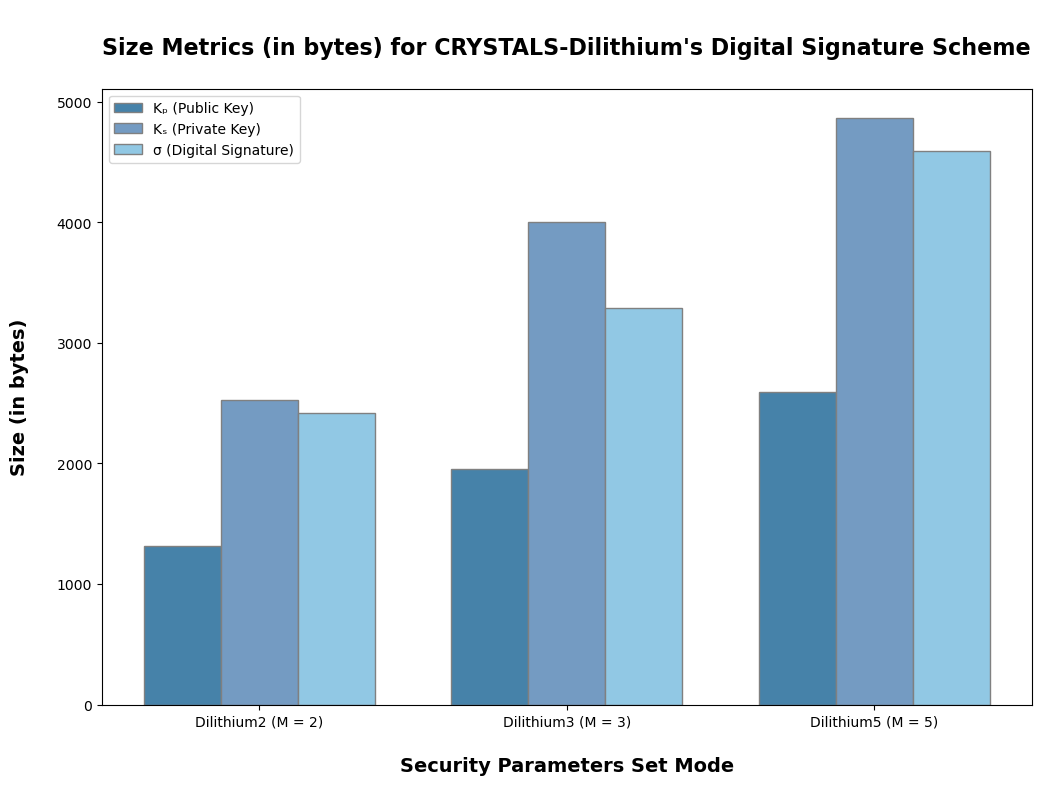

In [5]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_pub_keys_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bytes"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_priv_key_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bytes"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
num_dig_sign_bytes = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bytes"],
                       crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bytes"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.bar( bar_1, num_pub_keys_bytes,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bytes,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bytes,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.title( "\nSize Metrics (in bytes) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bytes.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bytes)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium3 (M = 3)", "Dilithium5 (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bytes.
py_plot.show()

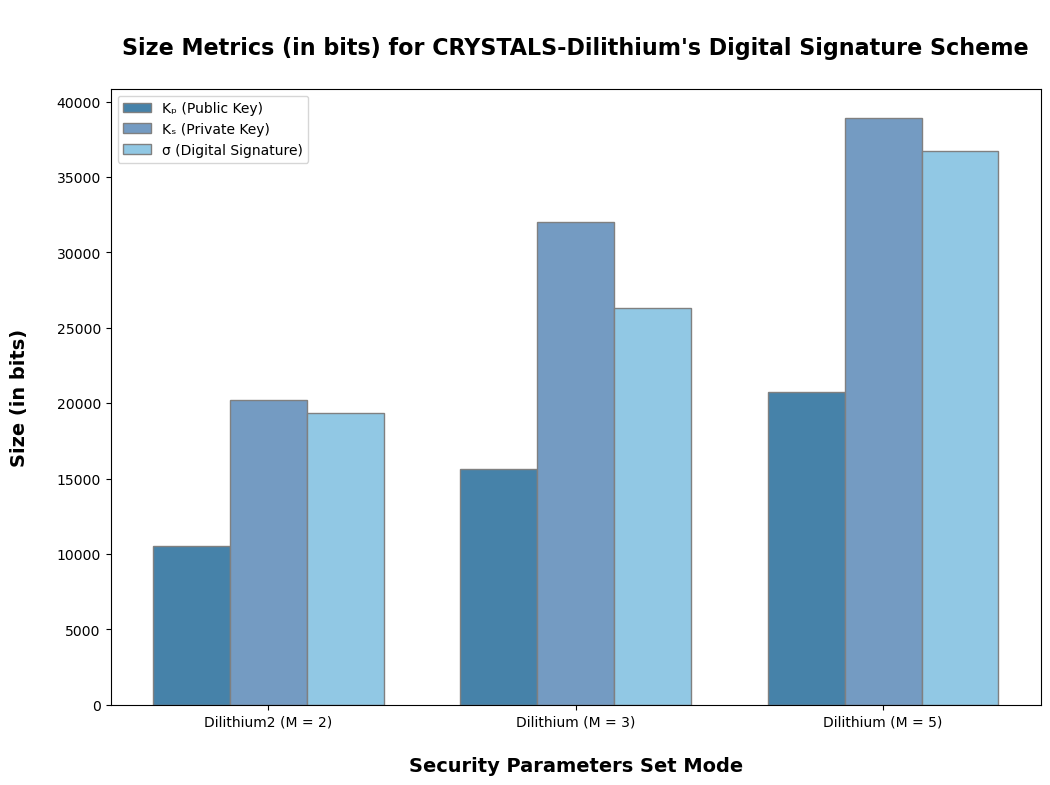

In [6]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Creation of a Python's nested dictionary for all
# the size metrics of the CRYSTALS-Dilithium's
# Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy/update the values, in bytes and bits, from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_size_metrics = \
    {  "Dilithium2": {"num_pub_key_bytes": 1312,
                      "num_pub_key_bits": 10496,
                      "num_priv_key_bytes": 2528,
                      "num_priv_key_bits": 20224,
                      "num_dig_sign_bytes": 2420,
                      "num_dig_sign_bits": 19360},
       "Dilithium3": {"num_pub_key_bytes": 1952,
                      "num_pub_key_bits": 15616,
                      "num_priv_key_bytes": 4000,
                      "num_priv_key_bits": 32000,
                      "num_dig_sign_bytes": 3293,
                      "num_dig_sign_bits": 26344},
       "Dilithium5": {"num_pub_key_bytes": 2592,
                      "num_pub_key_bits": 20736,
                      "num_priv_key_bytes": 4864,
                      "num_priv_key_bits": 38912,
                      "num_dig_sign_bytes": 4595,
                      "num_dig_sign_bits": 36760} }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )

# Setting of the individual data for the size of
# the asymmetric public keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_pub_keys_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_pub_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_pub_key_bits"] ]

# Setting of the individual data for the size of
# the asymmetric private keys for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_priv_key_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_priv_key_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_priv_key_bits"] ]

# Setting of the individual data for the size of
# the digital signatures for each Security Parameter Set used by
# the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
num_dig_sign_bits = [ crystals_dilithium_size_metrics["Dilithium2"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium3"]["num_dig_sign_bits"],
                      crystals_dilithium_size_metrics["Dilithium5"]["num_dig_sign_bits"] ]
 
# Setting of the positions of the several bars on the X-axis.
bar_1 = num_py.arange(3)
bar_2 = [ ( x + bar_width ) for x in bar_1 ]
bar_3 = [ ( x + bar_width ) for x in bar_2 ]
 
# Construction of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.bar( bar_1, num_pub_keys_bits,
             color = "#4682A9", edgecolor = "grey",
             width = bar_width, label = "Kₚ (Public Key)" )
py_plot.bar( bar_2, num_priv_key_bits,
             color = "#749BC2", edgecolor = "grey",
             width = bar_width, label = "Kₛ (Private Key)" )
py_plot.bar( bar_3, num_dig_sign_bits,
             color = "#91C8E4", edgecolor = "grey",
             width = bar_width, label = "σ (Digital Signature)" )

# Addition of the title of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.title( "\nSize Metrics (in bits) for CRYSTALS-Dilithium's Digital Signature Scheme\n",
               fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set used by
# the CRYSTALS-Kyber's Cryptosystem, in terms of bits.
py_plot.xlabel( "\nSecurity Parameters Set Mode", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Size (in bits)\n", fontweight = "bold", fontsize = 14 )

# Adding of the X-Ticks to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.xticks( [ param_idx + bar_width for param_idx in range(3) ],
                [ "Dilithium2 (M = 2)", "Dilithium (M = 3)", "Dilithium (M = 5)" ] )

# Addition of the legend/caption to the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.legend()

# Showing of the bar plots for each Security Parameter Set
# used by the CRYSTALS-Dilithium's Digital Signature Scheme, in terms of bits.
py_plot.show()

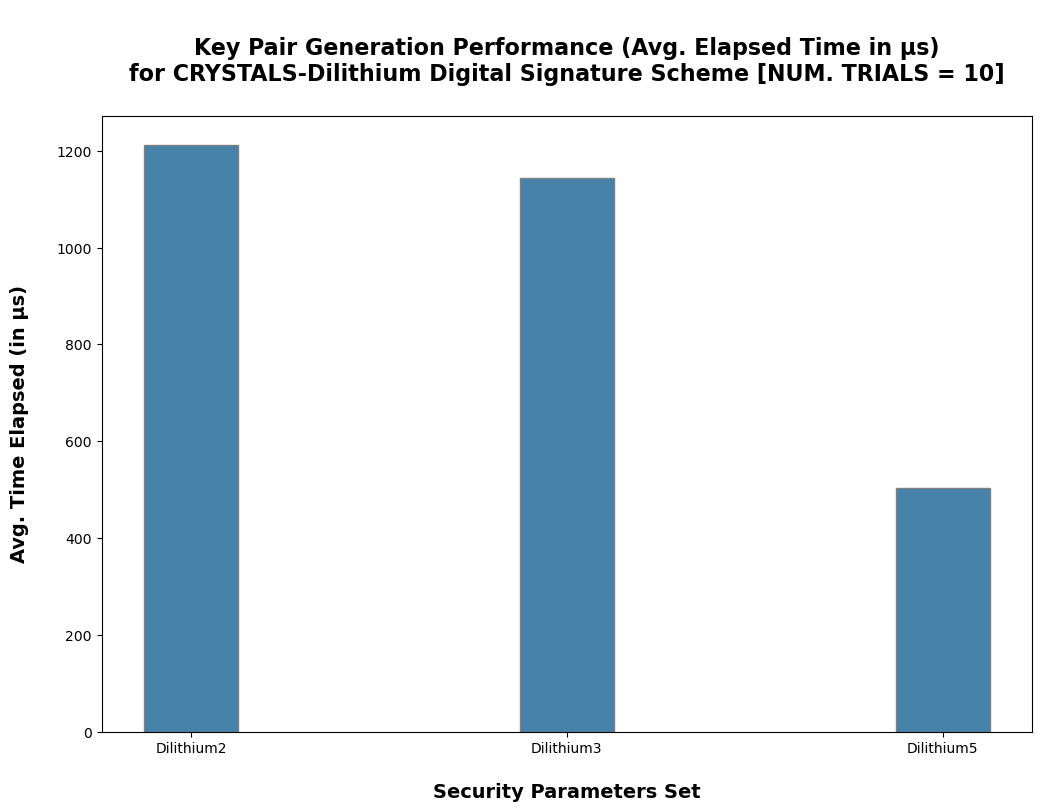

In [7]:
# Import of the NumPy (Numerical Python) library.
import numpy as num_py

# Import of the PyPlot (Python Plotting) module
# from the MatPlotLib library.
import matplotlib.pyplot as py_plot

# Import of the Warnings built-in Python library.
import warnings


# Call of instruction to ignore all warnings launched
# during the execution of this Jupyter Notebook cell.
warnings.filterwarnings("ignore")


# Definition of the number of trials
# used to estimate the average times for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
NUM_TRIALS = 10


# Creation of a Python's nested dictionary for all
# the key pair generation performance metrics of
# the CRYSTALS-Dilithium's Digital Signature Scheme.
#
# NOTE (IMPORTANT):
# - Copy the values, in microseconds (μs), from the above
#   Jupyter Notebool cell executed with a Java Kernel;
crystals_dilithium_key_pair_generation_performance_metrics = \
    {  "Dilithium2": 1211.917,
       "Dilithium3": 1142.841,
       "Dilithium5": 502.913 }


# Setting of the width of each bar in the plots.
bar_width = 0.25

# Creation of a figure made of sub-plots generated
# by the PyPlot (Python Plotting) module
# from the MatPlotLib library.
figure = py_plot.subplots( figsize = (12, 8) )
 
# Construction of the bar plots for
# each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.bar( crystals_dilithium_key_pair_generation_performance_metrics.keys(),
             crystals_dilithium_key_pair_generation_performance_metrics.values(),
             color = "#4682A9", edgecolor = "grey",
             width = bar_width )

# Definition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
plot_title = "\nKey Pair Generation Performance (Avg. Elapsed Time in μs)\n"\
             "for CRYSTALS-Dilithium Digital Signature Scheme [NUM. TRIALS = {num_trials}]\n"\
             .format(num_trials = NUM_TRIALS)

# Addition of the title of the bar plots
# for each Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.title( plot_title, fontweight = "bold", fontsize = 16 )

# Addition of the labels for the X-axis and Y-axis of
# the bar plots for each Security Parameter Set Mode
# used by the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.xlabel( "\nSecurity Parameters Set", fontweight = "bold", fontsize = 14 )
py_plot.ylabel( "Avg. Time Elapsed (in μs)\n", fontweight = "bold", fontsize = 14 )

# Showing of the bar plots for each
# Security Parameter Set Mode used by
# the CRYSTALS-Dilithium's Digital Signature Scheme,
# in terms of microseconds (μs).
py_plot.show()

***

### Demonstration for the EUF-CMA Signing/Verifying<br>using the CRYSTALS-Dilithium Digital Signature Scheme

In [8]:
// Import of all the required modules and sub-libraries.

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, for use of basic cryptography.
import org.bouncycastle.crypto.AsymmetricCipherKeyPair;
import org.bouncycastle.crypto.params.AsymmetricKeyParameter;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the provider of
// (Classical) Post-Quantum Cryptography.
import org.bouncycastle.pqc.jcajce.provider.BouncyCastlePQCProvider;

// Import of all the required modules and sub-libraries of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium
// Public-Key Digital Signature Scheme's Parameter Specifications.
import org.bouncycastle.pqc.jcajce.spec.DilithiumParameterSpec;

// Import of all the required modules and sub-libraries required of
// the Bouncy Castle library, regarding the CRYSTALS-Dilithium Digital Signature Scheme.
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyGenerationParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumKeyPairGenerator;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPrivateKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumPublicKeyParameters;
import org.bouncycastle.pqc.crypto.crystals.dilithium.DilithiumSigner;

// Import of all the required modules and sub-libraries
// required of the built-in security module of Java.
import java.security.PrivateKey;
import java.security.PublicKey;
import java.security.SecureRandom;
import java.security.Security;

// Import of all the required modules and sub-libraries
// required of the built-in Non-blocking Input/Output module of Java.
import java.nio.ByteBuffer;
import java.nio.ByteOrder;


// Definition of all the required constant values.

// Definition of the size of a byte
// with the respective number of bits.
final short BYTE_SIZE_IN_BITS = 8;

// Definition of the number of possible
// binary digits (bits) for a hexadecimal character.
final short NUM_POSSIBLE_BITS_IN_HEXADECIMAL_CHAR = 16;



// Definition of all the required classes.

// Definition of class of Public-Key Digital Signature Scheme
// CRYSTALS-Dilithium (CRYptographic SuiTe for Algebraic LatticeS - Dilithium),
// which is a (Classical) Post-Quantum Digital Signature Scheme
// (supposed to be secure against classical and quantum attacks),
// and based on computational hardness of mathematical problems
// derived from the well-known lattices algebraic structures,
// most specifically, in the LWE (Learning With Errors) Problem.
class CrystalsDilithiumDigitalSignatureScheme {

    // Definition of all the required constant values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Setting of the string array with the names of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public final String[]
        security_parameters_modes_names = {
    
        // 1) Security Parameters Mode 2 Set with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        "Dilithium2",
        
        // 2) Security Parameters Mode Set 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        "Dilithium3",
        
        // 3) Security Parameters Mode Set 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        "Dilithium5"
    
    };
    
    // Setting of the string array with the names and
    // definitions of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final String[] 
        security_parameters_modes_names_and_descriptions = {
    
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        //    NOTE: The Dilithium2 has a NIST (Classical) Post-Quantum
        //          Security Level of 2 (≈ collision search on SHA-256).
        "=> Dilithium2: Security Parameters Set with a factor of (k,l) = (4,4)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 85 bits.\n\n   " +
        "               NOTE: The Dilithium2 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 2 (≈ collision search on SHA-256).",
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        //    NOTE: The Dilithium3 has a NIST (Classical) Post-Quantum
        //          Security Level of 3 (≈ exhaustive search on AES-192).
        "=> Dilithium3: Security Parameters Set with a factor of (k,l) = (6,5)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 96 bits.\n\n   " +
        "               NOTE: The Dilithium3 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 3 (≈ exhaustive search on AES-192).",
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    for the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        //    NOTE: The Dilithium5 has a NIST (Classical) Post-Quantum
        //          Security Level of 5 (≈ exhaustive search on AES-256).
        "=> Dilithium5: Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)\n   " +
        "               for the size of the lattice algebraic structure, which provides\n   " +
        "               a (post-quantum) security strength of 128 bits.\n\n   " +
        "               NOTE: The Dilithium5 Digital Signature Scheme has a NIST (Classical)\n   " +
        "                     Post-Quantum Security Level of 5 (≈ exhaustive search on AES-256)."
        
    };
    
    
    // Setting of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public final DilithiumParameterSpec[] 
        security_parameters_modes_specifications = {
        
        // 1) Security Parameters Set Mode 2 with a factor of (k,l) = (4,4)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 85 bits.
        DilithiumParameterSpec.dilithium2,
        
        // 2) Security Parameters Set Mode 3 with a factor of (k,l) = (6,5)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 96 bits.
        DilithiumParameterSpec.dilithium3,
        
        // 3) Security Parameters Set Mode 5 with a factor of (k,l) = (8,7)
        //    the size of the lattice algebraic structure, which provides
        //    a (post-quantum) security strength of 128 bits.
        DilithiumParameterSpec.dilithium5
        
    };
    
    
    // Definition of all the required variable values,
    // regarding the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    
    // Definition of the parameter mode choice index
    // for the generation of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private short parameter_mode_choice_index;
    
    // Definition of the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumParameters parameters;
    
    // Definition of the Java's Secure Random to
    // act as Pseudo-Random Generator (PRG) for
    // the generation of the instance of the Key Pair to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private SecureRandom secure_pseudo_random_generator_key_pair_generation;
    
    // Definition of the key generation parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private DilithiumKeyGenerationParameters key_generation_parameters;

    // Definition of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    private AsymmetricCipherKeyPair asymmetric_key_pair;
    
    // Definition of the instance of the Signer entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_signer;
    
    // Definition of the instance of the Verifier entity to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    private DilithiumSigner digital_signature_package_sigma_verifier;
    
    // Definition of the payload of the public key
    // shared by the other party and to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of a public key of the digital signature scheme.
    private DilithiumPublicKeyParameters public_key_shared_other_party_payload;
    
    
    // Constructor of the class of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, and the initialization of
    // the initial required parameters.
    //    Parameters:
    //    @param parameter_mode_choice_index: The parameter choice index for
    //                                        the generation of the pair of
    //                                        asymmetric keys to be used.
    public CrystalsDilithiumDigitalSignatureScheme( short parameter_mode_choice_index ) {
        
        // Addition of the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java.
        this.add_classical_post_quantum_cryptography_bouncy_castle_provider();
        
        // Initialization of the parameter choice index for
        // the generation of the pair of asymmetric keys to be used.
        this.parameter_mode_choice_index = parameter_mode_choice_index;
        
        // Initialization of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.parameters = null;
        
        // Initialization of the Java's Secure Random
        // to act as Pseudo-Random Generator (PRG) for
        // the generation of the instance of the Key Pair
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        this.secure_pseudo_random_generator_key_pair_generation = 
            new SecureRandom();
        
        // Initialization of the key generation parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.key_generation_parameters = null;
        
        // Initialization of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature, as a null object.
        this.asymmetric_key_pair = null;
        
        // Initialization of the instance of the Signer entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.        this.digital_signature_package_sigma_signer = null;

        // Initialization of the instance of the Verifier entity
        // to be used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a null object.
        this.digital_signature_package_sigma_verifier = null;

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme, as a null object.
        this.public_key_shared_other_party_payload = null;

    }
    
    
    // Methods of the class of the Public-Key
    // (Asymmetric) Digital Signature Scheme CRYSTALS-Dilithium
    // (CRYptographic SuiTe for Algebraic LatticeS - Dilithium).
    
    // Method to add the (Classical) Post-Quantum Cryptography
    // provider of the Bouncy Castle library for Java,
    // to the built-in security module of Java.
    public void add_classical_post_quantum_cryptography_bouncy_castle_provider() {
        
        // If the built-in security module of Java does not find or
        // not have the (Classical) Post-Quantum Cryptography
        // provider of the Bouncy Castle library for Java,
        // denoted as BCPQC (Bouncy Castle - Post-Quantum Cryptography).
        if( Security.getProvider( "BCPQC" ) == null ) {
         
            // Addition of the (Classical) Post-Quantum Cryptography
            // provider of the Bouncy Castle library for Java,
            // to the built-in security module of Java.
            Security.addProvider( new BouncyCastlePQCProvider() );
        
        }
        
    }
    
    
    // Method to obtain the parameter mode choice index defined for
    // the generation of the pair of asymmetric keys to be used.
    public short get_parameter_mode_choice_index() {
        
        // Return of the parameter mode choice index defined for
        // the generation of the pair of asymmetric keys to be used.
        return this.parameter_mode_choice_index;
        
    }
    
    
    // Method to obtain the string with the name of
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
    // Security Parameters Modes defined for the key pair generation
    // (consisting on private and public keys), as well as
    // the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_name() {
        
        // Return of the string with the name of
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme's
        // Security Parameters Modes defined for the key pair generation
        // (consisting on private and public keys), as well as
        // the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to obtain the string with the name and
    // description of the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes defined for
    // the key pair generation (consisting on private and public keys),
    // as well as the respective Signing and Verifying Mechanisms.
    public String get_security_parameters_mode_name_and_description() {
        
        // Return of the string with the name and
        // description of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Modes defined for
        // the key pair generation (consisting on private and public keys),
        // as well as the respective Signing and Verifying Mechanisms.
        return security_parameters_modes_names_and_descriptions[ this.parameter_mode_choice_index ];
        
    }
       
        
    // Method to obtain the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme's Security Parameters Modes Specifications.
    public DilithiumParameterSpec get_security_parameters_specifications() {
        
        // Return of the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme's Security Parameters Specifications.
        return security_parameters_modes_specifications[ this.parameter_mode_choice_index ];
        
    }
    
    
    // Method to initialize the general parameters
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public void initialize_parameters() {
        
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium2' Security Parameter Mode Set.
        if( this.parameter_mode_choice_index == 0 ) {
            
            // Setting the 'Dilithium2' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium2;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium3' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 1 ) {
            
            // Setting the 'Dilithium3' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium3;
            
        }
        // If the parameter choice index for
        // the general parameters to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, corresponds to
        // the 'Dilithium5' Security Parameter Mode Set.
        else if( this.parameter_mode_choice_index == 2 ) {
            
            // Setting the 'Dilithium5' Security Parameter Set as
            // the parameter choice for the general parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.parameters = DilithiumParameters.dilithium5;
            
        }
        
    }
    
    
    // Method to obtain the general parameters to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public DilithiumParameters get_parameters() {
        
        // Return of the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.parameters;
        
    }
    
    
    // Method to obtain the Java's Secure Random to act as
    // Pseudo-Random Generator (PRG) for the key pair generation to
    // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public SecureRandom get_secure_pseudo_random_generator_key_pair_generation() {
            
        // Return of the Java's Secure Random to act as
        // Pseudo-Random Generator (PRG) for the key pair generation to
        // be used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        return this.secure_pseudo_random_generator_key_pair_generation;
    
    }
    
    
    // Method to initialize the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public void initialize_key_generation_parameters() {
        
        // If the the general parameters to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, are not null.
        if( this.get_parameters() != null ) {
        
            // Initialization of the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            this.key_generation_parameters = 
                new DilithiumKeyGenerationParameters
                    ( this.secure_pseudo_random_generator_key_pair_generation,
                      this.parameters );
        
        }
        
    }
    
    
    // Method to obtain the key generation parameters to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public DilithiumKeyGenerationParameters get_key_generation_parameters() {
        
        // Return of the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme.
        return this.key_generation_parameters;
        
    }
    
    
    // Method to initialize the generation of
    // the pair of asymmetric keys to be used
    // by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme. 
    public void initialize_asymmetric_key_pair_generation() {
       
        // Creation of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        DilithiumKeyPairGenerator crystals_dilithium_key_pair_generator = 
            new DilithiumKeyPairGenerator();

        // Initialization of the generator of the pair of
        // asymmetric keys to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, using
        // the Security Parameters set defined before.
        crystals_dilithium_key_pair_generator
            .init( this.key_generation_parameters );

        // Generation of the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme. 
        this.asymmetric_key_pair = 
            crystals_dilithium_key_pair_generator.generateKeyPair();
            
    }
    
    
    // Method to obtain the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricCipherKeyPair get_asymmetric_key_pair() {
        
        // Return of the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme.
        return this.asymmetric_key_pair;
        
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_public_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the public key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPublic();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the public key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPublicKeyParameters get_public_key_parameters() {
        
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {
            
            // Return of the public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPublicKeyParameters ) this.get_public_key() );
            
        }
        // If the public key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid public key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the public key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_public_key_parameters().getRho();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the packed polynomial
    // target solution t₁ vector/array encoded (and compressed)
    // in bytes (rounded from the initial target solution
    // vector/array for the mathematical equation A x s + e = t₁),
    // representing a lattice-based problem in the form of
    // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_public_key_parameters() {
    
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key_parameters() != null ) {
        
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_public_key_parameters().getT1();
        
        }
        // If the public key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
    
        }
    
    }
    
    
    // Method to obtain the public key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_public_key_encoded_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_public_key() != null ) {

            // Retrieval of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] public_key_encoded_bytes = 
                 ( ( DilithiumPublicKeyParameters ) this.get_public_key() ).getEncoded();

            // Return of the public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return public_key_encoded_bytes;
        
        }
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid public key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bytes() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_public_key_encoded_bytes().length;
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
 
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the public key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_public_key_size_bits() {
        
        // If the public key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_public_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_public_key_size_bytes() *
                     BYTE_SIZE_IN_BITS );
        
        }
        // If the public key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the public key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the public key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme,
    // using the associated Security Parameters.
    public DilithiumPublicKeyParameters get_public_key_payload_from_parameters() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the public key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build public key payload.

            // Retrieval of the the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the public key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_public_key_parameters();
                
            // Retrieval of the packed polynomial
            // target solution t₁ vector/array encoded (and compressed)
            // in bytes (rounded from the initial target solution t₁
            // vector/array for the mathematical equation A x s + e = t₁),
            // representing a lattice-based problem in the form of
            // a LWE (Learning With Errors), of the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_public_key_parameters();
            

            // Return of the payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     pseudo_random_seed_rho,
                                                     target_solution_t_1 );
        
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
    // as a proper object of public key of the digital signature scheme,
    // using the associated encoding in an array of bytes.
    public DilithiumPublicKeyParameters get_public_key_payload_from_encoding() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
            
            // Retrieval of the cipher parameters from
            // the key generation parameters to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Return of the payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme.
            return new DilithiumPublicKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                     this.get_public_key_encoded_bytes() );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the public key
            // from the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme,
            // as a proper object of public key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the payload of the public key
    // from the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // public key of the digital signature scheme.
    public DilithiumPublicKeyParameters get_public_key_payload() {
    
        // Return of the payload of the public key
        // from the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme, as a proper object of
        // public key of the digital signature scheme.
        return this.get_public_key_payload_from_parameters();
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme.
    public AsymmetricKeyParameter get_private_key() {
        
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_asymmetric_key_pair() != null ) {
            
            // Return of the private key from
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_asymmetric_key_pair().getPrivate();
            
        }
        // If the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key
    // parameters of the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public DilithiumPrivateKeyParameters get_private_key_parameters() {
        
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
            
            // Return of the private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return ( ( DilithiumPrivateKeyParameters ) this.get_private_key() );
            
        }
        // If the private key from the pair of
        // asymmetric keys to be used by
        // the CRYSTALS-Dilithium Public-Key
        // Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of invalid private key parameters of
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the (pseudo) random seed ρ (rho)
    // in bytes, from which will be expanded the matrix A,
    // encoding the lattice algebraic structure, as well
    // as other cryptographic parameters, representing
    // a lattice-based problem in the form of a LWE
    // (Learning With Errors), retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_seed_rho_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random seed ρ (rho) in bytes,
            // from which will be expanded the matrix A,
            // encoding the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getRho();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // seed ρ (rho) in bytes, from which will
            // be expanded the matrix A, encoding
            // the lattice algebraic structure,
            // as well as other cryptographic parameters,
            // representing a lattice-based problem in
            // the form of a LWE (Learning With Errors),
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the (pseudo) random
    // cryptographic key K, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_pseudo_random_key_k_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme.
            return this.get_private_key_parameters().getK();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the final polynomial target result
    // solution tr vector/array, retrieved from the private key
    // parameters of the pair of asymmetric keys to be used by
    // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
    public byte[] get_target_result_solution_tr_from_private_key_parameters() {
    
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getTr();
        
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid final polynomial target result solution tr
            // vector/array, retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme, as a null object.
            return null;
            
        }
    
    }
    
    
    // Method to obtain the random secret s₁
    // (i.e. the 1st secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the random secret s₂
    // (i.e. the 2nd secret vector in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_random_secret_s_2_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getS2();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₀
    // (i.e. the 1st target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_0_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT0();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the packed polynomial target solution t₁
    // (i.e. the 2nd target vector/array in the lattice
    // algebraic structure), encoded in bytes, with the strong
    // security under CMA (Chosen Message Attack) property,
    // retrieved from the private key parameters of the pair of
    // asymmetric keys to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme.
    public byte[] get_target_solution_t_1_from_private_key_parameters() {
        
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_private_key_parameters() != null ) {
            
            // Return of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            return this.get_private_key_parameters().getT1();
            
        }
        // If the private key parameters of
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
           
            // Return of an invalid packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the private key from
    // the pair of asymmetric keys to be
    // used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // being encoded as an array of bytes.
    public byte[] get_private_key_encoded_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is not defined by a null object.
        if( this.get_private_key() != null ) {
        
            // Retrieval of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            byte[] private_key_encoded_bytes = 
                 ( ( DilithiumPrivateKeyParameters ) this.get_private_key() ).getEncoded();

            // Return of the private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return private_key_encoded_bytes;
            
        }
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // is defined by a null object.
        else {
        
            // Return of an invalid private key from
            // the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // being encoded as an array of bytes.
            return null;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bytes, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bytes() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {

            // Return of the size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return this.get_private_key_encoded_bytes().length;

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bytes, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the size,
    // in terms of bits, of the private key
    // from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme,
    // as being encoded as an array of bytes.
    public int get_private_key_size_bits() {
        
        // If the private key from
        // the pair of asymmetric keys to be
        // used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is not defined by a null object.
        if( this.get_private_key_encoded_bytes() != null ) {
        
            // Return of the size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return ( this.get_private_key_size_bytes() * 
                     BYTE_SIZE_IN_BITS );

        }
        // If the private key from
        // the pair of asymmetric keys
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // being encoded as an array of bytes,
        // is defined by a null object.
        else {
    
            // Return of an invalid size,
            // in terms of bits, of the private key
            // from the pair of asymmetric keys
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme,
            // as being encoded as an array of bytes.
            return 0;
            
        }
        
    }
    
    
    // Method to obtain the payload of
    // the private key from the pair of asymmetric keys
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // private key of the digital signature scheme.
    public DilithiumPrivateKeyParameters get_private_key_payload() {
        
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are not defined by a null object.
        if( this.get_key_generation_parameters() != null ) {
        
            // Retrieval of the cipher parameters
            // from the key generation parameters
            // to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
                this.get_key_generation_parameters().getParameters();


            // Call of the required methods to
            // obtain all the values, encoded in bytes,
            // retrieved from the private key parameters of
            // the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, which will
            // be used to build private key payload.

            // Retrieval of the (pseudo) random seed ρ (rho)
            // in bytes, from which will be expanded the matrix A,
            // encoding the lattice algebraic structure, as well
            // as other cryptographic parameters, representing
            // a lattice-based problem in the form of a LWE
            // (Learning With Errors), retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_seed_rho = 
                this.get_pseudo_random_seed_rho_from_private_key_parameters();
            
            // Retrieval of the (pseudo) random
            // cryptographic key K, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] pseudo_random_key_k = 
                this.get_pseudo_random_key_k_from_private_key_parameters();
            
            // Retrieval of the final polynomial target
            // result solution tr vector/array, retrieved from the private key
            // parameters of the pair of asymmetric keys to be used by
            // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
            byte[] target_result_solution_tr = 
                this.get_target_result_solution_tr_from_private_key_parameters();
            
            // Retrieval of the random secret s₁
            // (i.e. the 1st secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_1 = 
                this.get_random_secret_s_1_from_private_key_parameters();
    
            // Retrieval of the random secret s₂
            // (i.e. the 2nd secret vector in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] random_secret_s_2 = 
                this.get_random_secret_s_2_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₀
            // (i.e. the 1st target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_0 = 
                this.get_target_solution_t_0_from_private_key_parameters();
    
            // Retrieval of the packed polynomial target solution t₁
            // (i.e. the 2nd target vector/array in the lattice
            // algebraic structure), encoded in bytes, with the strong
            // security under CMA (Chosen Message Attack) property,
            // retrieved from the private key parameters of the pair of
            // asymmetric keys to be used by the CRYSTALS-Dilithium
            // Public-Key Digital Signature Scheme.
            byte[] target_solution_t_1 = 
                this.get_target_solution_t_1_from_private_key_parameters();
            
            
            // Return of the payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme.
            return new DilithiumPrivateKeyParameters( crystals_dilithium_digital_signature_scheme_parameters,
                                                      pseudo_random_seed_rho,
                                                      pseudo_random_key_k,
                                                      target_result_solution_tr,
                                                      random_secret_s_1,
                                                      random_secret_s_2,
                                                      target_solution_t_0,
                                                      target_solution_t_1 );
            
        }
        // If the key generation parameters
        // to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme,
        // are defined by a null object.
        else {
            
            // Return of an invalid payload of the private key
            // from the pair of asymmetric keys to be
            // used by the CRYSTALS-Dilithium Public-Key
            // Digital Signature Scheme, as a proper object of
            // private key of the digital signature scheme,
            // as a null object.
            return null;
            
        }
        
    }
    
    
    // Method to receive and set the payload of
    // the public key shared by the other party and
    // to be used by the CRYSTALS-Dilithium Public-Key
    // Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public void receive_and_set_public_key_shared_other_party_payload
        ( byte[] public_key_shared_other_party_encoding_bytes ) {
        
        // Retrieval of the cipher parameters from
        // the key generation parameters to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        DilithiumParameters crystals_dilithium_digital_signature_scheme_parameters = 
            this.get_key_generation_parameters().getParameters();

        // Initialization of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme. 
        this.public_key_shared_other_party_payload = 
            new DilithiumPublicKeyParameters
                ( crystals_dilithium_digital_signature_scheme_parameters,
                  public_key_shared_other_party_encoding_bytes );
        
    }
    
    
    // Method to obtain the payload of the public key shared by
    // the other party and to be used by the CRYSTALS-Dilithium
    // Public-Key Digital Signature Scheme, as a proper object of
    // a public key of the digital signature scheme. 
    public DilithiumPublicKeyParameters get_public_key_shared_other_party_payload() {
        
        // Return of the payload of the public key shared by
        // the other party and to be used by the CRYSTALS-Dilithium
        // Public-Key Digital Signature Scheme, as a proper object of
        // a public key of the digital signature scheme.
        return this.public_key_shared_other_party_payload;
        
    }
    
    
    // Method to initialize the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_signer() {
       
        // Initialization of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer = new DilithiumSigner();
        
        // Setup of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_signer
            .init( true, this.get_private_key_payload() );
        
    }
        
    
    // Method to obtain the instance of the Signer entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_signer() {
       
        // Return of the instance of the Signer entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_signer;
        
    }
    
    
    // Method to initialize the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public void initialize_digital_signature_package_sigma_verifier() {
       
        // Initialization of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        this.digital_signature_package_sigma_verifier = new DilithiumSigner();
        
        // Setup of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme.
        this.digital_signature_package_sigma_verifier
            .init( false, this.get_public_key_shared_other_party_payload() );
        
    }
        
    
    // Method to obtain the instance of the Verifier entity to be
    // used by the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
    public DilithiumSigner get_digital_signature_package_sigma_verifier() {
       
        // Return of the instance of the Verifier entity to be used by
        // the CRYSTALS-Dilithium Public-Key Digital Signature Scheme. 
        return this.digital_signature_package_sigma_verifier;
        
    }

}

null